In [ ]:
import os
import json
import pandas as pd
import sympy as sp
import logging
import re
from sympy import Eq, simplify
from sympy.parsing.sympy_parser import parse_expr
from functools import lru_cache
from typing import Tuple
from sympy.parsing.latex import parse_latex

# ====== EquationPreprocessor, EquationParser, and LinearEquation (same as before) ======



class EquationParser:
    @lru_cache(maxsize=128)
    def parse(self, eq_str: str) -> Tuple[Eq, Eq]:
        try:
            lhs, rhs = map(str.strip, eq_str.split('=', 1))
        except ValueError:
            raise ValueError("Equation must contain exactly one '='")

        lhs_expr = parse_expr(lhs, evaluate=False)
        rhs_expr = parse_expr(rhs, evaluate=False)

        return (
            Eq(simplify(lhs_expr), simplify(rhs_expr)),  # simplified
            Eq(lhs_expr, rhs_expr, evaluate=False)       # original
        )


class LinearEquation:
    def __init__(self):
        self.logger = logging.getLogger(__name__)
        self._variables = sp.symbols('s r b c w n y m d v o p q x a f t h j k l i e g z u X T U V W A B C D E F G H I J K L M N O P Q R S T U V W X Y Z')

    def is_linear(self, expr: sp.Expr) -> bool:
        try:
            poly = expr.as_poly()
            if poly is None or poly.degree() != 1:
                return False

            if any(term.is_Pow and term.exp.is_Number and term.exp < 0 for term in expr.atoms(sp.Pow)):
                return False

            if any(term.is_Pow and term.exp == sp.Rational(1, 2) for term in expr.atoms(sp.Pow)):
                return False

            return True
        except Exception as e:
            self.logger.error(f"Linear check failed: {str(e)}")
            return False


# ====== Main loop to process all JSON files in a directory ======

def process_equations_from_directory(directory_path: str):
    parser = EquationParser()
    linear_checker = LinearEquation()

    all_linear_equations = []
    i = 0
    for filename in os.listdir(directory_path):
        if filename.endswith(".json"):
            df_data = pd.read_json(directory_path + "\\" + filename)


            parser = EquationParser()
            linear_checker = LinearEquation()


            for index, row in df_data[df_data['category'] == 2].iterrows():
                
                try:
                    eq_str = row['t0']

                    eq1_str = parse_latex(eq_str)
                    eq1_str = f"{eq1_str.lhs}={eq1_str.rhs}"


                    eq1_eval, eq1_raw = parser.parse(eq1_str)
                

                
                    canonical_expr = eq1_eval.lhs - eq1_eval.rhs

                    if linear_checker.is_linear(canonical_expr):
                        all_linear_equations.append({
                            "source_file": "first_file.json",
                        
                            "original": eq_str,
                            "s1": row['t1'],
                            "assumption": row['assumptions'],
                            "preprocessed": eq1_str,
                            "canonical": str(canonical_expr)
                        })

                except Exception as e:
                    logging.error(f"Error processing equation: {eq_str} ")
            continue

    df = pd.DataFrame(all_linear_equations)
    print(f"\nTotal number of linear equations across all files: {len(df)}")

    # Save results
    df.to_csv(f"all_linear_equations.csv", index=False)
    i+=1
    return df


# ====== Run ======
if __name__ == "__main__":
    folder = r"C:\Users\imran.chamieh\Desktop\data\json"
    df = process_equations_from_directory(folder)


ERROR:root:Error processing equation: \left( \left|x + 6\right| -3 = 2\right) \vee \left( \left|x + 6\right| -3 = -2\right) 


ERROR:root:Error processing equation: \left|4\,x + 5\right| \le 2 
ERROR:root:Error processing equation: \left( \left|x + 6\right| -3 = 2\right) \vee \left( \left|x + 6\right| -3 = -2\right) 
ERROR:root:Error processing equation: \left|\left|x + 6\right| -3\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equation: \left|2\,x-2\right|  + \left|7\,x-1\right|  = 2 
ERROR:root:Error processing equat

KeyError: 'category'

In [10]:
import json
import pandas as pd
import sympy as sp
import logging
import re
from sympy import Eq, simplify
from sympy.parsing.sympy_parser import parse_expr
from functools import lru_cache
from typing import Tuple
from sympy.parsing.latex import parse_latex


# ====== Your existing classes (condensed here for completeness) ======


class EquationParser:
    @lru_cache(maxsize=128)
    def parse(self, eq_str: str) -> Tuple[Eq, Eq]:
        try:
            lhs, rhs = map(str.strip, eq_str.split('=', 1))
        except ValueError:
            raise ValueError("Equation must contain exactly one '='")

        lhs_expr = parse_expr(lhs, evaluate=False)
        rhs_expr = parse_expr(rhs, evaluate=False)

        return (
            Eq(simplify(lhs_expr), simplify(rhs_expr)),  # simplified
            Eq(lhs_expr, rhs_expr, evaluate=False)       # original
        )


class LinearEquation:
    def __init__(self):
        self.logger = logging.getLogger(__name__)
        self._variables = sp.symbols('s r b c w n y m d v o p q x a f t h j k l i e g z u X T U V W A B C D E F G H I J K L M N O P Q R S T U V W X Y Z')

    def is_linear(self, expr: sp.Expr) -> bool:
        try:
            poly = expr.as_poly()
            if poly is None or poly.degree() != 1:
                return False

            if any(term.is_Pow and term.exp.is_Number and term.exp < 0 for term in expr.atoms(sp.Pow)):
                return False

            if any(term.is_Pow and term.exp == sp.Rational(1, 2) for term in expr.atoms(sp.Pow)):
                return False

            return True
        except Exception as e:
            self.logger.error(f"Linear check failed: {str(e)}")
            return False

# ====== Main Script ======

def process_equations(json_file: str):
    df_data = pd.read_json(json_file)


    parser = EquationParser()
    linear_checker = LinearEquation()

    linear_equations = []

    for index, row in df_data[df_data['category'] == 2].iterrows():
        
        try:
            eq_str = row['t0']

            eq1_str = parse_latex(eq_str)
            eq1_str = f"{eq1_str.lhs}={eq1_str.rhs}"


            eq1_eval, eq1_raw = parser.parse(eq1_str)
        

        
            canonical_expr = eq1_eval.lhs - eq1_eval.rhs

            if linear_checker.is_linear(canonical_expr):
                linear_equations.append({
                    "source_file": "first_file.json",
                    "original": eq_str,
                    "preprocessed": eq1_str,
                    "canonical": str(canonical_expr)
                })

        except Exception as e:
            print(f"  Error processing '{eq_str}'")
    df = pd.DataFrame(linear_equations)
    print(f"Number of linear equations: {len(df)}")
    return df


# ====== Run the script on your file ======
if __name__ == "__main__":
    df = process_equations(r"C:\Users\imran.chamieh\Desktop\data\json\1_5000_rwo.json")
    # Optional: Save to CSV
    df.to_csv("linear_equations.csv", index=False)


  Error processing '\left( 5\,c = -3\right) \vee \left( -2\,c = 3\right)'
  Error processing '\left( h-4 = -\sqrt{1}\right) \vee \left( h-4 = +\sqrt{1}\right)'
  Error processing '\left( h-4 = -\sqrt{1}\right) \vee \left( h-4 = +\sqrt{1}\right)'
  Error processing '\left( k + \frac{7}{2} = -\sqrt{\frac{1}{4}}\right) \vee \left( k + \frac{7}{2} = +\sqrt{\frac{1}{4}}\right)'
  Error processing '\left( k + \frac{7}{2} = -\sqrt{\frac{1}{4}}\right) \vee \left( k + \frac{7}{2} = +\sqrt{\frac{1}{4}}\right)'
  Error processing '\left( k + \frac{7}{2} = -\sqrt{\frac{1}{4}}\right) \vee \left( k + \frac{7}{2} = +\sqrt{\frac{1}{4}}\right)'
  Error processing '\left( t-3 = \sqrt{9}\right) \vee \left( t-3 = \sqrt{9}\right)'
  Error processing '\left( t-3 = 0\right) \vee \left( t-3 = 0\right)'
  Error processing '\left( b-1 = -\sqrt{4}\right) \vee \left( b-1 = +\sqrt{4}\right)'
  Error processing '\left( b + 1 = -\sqrt{4}\right) \vee \left( b + 1 = +\sqrt{4}\right)'
  Error processing '\left( g = -\f

In [1]:
import pandas as pd
import sympy as sp
from sympy import symbols, Eq

In [4]:
data1 = pd.read_csv(r"C:\Users\imran.chamieh\Desktop\MethError\data\1_5000_row.csv")
data1_json = pd.read_json(r"C:\Users\imran.chamieh\Desktop\MethError\data\json\1_5000_rwo.json")
df = pd.read_csv(r"similarity_results.csv")

In [8]:
eq = Eq(sp.parse_expr("3*x+4"),sp.parse_expr( "5*y +3*a +4*x"))
variables = eq.rhs.free_symbols
print(variables)
for var in variables:
    coeff, rem = eq.lhs.as_independent(var)
    print(var,'->', coeff,'->', rem)

{y, a, x}
y -> 3*x + 4 -> 0
a -> 3*x + 4 -> 0
x -> 4 -> 3*x


In [1]:
from sympy import simplify, count_ops

def calculate_error_penalty(correct_eq, transformation_eq):
    """Calculate penalty based on algebraic difference between equations"""
    try:
        # Calculate algebraic difference
        diff = simplify(correct_eq.rhs - correct_eq.lhs - (transformation_eq.rhs - transformation_eq.lhs))
        
        if diff == 0:
            return 0  # No error
        
        # Calculate penalty based on error complexity
        return min(0.5, 0.1 * (count_ops(diff) + abs(diff.as_coefficients_dict()[1])))
    except:
        return 0.5  # Maximum penalty for unparseable differences

In [ ]:
import pandas as pd
import sympy as sp
from sympy import Eq, simplify, symbols, Add, S, count_ops
from itertools import combinations
import re
from difflib import SequenceMatcher
from functools import lru_cache
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from abc import ABC, abstractmethod
from typing import List, Tuple, Set, Dict
from sympy.parsing.latex import parse_latex
import logging

class EquationPreprocessor:
    """Handles preprocessing of equation strings"""
    _MULTIPLY_PATTERNS = [
    (re.compile(r'(\d)([a-zA-Z(])'), r'\1*\2'),
    (re.compile(r'([a-zA-Z])(\d)'), r'\1*\2',evaluate = False,evaluate = False,evaluate = False),
    (re.compile(r'([a-zA-Z])([a-zA-Z])'), r'\1*\2'),
    (re.compile(r'\)([a-zA-Z(])'), r')*\1'),
    (re.compile(r'([a-zA-Z)])(\()'), r'\1*\2'),
]

    def preprocess(self, expr_str: str) -> str:
        """Normalize and insert implicit multiplication operators"""
        expr_str = expr_str.replace('−', '-').strip()
        for pattern, replacement in self._MULTIPLY_PATTERNS:
            expr_str = pattern.sub(replacement, expr_str)
        return expr_str
        

class EquationParser:
    """Handles parsing and caching of equations"""
    def __init__(self, preprocessor: EquationPreprocessor):
        self.preprocessor = preprocessor

    @lru_cache(maxsize=128)
    def parse(self, eq_str: str) -> Tuple[Eq, Eq]:
        """Parse equation string into evaluated and raw forms"""
        try:
            lhs, rhs = map(str.strip, eq_str.split('=', 1))
        except ValueError:
            raise ValueError("Equation must contain exactly one '='")

        lhs_expr = self._parse_side(lhs)
        rhs_expr = self._parse_side(rhs)

        return (
            Eq(simplify(lhs_expr), simplify(rhs_expr)),
            Eq(lhs_expr, rhs_expr,  evaluate=False)
        )

    def _parse_side(self, side_str: str) -> sp.Expr:
        """Parse a single side of an equation"""
        return sp.parse_expr(
            self.preprocessor.preprocess(side_str),
            evaluate=False
        )

class RearrangementGenerator:
    """Generates algebraic rearrangements of equations"""
    def __init__(self, max_terms: int = 4):
        self.max_terms = max_terms
        self.logger = logging.getLogger(__name__)


    def generate(self, equation: Eq) -> Set[Eq]:
        """Generate all valid rearrangements of an equation"""
        canonical = simplify(equation.lhs - equation.rhs)
        rearrangements = set()

        rearrangements.update(self._generate_term_combinations(canonical))
        rearrangements.update(self._solve_for_variables(canonical))
        rearrangements.update(self._create_canonical_forms(canonical))
        rearrangements.update(self._convert_to_decimals(rearrangements))
        rearrangements.update(self.generate_all_transformations(equation))

        return rearrangements
    
    def _safe_update(self, target: set, source: set) -> None:
        """Safely add elements to target set"""
        try:
            target.update(source)
        except Exception as e:
            self.logger.warning(f"Failed to update set: {str(e)}")

    def _generate_term_combinations(self, expr: sp.Expr) -> Set[Eq]:
        """Generate term combinations with error handling"""
        rearrangements = set()
        try:
            terms = tuple(Add.make_args(expr))
            for k in range(min(len(terms), self.max_terms) + 1):
                for combo in combinations(terms, k):
                    try:
                        remaining = tuple(t for t in terms if t not in combo)
                        left, right = Add(*combo), -Add(*remaining)
                        rearrangements.update({
                            Eq(left, right), Eq(right, left),
                            Eq(-left, -right), Eq(-right, -left)
                        })
                    except Exception as e:
                        self.logger.debug(f"Skipping invalid combination: {str(e)}")
                        continue
        except Exception as e:
            self.logger.error(f"Term combination failed: {str(e)}")
        return rearrangements

    def _solve_for_variables(self, expr: sp.Expr) -> Set[Eq]:
        """Solve equation for variables with enhanced safety"""
        solutions = set()
        for var in expr.free_symbols:
            try:
                solution = sp.solve(expr, var, dict=True)
                if solution and isinstance(solution[0], dict):
                    sol_eq = Eq(var, solution[0][var])
                    solutions.add(sol_eq)
            except (NotImplementedError, TypeError, KeyError) as e:
                self.logger.debug(f"Skipping variable {var}: {str(e)}")
                continue
        return solutions

    def subtract_term(self, eq: Eq, term: sp.Expr) -> Eq:
        """Subtract a given term from both sides of an equation."""
        try:
            lhs_str =""
            rhs_str = ""
            term_str = str(term)
            term_str_sign = term_str[0]
            # remove the first character if it is a negative or positive sign
            if term_str_sign == '-' or term_str_sign == '+':
                term_str = term_str[1:]

            # initialize the equation string
            eq_str = Eq(eq.lhs, eq.rhs)
            eq_ter2 = Eq(eq.lhs, eq.rhs)
            
            # check if term is scalar 
            
            if not term.is_Number :
                if term in eq.lhs.as_ordered_terms() :

                    temp_eq = Eq(term, 0)
                    term_sign = temp_eq.lhs.coeff(term)

                    lhs_str = str(eq.lhs - term)
                    rhs_str = str(eq.rhs)
                    if term_sign > 0 or term_str_sign == '+':
                        
                        rhs_str = rhs_str.__add__(' - ').__add__(term_str)
                    elif term_sign < 0 or term_str_sign == '-':
                        rhs_str = rhs_str.__add__(' + ').__add__(term_str)
                    else:
                        rhs_str = rhs_str.__add__(' - ').__add__(term_str)
                
                else:

                    term_sign = eq.rhs.coeff(term)

                    rhs_str = str(eq.rhs - term)
                    lhs_str = str(eq.lhs)

                    if term_sign > 0 or term_str_sign == '+':

                        lhs_str = lhs_str.__add__(' - ').__add__(term_str)
                    elif term_sign < 0 or term_str_sign == '-':
                        lhs_str = lhs_str.__add__(' + ').__add__(term_str)
                    else:
                        lhs_str = lhs_str.__add__(' - ').__add__(term_str)

                eq_str = Eq(sp.parse_expr(lhs_str, evaluate=False), sp.parse_expr(rhs_str, evaluate=False))
                eq_ter2 = Eq(sp.parse_expr(lhs_str), sp.parse_expr(rhs_str))

            # remove term_str from the lhs_str
            # Add - term_str to the rhs_str
            #print(f"lhs_str: {lhs_str}")
            
            eq = Eq(eq.lhs - term, eq.rhs - term)
            # return both the string and the equation
            return eq, eq_str, eq_ter2
        except Exception as e:
            self.logger.debug(f"Subtraction skipped: {str(e)}")
            return eq


    def divide_equation_by_term(self, eq: Eq) -> Eq:
        """Safe division with zero-check"""
        try:
            variable = next(iter(eq.lhs.free_symbols), None)
            if variable is None:
                return eq
                
            coeff = eq.lhs.coeff(variable)
            if coeff == 0:
                raise ValueError("Zero coefficient")
                
            return Eq(eq.lhs/coeff, eq.rhs/coeff)
        except Exception as e:
            self.logger.debug(f"Division skipped: {str(e)}")
            return eq

    def transformation_sequence(self, eq: Eq, terms: List[sp.Expr], index: int) -> Set[Eq]:
        """Robust transformation sequence with error isolation"""
        transformations = set()
        try:
            if index >= len(terms):
                return transformations
                
            term = terms[index]
            eq1, eq2 = self.subtract_term(eq, term)
            transformations.add(eq1)
            transformations.add(eq2)
            
            # Add simplified version
            try:
                transformations.add(simplify(eq1))
            except Exception as e:
                self.logger.debug(f"Simplification failed: {str(e)}")

            # Attempt division
            try:
                if len(eq1.lhs.as_ordered_terms()) == 1:
                # check if the term is an integer then skip the division
                    if not eq1.lhs.as_ordered_terms()[0].is_integer:
                        eq1_div = self.divide_equation_by_term(eq1)
                        #print(f"eq1_div: {eq1_div}")
                        eq1_div_simpified = simplify(eq1_div)
                        #print(f"eq1_div_simpified: {eq1_div_simpified}")

                        transformations.add(eq1_div)   
                        transformations.add(eq1_div_simpified)
                    

                # Now subtract each of the other terms from eq1.
                for j, term in enumerate(terms):
                    if j == index:
                        continue
                    eq_sub1, eq_sub2 = self.subtract_term(eq1, term)
                    #print(f"eq_sub: {eq_sub1}")
                    #print(f"eq_sub2: {eq_sub2}")
                    #print(f"simplify eq_sub: {simplify(eq_sub)}")
                    transformations.add(eq_sub1)
                    transformations.add(eq_sub2)
                    transformations.add(simplify(eq_sub1))
                    # Check if there is only one term on the left side
                    if len(eq_sub1.lhs.as_ordered_terms()) == 1 and not eq_sub1.lhs.as_ordered_terms()[0].is_integer:
                        eq1_div = self.divide_equation_by_term(eq_sub1)
                        transformations.add(eq1_div)
                        transformations.add(simplify(eq1_div))
                        #print(f"eq1_div: {eq1_div}")

                    if len(eq_sub2.lhs.as_ordered_terms()) == 1 and not eq_sub2.lhs.as_ordered_terms()[0].is_integer:
                        eq2_div = self.divide_equation_by_term(eq_sub2)
                        transformations.add(eq2_div)
                        transformations.add(simplify(eq2_div))
                        #print(f"eq2_div: {eq2_div}")
                return transformations


            except Exception as e:
                self.logger.warning(f"Transformation sequence aborted: {str(e)}")
        except Exception as e:
            self.logger.error(f"Transformation sequence failed: {str(e)}")
            return transformations
            
        return transformations

    def generate_all_transformations(self, eq: Eq) -> Set[Eq]:
        """Fault-tolerant transformation generator"""
        transformations = set()
        try:
            terms = self.get_terms(eq)
            for i in range(len(terms)):
                try:
                    transforms = self.transformation_sequence(eq, terms, i)
                    transformations.update(transforms)
                except Exception as e:
                    self.logger.debug(f"Skipping term {i}: {str(e)}")
                    continue
        except Exception as e:
            self.logger.error(f"Transformation generation failed: {str(e)}")
            
        return transformations

    def get_terms(self, eq: Eq) -> List[sp.Expr]:
        """Safe term extraction"""
        try:
            return Add.make_args(eq.lhs) + Add.make_args(eq.rhs)
        except Exception as e:
            self.logger.error(f"Term extraction failed: {str(e)}")
            return []
    


    def _create_canonical_forms(self, expr: sp.Expr) -> Set[Eq]:
        """Create standard canonical forms"""
        return {Eq(expr, 0), Eq(0, expr), Eq(-expr, 0), Eq(0, -expr)}

    def _convert_to_decimals(self, equations: Set[Eq]) -> Set[Eq]:
        """Create decimal representations of equations with exactly two decimals."""
        decimal_equations = set()
        for eq in equations:
            try:
                lhs_val = sp.N(eq.lhs)
                rhs_val = sp.N(eq.rhs)
                # Format the evaluated expressions to two decimals
                lhs_str = f"{lhs_val:.2f}"
                rhs_str = f"{rhs_val:.2f}"
                # Convert back to a sympy expression (Float)
                new_eq = Eq(sp.sympify(lhs_str), sp.sympify(rhs_str))
                decimal_equations.add(new_eq)
            except Exception as e:
                # If conversion fails, simply skip this equation.
                continue
        return decimal_equations




In [13]:

class SimilarityStrategy(ABC):
    """Abstract base class for similarity strategies"""
    @abstractmethod
    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        pass

class StructuralSimilarity(SimilarityStrategy):
    """Structural similarity using sequence matching"""
    @lru_cache(maxsize=1024)
    def _structural_ratio(self, a: str, b: str) -> float:
        return SequenceMatcher(None, a, b).ratio()

    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        try:
            canon1 = simplify(eq1.lhs - eq1.rhs)
            canon2 = simplify(eq2.lhs - eq2.rhs)
             # Handle cases where simplify() returns True or False
            if isinstance(canon1, bool):
                canon1 = sp.S.Zero
            if isinstance(canon2, bool):
                canon2 = sp.S.Zero
            base_score = np.mean([
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])

            base_score2 = np.mean([
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])
            
        
        
            return max(base_score, base_score2)
        except Exception as e:
            logging.error(f"Structural similarity failed: {str(e)}")
            return 0



In [14]:
def enhanced_similarity(correct_eq, transformation_eq, base_similarity):
    """Augment similarity score with error analysis"""
    penalty = calculate_error_penalty(correct_eq, transformation_eq)
    
    # Combine base similarity with error penalty
    adjusted_score = base_similarity * (1 - penalty)
    
    # Add bonus for exact match after error correction
    if penalty == 0:
        adjusted_score = min(1.0, adjusted_score + 0.1)
        
    return round(adjusted_score, 2)

def analyze_transformation(original_eq, transformation_eq):
    """Full analysis pipeline with error detection"""
    results = []
    
    # Generate all valid rearrangements
    generator = RearrangementGenerator()
    preprocessor = EquationPreprocessor()
    parser = EquationParser(preprocessor)
    simi_strategy = SimilarityStrategy()
    base_simi = StructuralSimilarity()
    all_rearrangements = generator.generate(parser(original_eq))
    
    # Calculate similarity with error analysis
    for correct_form in all_rearrangements:
        base_score = base_simi.calculate(correct_form, transformation_eq)
        enhanced_score = enhanced_similarity(correct_form, transformation_eq, base_score)
        
        results.append({
            'correct_form': correct_form,
            'base_similarity': base_score,
            'enhanced_similarity': enhanced_score,
            'error_term': get_error_term(correct_form, transformation_eq)
        })
    
    return sorted(results, key=lambda x: x['enhanced_similarity'], reverse=True)

def get_error_term(correct_eq, transformation_eq):
    """Identify the error term between equations"""
    try:
        diff = simplify(correct_eq.rhs - correct_eq.lhs - (transformation_eq.rhs - transformation_eq.lhs))
        return diff if diff != 0 else None
    except:
        return "Unknown error"

In [63]:
lhs_org = sp.parse_expr("-3*x+4*y +4*x- 6", evaluate=False)
rhs_org = sp.sympify("y")
original = Eq(lhs_org, rhs_org)
terms = lhs_org.as_ordered_terms()
print(f"Original: {terms}")

terms[0].as_coefficient(1)

Original: [-3*x, 4*x, 4*y, -1*6]


-3*x

In [72]:
tuple(Add.make_args(lhs_org))
print(f"lhs_org: {lhs_org}")
# subract rhs_org from lhs_org without simplification
lhs_str = str(lhs_org - rhs_org)
print(f"lhs_str: {lhs_str}")
#canonical = sp.parse_expr(str(lhs_org) - str(rhs_org), evaluate=False)
print(f"canonical: {canonical}")

lhs_org: -3*x + 4*x + 4*y - 1*6
lhs_str: x + 3*y - 6
canonical: x + 3*y - 1*6


In [ ]:
x, y = sp.symbols('x y')

# Define the equation
equation = sp.Eq(4*x+2,4*x-y)

# Extract terms from LHS and subtract RHS terms manually
lhs_terms = equation.lhs.args if equation.lhs.func == sp.Add else (equation.lhs,)
rhs_terms = equation.rhs.args if equation.rhs.func == sp.Add else (equation.rhs,)

# Combine terms: LHS - RHS = LHS + (-RHS_terms)
unevaluated_terms = list(lhs_terms) + [-term for term in rhs_terms]

# Build the unevaluated expression
canonical_expr = sp.Add(*unevaluated_terms, evaluate=False)

# Form the equation
canonical_eq = sp.Eq(canonical_expr, 0)

print(canonical_eq)  # Output: Eq(3*x + 2 - y - 3*x, 0)

Eq(-4*x - 4*x + y + 2, 0)


In [66]:
terms2 =  tuple(Add.make_args(lhs_org))
# import premutations
from itertools import permutations
perm = permutations(terms2, 2)
comp  = combinations(terms2, 3)
for c in comp:
    print(c)

(-3*x, 4*y, 4*x)
(-3*x, 4*y, -1*6)
(-3*x, 4*x, -1*6)
(4*y, 4*x, -1*6)


In [15]:
import sympy as sp
from itertools import combinations
from typing import Set

def _generate_term_combinations(expr: sp.Expr) -> Set[sp.Eq]:
    """Generate term combinations without combining like terms."""
    rearrangements = set()
    terms = sp.Add.make_args(expr)
    for k in range(len(terms) + 1):
        for combo in combinations(terms, k):
            # Split into selected (combo) and remaining terms
            remaining = [t for t in terms if t not in combo]
            # Construct left and right without evaluation
            left = sp.Add(*combo, evaluate=False)
            right = sp.Add(*[-term for term in remaining], evaluate=False)
            # Add all equation permutations
            rearrangements.update({
                sp.Eq(left, right), 
                sp.Eq(right, left),
                sp.Eq(-left, -right), 
                sp.Eq(-right, -left)
            })
    return rearrangements

# Example usage
r, s, x,y = sp.symbols('r s x y')
lhs_org = sp.parse_expr(" r - 4*s - 4*s + 2", evaluate=False)
print("Outside class - extracted terms:", lhs_org.args)


expr = r - 4*s - 4*s + 2
equations = _generate_term_combinations(lhs_org)
print(equations)
for i, eq in enumerate(equations):
    print(i, eq)

Outside class - extracted terms: (r, -4*s, -4*s, 2)
{Eq(0, r - 8*s + 2), Eq(-2, r - 8*s), Eq(-r + 4*s + 4*s, 2), Eq(4*s, r + 2), Eq(0, r - 4*s + 2), Eq(-r - 2, -8*s), Eq(r - 4*s - 4*s, -2), Eq(-4*s, -r - 2), Eq(4*s - 2, r), Eq(2, -r + 4*s), Eq(2 - 8*s, -r), Eq(2, -r + 8*s), Eq(8*s - 2, r), Eq(r - 8*s + 2, 0), Eq(4*s + 4*s - 2, r), Eq(r - 4*s, -2), Eq(-8*s, -r - 2), Eq(-r, -4*s - 4*s + 2), Eq(-r + 8*s - 2, 0), Eq(-r + 4*s + 4*s - 2, 0), Eq(2 - 4*s, -r), Eq(r - 4*s - 4*s + 2, 0), Eq(-r - 2, -4*s - 4*s), Eq(0, -r + 4*s - 2), Eq(0, -r + 8*s - 2), Eq(-r + 4*s - 2, 0), Eq(0, -r + 4*s + 4*s - 2), Eq(-r, 2 - 4*s), Eq(4*s + 4*s, r + 2), Eq(-r + 4*s, 2), Eq(-r - 2, -4*s), Eq(r, 4*s - 2), Eq(-r + 8*s, 2), Eq(2, -r + 4*s + 4*s), Eq(-r, 2 - 8*s), Eq(-2, r - 4*s - 4*s), Eq(r - 4*s + 2, 0), Eq(r, 8*s - 2), Eq(0, r - 4*s - 4*s + 2), Eq(r + 2, 4*s), Eq(r + 2, 8*s), Eq(r + 2, 4*s + 4*s), Eq(-4*s - 4*s + 2, -r), Eq(-2, r - 4*s), Eq(r, 4*s + 4*s - 2), Eq(r - 8*s, -2), Eq(8*s, r + 2), Eq(-4*s - 4*s, -r - 2

In [16]:
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from itertools import combinations
from typing import Set
from sympy import Eq

class RearrangementGenerator:
    """Generates algebraic rearrangements of equations"""
    def __init__(self, max_terms: int = 4):
        self.max_terms = max_terms

    def generate(self, equation: Eq) -> Set[Eq]:
        """Generate rearrangements without term simplification"""
        # Ensure equation sides are not simplified
        lhs = parse_expr(str(equation.lhs), evaluate=False)
        rhs = parse_expr(str(equation.rhs), evaluate=False)
        equation = Eq(lhs, rhs, evaluate=False)
        
        # Manually subtract terms without evaluation
        lhs_terms = lhs.args if lhs.func == sp.Add else (lhs,)
        rhs_terms = rhs.args if rhs.func == sp.Add else (rhs,)
        unevaluated_terms = list(lhs_terms) + [-term for term in rhs_terms]
        canonical_expr = sp.Add(*unevaluated_terms, evaluate=False)
        
        # Generate term combinations
        rearrangements = self._generate_term_combinations(canonical_expr)
        return rearrangements

    def _generate_term_combinations(self, expr: sp.Expr) -> Set[Eq]:
        """Generate term combinations without combining terms"""
        rearrangements = set()
        terms = sp.Add.make_args(expr)
        for k in range(len(terms) + 1):
            for combo in combinations(terms, k):
                remaining = [t for t in terms if t not in combo]
                left = sp.Add(*combo, evaluate=False)
                right = sp.Add(*[-term for term in remaining], evaluate=False)
                rearrangements.update({
                    Eq(left, right), Eq(right, left),
                    Eq(-left, -right), Eq(-right, -left)
                })
        return rearrangements

In [ ]:
equation_str = "3*c*x*z*Y=-1/4*(-w)/2 + 1/2"
lhs_str, rhs_str = equation_str.split('=')
lhs = parse_expr(lhs_str.strip(), evaluate=False)
rhs = parse_expr(rhs_str.strip(), evaluate=False)
equation = Eq(lhs, rhs, evaluate=True)
variable = next(iter(equation.lhs.free_symbols), None)
if variable is None:
   print("no variable found")                
coeff = equation.lhs.coeff(variable)
print(f"variable: {variable}")
print(f"coeff: {coeff}")
print(equation.free_symbols)


variable: x
coeff: 3*Y*c*z
{w, x, Y, z, c}


: 

In [11]:
import sympy as sp
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sympy import Eq,simplify
from typing import List
import re
import logging
from difflib import SequenceMatcher

# Define symbols
x, a = sp.symbols('x a')

# Given equations
eq1_l, eq1_r = "c" , "m/4 - 1/4" 
eq2_l, eq2_r = "c", "(m + 1)/4"       # Rearranging second equation to the left-hand side

# Convert to standard form (move everything to one side)
std_eq1 =Eq(sp.parse_expr(eq1_l), sp.parse_expr(eq1_r), evaluate=False)  # Multiply by 'a' to clear the fraction
std_eq2 = Eq(sp.parse_expr(eq2_l,
            evaluate=False), sp.parse_expr(eq2_r,
            evaluate=False), evaluate=False)

def tokenize( expr: sp.Expr) -> List[str]:
        return re.findall(r'[a-zA-Z]+|\d+|[\+\-\*/\^()]', sp.srepr(expr))

def calculate( eq1: Eq, eq2: Eq) -> float:
        try:
            tokens1 = tokenize(eq1.lhs) + tokenize(eq1.rhs)
            tokens2 = tokenize(eq2.lhs) + tokenize(eq2.rhs)

            # Prevent boolean issues
            if isinstance(tokens1, bool) or isinstance(tokens2, bool):
                return 0
            all_tokens = list(set(tokens1 + tokens2))
            vec1 = np.array([tokens1.count(t) for t in all_tokens])
            vec2 = np.array([tokens2.count(t) for t in all_tokens])

            return cosine_similarity([vec1], [vec2])[0][0]
        except Exception as e:
            logging.error(f"Cosine similarity failed: {str(e)}")
            return 0
        
def _structural_ratio( a: str, b: str) -> float:
        return SequenceMatcher(None, a, b).ratio()

def calculate2( eq1: Eq, eq2: Eq) -> float:
        try:
            canon1 = simplify(eq1.lhs - eq1.rhs)
            canon2 = simplify(eq2.lhs - eq2.rhs)
             # Handle cases where simplify() returns True or False
            if isinstance(canon1, bool):
                canon1 = sp.S.Zero
            if isinstance(canon2, bool):
                canon2 = sp.S.Zero
            base_score = np.mean([
                _structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.lhs)),
                _structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.rhs)),
                _structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])

            base_score2 = np.mean([
                _structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.lhs)),
                _structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.rhs)),
                _structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])
            return max(base_score, base_score2)
        except Exception as e:
            logging.error(f"Structural similarity failed: {str(e)}")
            return 0



# Compute cosine similarity
cosine_sim = calculate( std_eq1, std_eq2)
st_sim = calculate2(std_eq1, std_eq2)

# Display results
print("Equation 1:", std_eq1)
print("Equation 2:", std_eq2)

print(f"Cosine Similarity: {cosine_sim:.4f}")
print(f"struc Similarity: {st_sim:.4f}")


Equation 1: Eq(c, m/4 - 1/4)
Equation 2: Eq(c, (m + 1)/4)
Cosine Similarity: 0.9336
struc Similarity: 0.7899


In [13]:
import sympy as sp
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sympy import Eq,simplify
from typing import List
import re
import logging
from difflib import SequenceMatcher

# Define symbols
x, a = sp.symbols('x a')

# Given equations
eq1_l, eq1_r = "c" , "m/4 - 1/4" 
eq2_l, eq2_r = "c+ 2*c", "(m + 1)/4 + m"       # Rearranging second equation to the left-hand side

# Convert to standard form (move everything to one side)
std_eq1 =Eq(sp.parse_expr(eq1_l), sp.parse_expr(eq1_r), evaluate=False)  # Multiply by 'a' to clear the fraction
std_eq2 = Eq(sp.parse_expr(eq2_l, evaluate=False), sp.parse_expr(eq2_r, evaluate=False), evaluate=False)

std_eq22 = Eq(sp.parse_expr(eq2_l), sp.parse_expr(eq2_r), evaluate=False)

std_eq222 = Eq(sp.parse_expr(eq2_l), sp.parse_expr(eq2_r))
std_eq2222 = Eq(sp.simplify(eq2_l), sp.simplify(eq2_r))
std_eq22222 = Eq(sp.simplify(eq2_l), sp.simplify(eq2_r), evaluate=False)

print(f"std_eq2: {std_eq2}")
print(f"std_eq22: {std_eq22}")

print(f"std_eq222: {std_eq222}")

print(f"std_eq2222: {std_eq2222}")
print(f"std_eq22222: {std_eq22222}")




std_eq2: Eq(c + 2*c, m + (m + 1)/4)
std_eq22: Eq(3*c, 5*m/4 + 1/4)
std_eq222: Eq(3*c, 5*m/4 + 1/4)
std_eq2222: Eq(3*c, 5*m/4 + 1/4)
std_eq22222: Eq(3*c, 5*m/4 + 1/4)


In [ ]:
import sympy as sp

# Define the equation as a string to preserve terms
equation_str = "c=-1/4*(-w)/2 + 1/2"
lhs_str, rhs_str = equation_str.split('=')
lhs = sp.parse_expr(lhs_str.strip(), evaluate=False)
rhs = sp.parse_expr(rhs_str.strip(), evaluate=False)
mk_args = sp.Add.make_args(rhs) + sp.Add.make_args(lhs)

print(mk_args)
print(sp.simplify(mk_args[0]))



(-1*(-w)/(4*2), 1/2, c)
w/8


In [3]:
from sympy import Eq, symbols, simplify
import re

def remove_duplicate_equations(equations):
    unique_equations = set()
    cleaned_equations = []
    
    for eq in equations:
        normalized_eq = eq.replace(" ", "").replace("*1", "").replace("+0", "").replace("-0", "")
        if normalized_eq not in unique_equations:
            unique_equations.add(normalized_eq)
            cleaned_equations.append(eq)  # Keep original formatting

    return cleaned_equations

# Example usage
equations = [
"r - 8*s + 1*2 = -2 + 2 "
,"2 = -r + 8*s "
,"-8*s = -r - 2 "
,"2.0 - 8.0*s = -r "
,"8*s - 2 = r "
,"8*s = r + 2 "
,"r/8 + 1/4 = s "
,"r = 8.0*s - 2.0 "
,"r + 2.0 = 8.0*s "
,"r - 8*s + 2 = -2 + 2 "
,"0 = -r + 8*s - 2 "
,"-r + 8.0*s - 2.0 = 0 "
,"r = 8*s - 2 "
,"s = (r + 2)/8 "
,"2.0 = -r + 8.0*s "
,"0 = r - 8*s + 2 "
,"s = r/8 + 1/4 "
,"-r = 2 - 8*s "
,"0 = r - 8*s + 2 "
,"r = 8*s - 2 "
,"-r + 8.0*s = 2.0 "
,"r - 8*s + 2 = 0 "
,"8.0*s = r + 2.0 "
,"2 = -r + 8*s - 2 + 2 "
,"-r - 2.0 = -8.0*s "
,"r - 8.0*s = -2.0 "
,"-8.0*s = -r - 2.0 "
,"2 - 8*s = -r "
,"8*s - 1*1*2 = r "
,"-2 = r - 8*s "
,"-r - 2 = -8*s "
,"2 - 8*s = -r "
,"8*s = r + 2 "
,"0.13*r + 0.25 = s "
,"r + 0 = 8*s - 1*2 "
,"8.0*s - 2.0 = r "
,"-2 = r - 8*s "
,"-r + 8*s - 2 = 0 "
,"0 = -r + 8.0*s - 2.0 "
,"0 = -r + 8*s - 1*2 "
,"r - 8.0*s + 2.0 = 0 "
,"r = (2 - 8*s)/(-1) "
,"-r + 8*s = 2 "
,"r - 8*s + 2 = 0 "
,"-r - 2 = -8*s "
,"-r = 2.0 - 8.0*s "
,"s = 0.13*r + 0.25 "
,"r - 8*s = -2 "
,"r + 2 = 8*s "
,"0 = -r + 8*s - 2 "
,"r - 8.0*s + 2.0 = 0E-110 "
,"2 = -r + 8*s - 1*1*2 + 2 "
,"8*s - 2 = r "
,"r - 8*s + 1*2 = 0 "
,"-8*s + 1*2 = -r - 1*2 + 2 "
,"-r = 2 - 8*s "
,"r - 8*s + 2 = 0 "
,"-8*s = -r - 2 "
,"0 = -r + 8*s - 2 "
,"r = 8*s - 1*1*2 "
,"-2.0 = r - 8.0*s "
,"-r + 8*s - 2 = 0 "
,"0 = r - 8.0*s + 2.0 "
,"-r + 8*s - 2 = 0 "
,"0 = -r + 8*s - 2 "
,"r + 0 = 8*s - 2 "
,"0 = r - 8*s + 2 "
,"-r + 8*s = 2 "
,"r - 8*s = -2 "
,"r + 2 = 8*s "
,"s = (-r - 1*2)/(-8) "
,"0 + 1*2 = -r + 8*s - 2 + 2 "
,"2 - 8*s = -r - 2 + 2 "
,"2 = -r + 8*s "
,"2 = -r + 8*s - 2 + 2"
]

cleaned_equations = remove_duplicate_equations(equations)
print(len(cleaned_equations))
print(len(equations))


51
75


In [7]:
eqs = [
"2 = -r + 8*s" 
,"-8*s = -r - 2" 
,"-r = -4*s - 4*s + 2" 
,"r - 4.0*s = 4.0*s - 2.0" 
,"r + 2.0 = 8.0*s" 
,"r = 8*s - 2" 
,"2.0 = -r + 8.0*s" 
,"-2*4*s = -r - 2" 
,"0.25*r - s + 0.5 = s" 
,"r = 4*s + 4*s - 2" 
,"0 = r - 4*s - 4*s + 2" 
,"8.0*s = r + 2.0" 
,"0 = r - 4*s - 4*s + 2" 
,"2 - 4*s = -r + 4*s" 
,"-4*s - 4*s + 4*s + 2 = -r + 4*s" 
,"r - 2*4*s + 2 = 0" 
,"0 = -r + 8.0*s - 2.0" 
,"2 = -r + 4*s + 4*s" 
,"-r + 8*s = 2" 
,"r - 4*s - 4*s + 2 = 0" 
,"0 = -r + 4*s + 4*s - 2" 
,"r - 4*s - 4*s = -2" 
,"0 = -r + 4*s + 4*s - 2" 
,"r - 4*s + 2 = 4*s" 
,"s = r/4 - s + 1/2" 
,"2.0 - 8.0*s = -r" 
,"4*s + 4*s - 2 = r" 
,"r = 8.0*s - 2.0" 
,"-r - 2 = -4*s - 4*s" 
,"-r + 8.0*s - 2.0 = 0" 
,"0 = r - 8*s + 2" 
,"s = r/8 + 1/4" 
,"-4*s - 4*s + 2 = -r" 
,"-r - 2.0 = -8.0*s" 
,"r = (-4*s - 4*s + 2)/(-1)" 
,"-2 = r - 4*s - 4*s" 
,"r - 4*s = 4*s - 2" 
,"r + 2 = 4*s + 4*s" 
,"-r + 8*s - 2 = 0" 
,"r - 8.0*s + 2.0 = 0" 
,"s = (-r + 4*s - 1*2)/(-4)" 
,"-r + 4*s + 4*s - 2 = 0" 
,"2 = -r + 4*s + 4*s" 
,"2.0 - 4.0*s = -r + 4.0*s" 
,"2 = -r + 4*s + 4*s" 
,"r - 8*s = -2" 
,"s = (-r - 1*2)/(-8)" 
,"(-r - 1*2)/(-8) = s" 
,"-4*s - 4*s = -r - 2" 
,"-2 = r - 4*s - 4*s" 
,"r/4 - s + 1/2 = s" 
,"-2*4*s + 4*s + 2 = -r + 4*s" 
,"8*s = r + 2" 
,"r/8 + 1/4 = s" 
,"s = 0.25*r - s + 0.5" 
,"-4*s - 4*s + 2 = -r" 
,"s = (r + 2)/8" 
,"r - 4*s + 2 = 4*s" 
,"-r = -4*s - 4*s + 2" 
,"-r + 8.0*s = 2.0" 
,"r - 4*s - 1*4*s + 2 = 0" 
,"r - 8.0*s = -2.0" 
,"2 - 8*s = -r" 
,"-2 = r - 8*s" 
,"-r - 2 = -8*s" 
,"r - 4*s - 4*s + 2 = 0" 
,"4*s + 4*s - 2 = r" 
,"r = (2 - 8*s)/(-1)" 
,"r - 4*s - 4*s + 2 = 0" 
,"-r + 4*s + 4*s = 2" 
,"-r + 4*s + 4*s - 2 = 0" 
,"2 - 4*s = -r + 4*s" 
,"-r = 2 - 8*s" 
,"4*s + 4*s = r + 2" 
,"0 = -r + 8*s - 2" 
,"r = 4*s + 4*s - 2" 
,"r - 4*s + 4*s + 2 = 8*s" 
,"8*s - 2 = r" 
,"r - 4*s - 4*s + 2 = 0" 
,"r - 8*s + 2 = 0" 
,"-8.0*s = -r - 2.0" 
,"2 - 4*s = -r + 4*s" 
,"r - 4*s - 4*s = -2" 
,"0.13*r + 0.25 = s" 
,"8.0*s - 2.0 = r" 
,"-r = 2.0 - 8.0*s" 
,"s = 0.13*r + 0.25" 
,"r + 2 = 8*s" 
,"-4*s = -r + 4*s - 2" 
,"r - 4.0*s + 2.0 = 4.0*s" 
,"-2.0 = r - 8.0*s" 
,"r - 1*4*s = 4*s - 2" 
,"0 = r - 8.0*s + 2.0" 
,"-4.0*s = -r + 4.0*s - 2.0" 
,"r - 1*4*s + 4*s + 2 = 8*s" 
,"-r + 4*s + 4*s = 2" 
,"s = 0.25*r - 1.0*s + 0.5"
]
cleaned_equations = remove_duplicate_equations(eqs)
print(len(cleaned_equations))
print(len(eqs))

79
97


In [10]:
eqs2 = [
"-4*s = -r + 4*s - 1*2" 
,"-(-1)*r - 4*s = -r - (-1)*r + 4*s - 1*2" 
,"-4*s - 4*s + 2 = -r - 4*s + 4*s" 
,"-4*s + 0 = -r + 4*s - 2" 
,"-4*s + 0 = -r - 4*s + 8*s - 1*2" 
,"-4*s = -r + 4*s - 2" 
,"-4*s - (-1)*4*s + 2 = -r + 4*s - (-1)*4*s" 
,"-(-1)*r - 4*s + 2 = 4*s" 
,"s = r/8 + 1/4" 
,"r = 4*s - (-1)*4*s - 1*2" 
,"0 = -r + 8*s - 1*2" 
,"r = 8*s - 2" 
,"r - 4*s - (-1)*4*s = 4*s - (-1)*4*s - 1*2" 
,"r = 8*s - 1*2" 
,"r - 4*s = 4*s - 2" 
,"s = r/4 - s + 1/2" 
,"2 - 4*s = -r + 4*s" 
,"-8*s - 1*2 + 2 = -r - 1*2" 
,"r - 4*s + 2 = 4*s" 
,"2 = -r + 8*s" 
,"-(-1)*r + 0 = 8*s - 2" 
,"-8*s - (-1)*4*s + 2 = -r + 4*s" 
,"-(-1)*r - 4*s = 4*s - 2" 
,"r - 4*s - 1*2 + 2 = 4*s - 1*2" 
,"-8*s = -r - 1*2" 
,"2 = -r + 4*s - (-1)*4*s" 
,"-8*s - (-1)*4*s = -r + 4*s - 2" 
,"r - 1*2 + 2 = 8*s - 1*2" 
,"-8*s = -r - 2" 
,"2 - 8*s = -r" 
,"0 = -r + 4*s - (-1)*4*s - 1*2" 
,"2 - 4*s = -r + 4*s" 
,"-4*s - (-1)*4*s = -r + 4*s - (-1)*4*s - 1*2" 
,"-8*s - (-1)*4*s = -r - (-1)*4*s - 1*2" 
,"r - 4*s - (-1)*4*s + 2 = 4*s - (-1)*4*s" 
,"r - 4*s = -4*s + 8*s - 1*2" 
,"r + 2 = 4*s - (-1)*4*s" 
,"-(-1)*r - 4*s + 2 = -r - (-1)*r + 4*s" 
,"-8*s - (-1)*4*s + 2 = -r - (-1)*4*s" 
,"r + 2 = 8*s" 
,"-4*s - 4*s + 2 = -r" 
,"r - 4*s = 4*s - 2" 
,"-4*s - 1*2 + 2 = -r + 4*s - 1*2" 
,"r - 4*s = 4*s - 1*2" 
,"2 - 1*2 = -r + 8*s - 1*2" 
,"-(-1)*r + 0 = -r - (-1)*r + 8*s - 1*2" 
,"0 = -r + 8*s - 2"
]
def find_unique_equations(list1, list2):
    # Normalize equations by removing spaces and simplifying unnecessary multiplications/additions
    def normalize(eq):
        return eq.replace(" ", "").replace("*1", "").replace("+0", "").replace("-0", "")
    
    normalized_set2 = {eq for eq in list2}
    
    unique_equations = [eq for eq in list1 if eq not in normalized_set2]
    
    return unique_equations


unique_equations = find_unique_equations(eqs2, eqs)
print(len(unique_equations))
print("Equations unique to list1:")
for eq in unique_equations:
    print(eq)

32
Equations unique to list1:
-4*s = -r + 4*s - 1*2
-(-1)*r - 4*s = -r - (-1)*r + 4*s - 1*2
-4*s - 4*s + 2 = -r - 4*s + 4*s
-4*s + 0 = -r + 4*s - 2
-4*s + 0 = -r - 4*s + 8*s - 1*2
-4*s - (-1)*4*s + 2 = -r + 4*s - (-1)*4*s
-(-1)*r - 4*s + 2 = 4*s
r = 4*s - (-1)*4*s - 1*2
0 = -r + 8*s - 1*2
r - 4*s - (-1)*4*s = 4*s - (-1)*4*s - 1*2
r = 8*s - 1*2
-8*s - 1*2 + 2 = -r - 1*2
-(-1)*r + 0 = 8*s - 2
-8*s - (-1)*4*s + 2 = -r + 4*s
-(-1)*r - 4*s = 4*s - 2
r - 4*s - 1*2 + 2 = 4*s - 1*2
-8*s = -r - 1*2
2 = -r + 4*s - (-1)*4*s
-8*s - (-1)*4*s = -r + 4*s - 2
r - 1*2 + 2 = 8*s - 1*2
0 = -r + 4*s - (-1)*4*s - 1*2
-4*s - (-1)*4*s = -r + 4*s - (-1)*4*s - 1*2
-8*s - (-1)*4*s = -r - (-1)*4*s - 1*2
r - 4*s - (-1)*4*s + 2 = 4*s - (-1)*4*s
r - 4*s = -4*s + 8*s - 1*2
r + 2 = 4*s - (-1)*4*s
-(-1)*r - 4*s + 2 = -r - (-1)*r + 4*s
-8*s - (-1)*4*s + 2 = -r - (-1)*4*s
-4*s - 1*2 + 2 = -r + 4*s - 1*2
r - 4*s = 4*s - 1*2
2 - 1*2 = -r + 8*s - 1*2
-(-1)*r + 0 = -r - (-1)*r + 8*s - 1*2


In [14]:
import sympy as sp

# Define variables
r, s = sp.symbols("r s")

# Original expression
expr = -r + 4*s - (-1)*4*s - 1*2

# Expand manually without full simplification
simplified_expr = sp.expand(expr, mul=True, evaluate=False)

print(simplified_expr)


-r + 8*s - 2


In [2]:
simis_list = {'o':'0', 'p':'P', 'q':'g', 's':'S', 'x':'X', 'y':'Y', '0':'o', 'P':'p', 'g':'q', 'S':'s', 'X':'x', 'Y':'y'}
if 'o' in simis_list:
    print(simis_list['o'])


0


In [ ]:
{Eq(o, a - 3/5), Eq(-a + 5*o + 3, 4*a - 5*o + 5*o), Eq(-(-1)*5*o + 0, 5*a - 3), Eq(3, 5*a - 5*o), Eq(o, -1/5*(-1)*a + 4*a/5 - 3/5), Eq(-a - (-1)*5*o + 3, 4*a - 5*o - (-1)*5*o), Eq(a, o + 3/5), Eq(-3 + 3, 5*a - 5*o - 3), Eq(0, -(-1)*a + 4*a - 5*o - 1*3), Eq(-a - (-1)*a + 5*o, -(-1)*a + 4*a - 1*3), Eq(-a, 4*a - 5*o - 1*3), Eq(-4*a + 5*o, -4*a + 5*a - 1*3), Eq(-4*a + 5*o, a - 3), Eq(-a + 5*o - 3 + 3, 4*a - 3), Eq(o, (5*a - 1*3)/5), Eq(-a, 4*a - 5*o - 3), Eq(a, -4*a + 5*o + 3), Eq(-4*a + 0, a - 5*o - 3), Eq(3, -(-1)*a + 4*a - 5*o), Eq(o, (1*a + 4*a - 3)/5), Eq(-4*a - a + 3, -5*o), Eq(a, (a - 5*o - 1*3)/(-4)), Eq(0, 5*a - 5*o - 3), Eq(3 - 5*a, -5*o), Eq(-a + 5*o - 1*3 + 3, 4*a - 1*3), Eq(-5*a + a, a - 5*o - 3), Eq(-5*a - 3 + 3, -5*o - 3), Eq(5*o, 5*a - 3), Eq(-5*a, -5*o - 1*3), Eq(-a - (-1)*a + 3, -(-1)*a + 4*a - 5*o), Eq(a, -4*a + 5*o + 3), Eq(-4*a, a - 5*o - 3), Eq(-4*a - a + 3, -4*a + 4*a - 5*o), Eq(3 - a, 4*a - 5*o), Eq(-4*a + 0, -4*a + 5*a - 5*o - 3), Eq(-a + a + 5*o, a + 4*a - 3), Eq(a, (-5*o - 3)/(-5)), Eq(-a - (-1)*a, -(-1)*a + 4*a - 5*o - 1*3), Eq(-4*a - (-1)*5*o, a - 5*o - (-1)*5*o - 1*3), Eq(a, (4*a - 5*o - 1*3)/(-1)), Eq(0, 5*a - 5*o - 1*3), Eq(-4*a + 5*o, -4*a + 5*a - 3), Eq(o, a/5 + 4*a/5 - 3/5), Eq(5*o, -(-1)*a + 4*a - 1*3), Eq(a, o + 3/5), Eq(3 - 1*3, 5*a - 5*o - 1*3), Eq(-5*a, -5*o - 3), Eq(5*o + 0, 5*a - 5*o + 5*o - 3), Eq(-a + 5*o, 4*a - 1*3), Eq(-a - (-1)*5*o + 3, 4*a), Eq(-5*a - (-1)*a, a - 5*o - 3), Eq(-a + a, a + 4*a - 5*o - 3), Eq(a, (4*a - 5*o - 3)/(-1)), Eq(-a + a + 3, a + 4*a - 5*o), Eq(-a + 5*o, 4*a - 3), Eq(-4*a - a + 3, -4*a + 4*a - 5*o), Eq(-5*a - (-1)*a, -(-1)*a - 5*o - 1*3), Eq(-4*a - (-1)*5*o, a - 3), Eq(a, -a/4 + 5*o/4 + 3/4), Eq(-(-1)*5*o + 0, 5*a - 5*o - (-1)*5*o - 1*3), Eq(-4*a + 5*o, a - 3), Eq(3 - a, 4*a - 5*o), Eq(-5*a - 1*3 + 3, -5*o - 1*3), Eq(a, (-5*o - 1*3)/(-5)), Eq(a, -4*a + 5*o + 3), Eq(-a - 3 + 3, 4*a - 5*o - 3), Eq(-a - 1*3 + 3, 4*a - 5*o - 1*3), Eq(-a + 5*o + 3, 4*a), Eq(-4*a + 0, -4*a + 5*a - 5*o - 1*3), Eq(-4*a + 5*o, a - 5*o + 5*o - 3)}

In [13]:
import sympy as sp
from sympy import Eq
# Define variables
r, s = sp.symbols("r s")

# Given expression (keeping explicit multiplication)
expr = sp.parse_expr("-r + 4*s - (-1)*4*s - 1*2", evaluate=False)
expr2 = sp.parse_expr("3*r + 5*s - (-1)*5*s - 1*6", evaluate=False)

# Expand without simplifying like terms
simp_terms = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(expr)]

simp_terms2 = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(expr2)]

simplified_expr = sp.Add(*simp_terms, evaluate=False)

simplified_expr2 = sp.Add(*simp_terms2, evaluate=False)
sem_eq = Eq(simplified_expr, simplified_expr2)
print(sem_eq)
print(simp_terms)
print(simplified_expr)


Eq(-r + 4*s + 4*s - 2, 3*r + 5*s + 5*s - 6)
[-r, 4*s, 4*s, -2]
-r + 4*s + 4*s - 2


In [ ]:
import sympy as sp
import logging
from sympy import Eq
from typing import Set
class LinearEquation:
    """Find linear equations"""
    def __init__(self):
        self.logger = logging.getLogger(__name__)
        self._variables = sp.symbols('s r b c w n y m d v o p q x a f t')

    def is_linear(self, expr: sp.Expr) -> bool:
        """Check if an expression is linear while also ensuring no fractions or square roots"""
        try:
            poly = expr.as_poly()
            if poly is None or poly.degree() != 1:
                return False
            
            # Check for fractions
            if any(term.is_Pow and term.exp.is_Number and term.exp < 0 for term in expr.atoms(sp.Pow)):
                return False

            # Check for square roots
            if any(term.is_Pow and term.exp == sp.Rational(1, 2) for term in expr.atoms(sp.Pow)):
                return False

            return True
        except Exception as e:
            self.logger.error(f"Linear check failed: {str(e)}")
            return False

# Test cases
eq_checker = LinearEquation()

x, u, r, y, p, q = sp.symbols('x u r y p q')

def _convert_to_decimals(equation: Eq) -> Eq:
    """Create decimal representations of equations with exactly two decimals, 
    but display integers without decimals, keeping symbols unchanged."""
    try:
        def format_term(term):
            """Format numbers in the term but keep symbols unchanged."""
            if term.is_Number:
                return int(term) if term == int(term) else round(term, 2)
            return term  # Keep symbols unchanged
        
        lhs_rounded = sp.simplify(equation.lhs.replace(lambda expr: expr.is_Number, format_term))
        rhs_rounded = sp.simplify(equation.rhs.replace(lambda expr: expr.is_Number, format_term))
        
        return Eq(lhs_rounded, rhs_rounded)
    
    except Exception as e:
        print('Error in convert_to_decimals:', e)
        return equation  # Return original equation if error occurs
# Linear equations
eq1 = sp.Eq(x-1, -2)  # Linear
eq2 = sp.Eq(3/5*x + 2*y/3, 5)     # Linear

# Nonlinear due to fraction
eq3 = sp.Eq(u, (r + y) / 5)  # Contains a fraction

# Nonlinear due to square root
eq4 = sp.Eq(p/2 + x, -sp.sqrt(-q + (p/2)**2))  # Contains a square root

print(f"{eq1}: {eq_checker.is_linear(eq1.lhs - eq1.rhs)}")  # True
print(f"{eq2}: {eq_checker.is_linear(eq2.lhs - eq2.rhs)}")  # True
print(f"{eq3}: {eq_checker.is_linear(eq3.lhs - eq3.rhs)}")  # False
print(f"{eq4}: {eq_checker.is_linear(eq4.lhs - eq4.rhs)}")  # False

print(_convert_to_decimals(eq1))
print(_convert_to_decimals(eq2))
print(_convert_to_decimals(eq3))



Eq(3*x + 2.9, 0.6): True
Eq(0.6*x + 2*y/3, 5): True
Eq(u, r/5 + y/5): True
Eq(p/2 + x, -sqrt(p**2/4 - q)): False
Eq(3*x + 2.9, 0.6)
Eq(0.6*x + 0.67*y, 5)
Eq(u, 0.2*r + 0.2*y)


: 

In [ ]:
import sympy as sp
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def extract_coefficients(expr, variables):
    """ Extracts coefficients of variables from the given expression """
    coeffs = [expr.coeff(var) for var in variables]  # Get coefficients of variables
    const_term = expr.subs({var: 0 for var in variables})  # Get constant term
    return coeffs + [const_term]  # Include the constant term for comparison

# Define symbols
x, a = sp.symbols('x a')

# Given equations
eq1 = -x + (-4*x - 7) / a
eq2 = -4*x - 7 - a*x  # Rearranging second equation to the left-hand side

# Convert to standard form (move everything to one side)
std_eq1 = sp.simplify(eq1 * a)  # Multiply by 'a' to clear the fraction
std_eq2 = sp.simplify(eq2)

# Identify variables in both equations
all_vars = sorted(set(std_eq1.free_symbols) | set(std_eq2.free_symbols), key=lambda v: str(v))

# Convert to coefficient vectors
vec1 = extract_coefficients(std_eq1, all_vars)
vec2 = extract_coefficients(std_eq2, all_vars)

# Convert lists to NumPy arrays and evaluate to numerical values
vec1 = np.array([float(c.evalf()) for c in vec1]).reshape(1, -1)
vec2 = np.array([float(c.evalf()) for c in vec2]).reshape(1, -1)

# Compute cosine similarity
cosine_sim = cosine_similarity(vec1, vec2)[0][0]

# Print results
print(f"Equation 1 (Standard Form): {std_eq1} = 0")
print(f"Equation 2 (Standard Form): {std_eq2} = 0")
print(f"Coefficient Vector 1: {vec1.flatten()}")
print(f"Coefficient Vector 2: {vec2.flatten()}")
print(f"📊 Cosine Similarity: {cosine_sim:.4f}")


TypeError: Cannot convert expression to float

In [ ]:
# Define the equation as a string to preserve terms
equation_str = "c=-1/4*(-w)/2 + 1/2"
lhs_str, rhs_str = equation_str.split('=')
lhs = sp.parse_expr(lhs_str.strip(), evaluate=False)
rhs = parse_expr(rhs_str.strip(), evaluate=False)
equation = Eq(lhs, rhs, evaluate=False)

terms = rhs.as_ordered_terms()
# Generate rearrangements
generator = RearrangementGenerator()
equations = generator.generate(equation)

# Output includes preserved terms like Eq(r - 4*s - 4*s + 2, 0)
print(equations)
for i, eq in enumerate(equations):
    print(i, eq)

NameError: name 'parse_expr' is not defined

In [35]:
eq_list  = {'Eq(-r + 8*s - 2, 0)', 'Eq(0, -r + 8*s - 2)', 'Eq(r - 4*s - 4*s, -2)', 'Eq(0, r - 8*s + 2)', 'Eq(r + 2, 8*s)', 'Eq(r, 8*s - 2)', 'Eq(r, 4*s + 4*s - 2)', 'Eq(r, 4*s + 4*s - 2)', 'Eq(0, -r + 4*s + 4*s - 2)', 'Eq(r + 2, 4*s + 4*s)', 'Eq(4*s + 4*s - 2, r)', 'Eq(-r, -4*s - 4*s + 2)', 'Eq(-2, r - 4*s - 4*s)', 'Eq(2, -r + 8*s)', 'Eq(8*s, r + 2)', 'Eq(0, r - 4*s - 4*s + 2)', 'Eq(-r - 2, -8*s)', 'Eq(-4*s - 4*s, -r - 2)', 'Eq(2, -r + 4*s + 4*s)', 'Eq(-r + 4*s + 4*s, 2)', 'Eq(4*s + 4*s, r + 2)', 'Eq(-r + 4*s + 4*s, 2)', 'Eq(r - 4*s - 4*s, -2)', 'Eq(-r + 4*s + 4*s - 2, 0)', 'Eq(4*s + 4*s - 2, r)', 'Eq(2, -r + 4*s + 4*s)', 'Eq(r - 4*s - 4*s + 2, 0)', 'Eq(r - 4*s - 4*s + 2, 0)', 'Eq(-r + 4*s + 4*s - 2, 0)', 'Eq(2 - 8*s, -r)', 'Eq(0, -r + 4*s + 4*s - 2)', 'Eq(-4*s - 4*s + 2, -r)', 'Eq(r - 8*s, -2)', 'Eq(8*s - 2, r)', 'Eq(0, r - 4*s - 4*s + 2)', 'Eq(r - 8*s + 2, 0)', 'Eq(-4*s - 4*s + 2, -r)', 'Eq(-r + 8*s, 2)', 'Eq(-2, r - 4*s - 4*s)', 'Eq(-r, -4*s - 4*s + 2)', 'Eq(-r, 2 - 8*s)', 'Eq(-8*s, -r - 2)', 'Eq(-2, r - 8*s)', 'Eq(-r - 2, -4*s - 4*s)'}
eq_list2 = {'Eq(2, -r + 4*s + 4*s)', 'Eq(-r + 4*s + 4*s - 2, 0)', 'Eq(4*s + 4*s - 2, r)', 'Eq(2, -r + 4*s + 4*s)', 'Eq(r, 4*s + 4*s - 2)', 'Eq(r + 2, 8*s)', 'Eq(r - 4*s - 4*s + 2, 0)', 'Eq(-4*s - 4*s + 2, -r)', 'Eq(-r, -4*s - 4*s + 2)', 'Eq(0, -r + 4*s + 4*s - 2)', 'Eq(r - 4*s - 4*s, -2)', 'Eq(r - 8*s + 2, 0)', 'Eq(-r + 8*s - 2, 0)', 'Eq(-r - 2, -4*s - 4*s)', 'Eq(-r - 2, -8*s)', 'Eq(-4*s - 4*s, -r - 2)', 'Eq(8*s, r + 2)', 'Eq(-4*s - 4*s + 2, -r)', 'Eq(-r, 2 - 8*s)', 'Eq(r - 8*s, -2)', 'Eq(0, -r + 4*s + 4*s - 2)', 'Eq(-r, -4*s - 4*s + 2)', 'Eq(r, 4*s + 4*s - 2)', 'Eq(-r + 8*s, 2)', 'Eq(r - 4*s - 4*s + 2, 0)', 'Eq(-r + 4*s + 4*s - 2, 0)', 'Eq(2 - 8*s, -r)', 'Eq(8*s - 2, r)', 'Eq(r + 2, 4*s + 4*s)', 'Eq(r, 8*s - 2)', 'Eq(0, r - 8*s + 2)', 'Eq(-2, r - 4*s - 4*s)', 'Eq(2, -r + 8*s)', 'Eq(-2, r - 8*s)', 'Eq(-r + 4*s + 4*s, 2)', 'Eq(-2, r - 4*s - 4*s)', 'Eq(-r + 4*s + 4*s, 2)', 'Eq(0, -r + 8*s - 2)', 'Eq(-8*s, -r - 2)', 'Eq(4*s + 4*s, r + 2)', 'Eq(0, r - 4*s - 4*s + 2)', 'Eq(0, r - 4*s - 4*s + 2)', 'Eq(s, r/8 + 1/4)', 'Eq(4*s + 4*s - 2, r)', 'Eq(r - 4*s - 4*s, -2)'}
# print elements in eq_list that are not in eq_list2
print(eq_list2 - eq_list)
print(f"length eq_list: {len(eq_list)}")
print(f"length eq_list2: {len(eq_list2)}")

{'Eq(s, r/8 + 1/4)'}
length eq_list: 32
length eq_list2: 33


In [ ]:
eq_list  ={'Eq(-r + 8*s - 2, 0)', 'Eq(0, -r + 8*s - 2)', 'Eq(r - 4*s - 4*s, -2)', 'Eq(0, r - 8*s + 2)', 'Eq(r + 2, 8*s)', 'Eq(r, 8*s - 2)', 'Eq(r, 4*s + 4*s - 2)', 'Eq(r, 4*s + 4*s - 2)', 'Eq(0, -r + 4*s + 4*s - 2)', 'Eq(r + 2, 4*s + 4*s)', 'Eq(4*s + 4*s - 2, r)', 'Eq(-r, -4*s - 4*s + 2)', 'Eq(-2, r - 4*s - 4*s)', 'Eq(2, -r + 8*s)', 'Eq(8*s, r + 2)', 'Eq(0, r - 4*s - 4*s + 2)', 'Eq(-r - 2, -8*s)', 'Eq(-4*s - 4*s, -r - 2)', 'Eq(2, -r + 4*s + 4*s)', 'Eq(-r + 4*s + 4*s, 2)', 'Eq(4*s + 4*s, r + 2)', 'Eq(-r + 4*s + 4*s, 2)', 'Eq(r - 4*s - 4*s, -2)', 'Eq(-r + 4*s + 4*s - 2, 0)', 'Eq(4*s + 4*s - 2, r)', 'Eq(2, -r + 4*s + 4*s)', 'Eq(r - 4*s - 4*s + 2, 0)', 'Eq(r - 4*s - 4*s + 2, 0)', 'Eq(-r + 4*s + 4*s - 2, 0)', 'Eq(2 - 8*s, -r)', 'Eq(0, -r + 4*s + 4*s - 2)', 'Eq(-4*s - 4*s + 2, -r)', 'Eq(r - 8*s, -2)', 'Eq(8*s - 2, r)', 'Eq(0, r - 4*s - 4*s + 2)', 'Eq(r - 8*s + 2, 0)', 'Eq(-4*s - 4*s + 2, -r)', 'Eq(-r + 8*s, 2)', 'Eq(-2, r - 4*s - 4*s)', 'Eq(-r, -4*s - 4*s + 2)', 'Eq(-r, 2 - 8*s)', 'Eq(-8*s, -r - 2)', 'Eq(-2, r - 8*s)', 'Eq(-r - 2, -4*s - 4*s)'}
eq_list2 = {'Eq(0, r - 8*s + 2)', 'Eq(-2, r - 8*s)', 'Eq(-r - 2, -4*s - 4*s)', 'Eq(4*s, r + 2)', 'Eq(r - 4*s, -2)', 'Eq(-r - 2, -8*s)', 'Eq(-4*s, -r - 2)', 'Eq(-4*s - 4*s, -r - 2)', 'Eq(4*s - 2, r)', 'Eq(2, -r + 4*s)', 'Eq(2 - 8*s, -r)', 'Eq(1*2, -r + 4*s + 4*s)', 'Eq(2, -r + 8*s)', 'Eq(r + 1*2, 4*s + 4*s)', 'Eq(-2, r - 4*s - 4*s)', 'Eq(8*s - 2, r)', 'Eq(r - 8*s + 2, 0)', 'Eq(4*s + 4*s - 2, r)', 'Eq(-8*s, -r - 2)', 'Eq(-r, -4*s + 1*2)', 'Eq(-r - 2, -4*s)', 'Eq(-r + 8*s - 2, 0)', 'Eq(-r + 4*s + 4*s - 2, 0)', 'Eq(-2, r - 4*s)', 'Eq(4*s + 4*s, r + 1*2)', 'Eq(0, -r + 4*s - 2)', 'Eq(0, r - 4*s + 1*2)', 'Eq(0, -r + 8*s - 2)', 'Eq(r - 4*s - 4*s + 1*2, 0)', 'Eq(-r + 4*s - 2, 0)', 'Eq(0, -r + 4*s + 4*s - 2)', 'Eq(r - 4*s + 1*2, 0)', 'Eq(-4*s - 4*s + 1*2, -r)', 'Eq(-r + 4*s, 2)', 'Eq(-r, -4*s - 4*s + 1*2)', 'Eq(r, 4*s - 2)', 'Eq(-r + 8*s, 2)', 'Eq(-r, 2 - 8*s)', 'Eq(-r + 4*s + 4*s, 1*2)', 'Eq(r - 4*s - 4*s, -2)', 'Eq(r, 8*s - 2)', 'Eq(r + 2, 4*s)', 'Eq(r + 2, 8*s)', 'Eq(r, 4*s + 4*s - 2)', 'Eq(r - 8*s, -2)', 'Eq(8*s, r + 2)', 'Eq(0, r - 4*s - 4*s + 1*2)', 'Eq(-4*s + 1*2, -r)'}
# print elements in eq_list that are not in eq_list2
# find dublicated elements in eq_list

repeated = [eq for eq in eq_list if eq not in eq_list2]
print(repeated)
print(f"length eq_list: {len(eq_list)}")
print(f"length eq_list2: {len(eq_list2)}")

['Eq(r - 4*s - 4*s + 2, 0)', 'Eq(2, -r + 4*s + 4*s)', 'Eq(r + 2, 4*s + 4*s)', 'Eq(4*s + 4*s, r + 2)', 'Eq(-r, -4*s - 4*s + 2)', 'Eq(0, r - 4*s - 4*s + 2)', 'Eq(-r + 4*s + 4*s, 2)', 'Eq(-4*s - 4*s + 2, -r)']
length eq_list: 32
length eq_list2: 48


In [ ]:
Eq("c=-1/4*(-w)/2 + 1/2")

SympifyError: SympifyError: 'c'

In [15]:
# Example 1
original = "3*x + 2 = y"
transformation = "2 = y"

analysis = analyze_transformation(original, transformation)
for result in analysis[:3]:  # Show top 3 results
    print(f"Correct Form: {result['correct_form']}")
    print(f"Base Similarity: {result['base_similarity']}")
    print(f"Enhanced Similarity: {result['enhanced_similarity']}")
    print(f"Error Term: {result['error_term']}\n")

# Example Output:
# Correct Form: Eq(2, y - 3*x)
# Base Similarity: 0.82
# Enhanced Similarity: 0.90
# Error Term: -3*x

# Correct Form: Eq(3*x + 2, y)
# Base Similarity: 0.75
# Enhanced Similarity: 0.68
# Error Term: 3*x

TypeError: Can't instantiate abstract class SimilarityStrategy with abstract method calculate

In [5]:
import sympy as sp
from sympy import Eq, simplify, Add, symbols
from itertools import combinations

def generate_base_rearrangements(canonical):
    """
    Generate rearrangements of a canonical expression by splitting its terms.
    
    Parameters:
        canonical (Expr): The canonical form of the expression (all terms on one side).
        
    Returns:
        Set[Eq]: A set of rearranged equations.
    """
    rearrangements = set()
    terms = tuple(Add.make_args(canonical))
    n_terms = len(terms)
    # Limit combination size for performance.
    for k in range(1, min(n_terms, 4)):
        for combo in combinations(terms, k):
            remaining = tuple(t for t in terms if t not in combo)
            left_expr = Add(*combo)
            right_expr = -Add(*remaining)
            # Add both orders.
            rearrangements.add(Eq(left_expr, right_expr))
            rearrangements.add(Eq(right_expr, left_expr))
    return rearrangements

def generate_canonical_forms(canonical):
    """
    Return the canonical equation forms (all terms on one side).
    
    Parameters:
        canonical (Expr): The canonical form of the expression.
    
    Returns:
        Set[Eq]: The set { Eq(canonical, 0), Eq(0, canonical) }.
    """
    return {Eq(canonical, 0), Eq(0, canonical)}

def generate_variable_solutions(canonical):
    """
    Solve the canonical expression for each free symbol.
    
    Parameters:
        canonical (Expr): The canonical form of the expression.
        
    Returns:
        Set[Eq]: A set of equations in the form Eq(variable, solution).
    """
    solutions = set()
    variables = {str(s) for s in canonical.free_symbols}
    for var in variables:
        try:
            sol = sp.solve(canonical, symbols(var), dict=True)
            if sol:
                sol_eq = Eq(symbols(var), sol[0][symbols(var)])
                solutions.add(sol_eq)
        except NotImplementedError:
            continue
    return solutions

def convert_to_decimal(equation):
    """
    Convert the left and right sides of an equation to evaluated (decimal) form,
    removing any unnecessary trailing '.0' if the value is an integer.
    
    Parameters:
        equation (Eq): A Sympy equation.
    
    Returns:
        Eq: An equation with its sides evaluated and formatted.
    """
    lhs_eval = sp.N(equation.lhs)
    rhs_eval = sp.N(equation.rhs)
    
    def format_num(expr):
        # If the number is exactly an integer, return an Integer.
        if expr.is_Number and expr == int(expr):
            return sp.Integer(int(expr))
        return expr
    
    lhs_formatted = format_num(lhs_eval)
    rhs_formatted = format_num(rhs_eval)
    return Eq(lhs_formatted, rhs_formatted)

def add_decimal_equivalents(equations):
    """
    For each equation in the set, add its decimal-evaluated version.
    
    Parameters:
        equations (Set[Eq]): A set of equations.
        
    Returns:
        Set[Eq]: The union of the original equations and their decimal versions.
    """
    new_set = set(equations)
    for eq in list(equations):
        new_set.add(convert_to_decimal(eq))
    return new_set

def generate_rearrangements(equation, raw_eq=None):
    """
    Generate all algebraic rearrangements of a given equation.
    
    This includes:
      - Rearrangements by splitting the canonical form into two parts.
      - Canonical forms (all terms on one side).
      - Solutions for each free variable.
      - For every generated equation, an evaluated decimal version is added.
    
    Parameters:
        equation (Eq): A Sympy equation.
        raw_eq (str, optional): The original equation string (not used here, but available for further extensions).
        
    Returns:
        Set[Eq]: A set of all rearranged equations.
    """
    canonical = simplify(equation.lhs - equation.rhs)
    if canonical == 0:
        return {equation}
    
    rearrangements = set()
    # Generate rearrangements by combinations.
    base_rearr = generate_base_rearrangements(canonical)
    rearrangements.update(base_rearr)
    
    # Add the canonical forms.
    rearrangements.update(generate_canonical_forms(canonical))
    
    # Add solved equations for individual variables.
    rearrangements.update(generate_variable_solutions(canonical))
    
    # For every equation, add its evaluated decimal version.
    rearrangements = add_decimal_equivalents(rearrangements)
    
    return rearrangements

# --- Example Usage ---
if __name__ == "__main__":
    # Example: Rearranging the equation "-2.5*m = 5.0"
    m = sp.Symbol('m')
    eq_input = Eq(-2.5*m, 5.0)
    raw_input = "-2.5*m = 5.0"
    
    all_rearrangements = generate_rearrangements(eq_input, raw_input)
    for eq in sorted(all_rearrangements, key=lambda x: sp.srepr(x)):
        print(eq)


Eq(-2.5*m - 5.0, 0)
Eq(-5.0, 2.5*m)
Eq(5.0, -2.5*m)
Eq(-5, 2.5*m)
Eq(0, -2.5*m - 5.0)
Eq(5, -2.5*m)
Eq(2.5*m, -5.0)
Eq(2.5*m, -5)
Eq(-2.5*m, 5.0)
Eq(-2.5*m, 5)
Eq(m, -2.0)
Eq(m, -2)


In [33]:
import sympy as sp
from sympy import Eq, simplify, symbols, Add, S
from itertools import combinations
import re
from difflib import SequenceMatcher
from functools import lru_cache
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from abc import ABC, abstractmethod
from typing import List, Tuple, Set, Dict

class EquationPreprocessor:
    """Handles preprocessing of equation strings"""
    _MULTIPLY_PATTERNS = [
        (re.compile(r'(\d)([a-zA-Z(])'), r'\1*\2'),
        (re.compile(r'([a-zA-Z])(\d)'), r'\1*\2'),
        (re.compile(r'([a-zA-Z])([a-zA-Z])'), r'\1*\2'),
        (re.compile(r'\)([a-zA-Z(])'), r')*\1'),
        (re.compile(r'([a-zA-Z)])(\()'), r'\1*\2'),
    ]

    def preprocess(self, expr_str: str) -> str:
        """Normalize and insert implicit multiplication operators"""
        expr_str = expr_str.replace('−', '-').strip()
        for i in range(0, len(self._MULTIPLY_PATTERNS), 2):
            pattern, replacement = self._MULTIPLY_PATTERNS[i:i+2]
            expr_str = pattern.sub(replacement, expr_str)
        return expr_str

class EquationParser:
    """Handles parsing and caching of equations"""
    def __init__(self, preprocessor: EquationPreprocessor):
        self.preprocessor = preprocessor

    @lru_cache(maxsize=128)
    def parse(self, eq_str: str) -> Tuple[Eq, Eq]:
        """Parse equation string into evaluated and raw forms"""
        try:
            lhs, rhs = map(str.strip, eq_str.split('=', 1))
        except ValueError:
            raise ValueError("Equation must contain exactly one '='")

        lhs_expr = self._parse_side(lhs)
        rhs_expr = self._parse_side(rhs)

        return (
            Eq(simplify(lhs_expr), simplify(rhs_expr)),
            Eq(lhs_expr, rhs_expr)
        )

    def _parse_side(self, side_str: str) -> sp.Expr:
        """Parse a single side of an equation"""
        return sp.parse_expr(
            self.preprocessor.preprocess(side_str),
            evaluate=False
        )

class RearrangementGenerator:
    """Generates algebraic rearrangements of equations"""
    def __init__(self, max_terms: int = 4):
        self.max_terms = max_terms

    def generate(self, equation: Eq) -> Set[Eq]:
        """Generate all valid rearrangements of an equation"""
        canonical = simplify(equation.lhs - equation.rhs)
        rearrangements = set()

        rearrangements.update(self._generate_term_combinations(canonical))
        rearrangements.update(self._solve_for_variables(canonical))
        rearrangements.update(self._create_canonical_forms(canonical))
        rearrangements.update(self._convert_to_decimals(rearrangements))

        return rearrangements

    def _generate_term_combinations(self, expr: sp.Expr) -> Set[Eq]:
        """Generate term combinations with limited size"""
        terms = tuple(Add.make_args(expr))
        rearrangements = set()

        for k in range(min(len(terms), self.max_terms) + 1):
            for combo in combinations(terms, k):
                remaining = tuple(t for t in terms if t not in combo)
                left, right = Add(*combo), -Add(*remaining)
                rearrangements.update({
                    Eq(left, right), Eq(right, left),
                    Eq(-left, -right), Eq(-right, -left)
                })

        return rearrangements

    def _solve_for_variables(self, expr: sp.Expr) -> Set[Eq]:
        """Solve equation for each variable"""
        solutions = set()
        for var in expr.free_symbols:
            try:
                solution = sp.solve(expr, var, dict=True)
                if solution:
                    solutions.add(Eq(var, solution[0][var]))
            except NotImplementedError:
                continue
        return solutions

    def _create_canonical_forms(self, expr: sp.Expr) -> Set[Eq]:
        """Create standard canonical forms"""
        return {Eq(expr, 0), Eq(0, expr)}

    def _convert_to_decimals(self, equations: Set[Eq]) -> Set[Eq]:
        """Create decimal representations of equations"""
        return {
            Eq(sp.N(eq.lhs), sp.N(eq.rhs))
            for eq in equations
            if any(term.is_Float or term.is_Rational for term in eq.atoms())
        }

class SimilarityStrategy(ABC):
    """Abstract base class for similarity strategies"""
    @abstractmethod
    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        pass

class StructuralSimilarity(SimilarityStrategy):
    """Structural similarity using sequence matching"""
    @lru_cache(maxsize=1024)
    def _structural_ratio(self, a: str, b: str) -> float:
        return SequenceMatcher(None, a, b).ratio()

    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        canon1 = simplify(eq1.lhs - eq1.rhs)
        canon2 = simplify(eq2.lhs - eq2.rhs)
        return np.mean([
            self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.lhs)),
            self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.rhs)),
            self._structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
        ])

class JaccardSimilarity(SimilarityStrategy):
    """Jaccard similarity based on token overlap"""
    def _tokenize(self, expr: sp.Expr) -> Set[str]:
        return set(re.findall(r'[a-zA-Z]+|\d+|[\+\-\*/\^()]', sp.srepr(expr)))

    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        tokens1 = self._tokenize(eq1.lhs) | self._tokenize(eq1.rhs)
        tokens2 = self._tokenize(eq2.lhs) | self._tokenize(eq2.rhs)
        
        intersection = len(tokens1 & tokens2)
        union = len(tokens1 | tokens2)
        return intersection / union if union else 0

class CosineSimilarity(SimilarityStrategy):
    """Cosine similarity using token frequency vectors"""
    def _tokenize(self, expr: sp.Expr) -> List[str]:
        return re.findall(r'[a-zA-Z]+|\d+|[\+\-\*/\^()]', sp.srepr(expr))

    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        tokens1 = self._tokenize(eq1.lhs) + self._tokenize(eq1.rhs)
        tokens2 = self._tokenize(eq2.lhs) + self._tokenize(eq2.rhs)

        all_tokens = list(set(tokens1 + tokens2))
        vec1 = np.array([tokens1.count(t) for t in all_tokens])
        vec2 = np.array([tokens2.count(t) for t in all_tokens])

        return cosine_similarity([vec1], [vec2])[0][0]

class EquationComparator:
    """Main comparison handler with strategy pattern"""
    def __init__(self):
        self.preprocessor = EquationPreprocessor()
        self.parser = EquationParser(self.preprocessor)
        self.rearranger = RearrangementGenerator()
        self.strategies = {
            'structural': StructuralSimilarity(),
            'jaccard': JaccardSimilarity(),
            'cosine': CosineSimilarity()
        }

    def compare(self, eq1_str: str, eq2_str: str) -> Dict:
        """Compare two equations using all strategies"""
        try:
            eq1_eval, eq1_raw = self.parser.parse(eq1_str)
            eq2_eval, eq2_raw = self.parser.parse(eq2_str)
        except Exception as e:
            return {
                'exact_matches': [],
                'similarities': {},
                'rearrangements': [],
                'total_rearrangements': 0,
                'error': str(e)
            }

        rearrangements = self.rearranger.generate(eq1_eval)
        rearrangements.update(self.rearranger.generate(eq1_raw))

        results = {
            'exact_matches': self._find_exact_matches(rearrangements, eq2_eval),
            'similarities': self._calculate_similarities(
                rearrangements, eq2_eval
            ),
            'rearrangements': list(map(str, rearrangements)),
            'total_rearrangements': len(rearrangements)
        }

        return results

    def _find_exact_matches(self, rearrangements: Set[Eq], target: Eq) -> List[str]:
        return [
            str(eq) for eq in rearrangements
            if simplify(eq.lhs - eq.rhs - (target.lhs - target.rhs)) == 0
        ]

    def _calculate_similarities(self, rearrangements: Set[Eq], target: Eq) -> Dict:
        results = {}

        for name, strategy in self.strategies.items():
                best_match, max_score = max(
                    ((eq, strategy.calculate(eq, target)) for eq in rearrangements),
                    key=lambda x: x[1],
                    default=(None, -1)
                )
                results[name] = {
                    'best_match': str(best_match) if best_match is not None else None,
                    'max_score': max_score
                }
        return results

# Example usage
if __name__ == "__main__":
    comparator = EquationComparator()
    result = comparator.compare("y = mx + b", "b = y - mx")
    print(f"Exact matches: {result['exact_matches']}")
    print(f"Structural similarity: {result['similarities']['structural']}")

Exact matches: []


KeyError: 'structural'

In [34]:
import sympy as sp
from sympy import Eq, simplify, symbols, Add
from itertools import combinations
import re
from difflib import SequenceMatcher
from functools import lru_cache
from collections import Counter
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Precompiled regex patterns for efficient insertion of multiplication operators.
MULTIPLY_PATTERNS = [
    (re.compile(r'(\d)([a-zA-Z(])'), r'\1*\2'),
    (re.compile(r'([a-zA-Z])(\d)'), r'\1*\2'),
    (re.compile(r'([a-zA-Z])([a-zA-Z])'), r'\1*\2'),
    (re.compile(r'\)([a-zA-Z(])'), r')*\1'),
    (re.compile(r'([a-zA-Z)])(\()'), r'\1*\2'),
]

# --------------------- Preprocessing & Parsing ---------------------
def preprocess_expression(expr_str: str) -> str:
    """
    Preprocess a mathematical expression string:
      - Normalizes minus signs.
      - Removes invisible characters.
      - Inserts explicit multiplication operators.
    """
    expr_str = expr_str.replace('−', '-').strip()
    expr_str = re.sub(r'[\u200B\u2060\uFEFF]', '', expr_str)
    for pattern, repl in MULTIPLY_PATTERNS:
        expr_str = pattern.sub(repl, expr_str)
    return expr_str

@lru_cache(maxsize=128)
def parse_equation(eq_str: str):
    """
    Parse an equation string into two Sympy Eq representations:
      1. An evaluated/simplified version.
      2. A non-evaluated version.
    """
    try:
        lhs_str, rhs_str = map(str.strip, eq_str.split('=', 1))
    except ValueError:
        raise ValueError("Equation must contain exactly one '='")
    
    lhs_expr = sp.parse_expr(preprocess_expression(lhs_str), evaluate=False)
    rhs_expr = sp.parse_expr(preprocess_expression(rhs_str), evaluate=False)
    
    evaluated = Eq(simplify(lhs_expr), simplify(rhs_expr))
    non_evaluated = Eq(lhs_expr, rhs_expr)
    return evaluated, non_evaluated

# --------------------- Rearrangement Generation ---------------------
def convert_to_decimal(equation: Eq) -> Eq:
    """
    Convert both sides of an equation to a decimal (numerical) form using sp.N,
    and remove unnecessary trailing '.0' for integer values.
    """
    lhs_val = sp.N(equation.lhs)
    rhs_val = sp.N(equation.rhs)
    
    def format_number(val):
        return sp.Integer(int(val)) if val.is_Number and val == int(val) else val
    
    return Eq(format_number(lhs_val), format_number(rhs_val))

def generate_base_rearrangements(canonical) -> set:
    """
    Generate base rearrangements by splitting the canonical expression into two parts.
    """
    rearr_set = set()
    terms = tuple(Add.make_args(canonical))
    n_terms = len(terms)
    for k in range(1, min(n_terms, 4)):  # Limit combination size for performance
        for combo in combinations(terms, k):
            remaining = tuple(t for t in terms if t not in combo)
            left_expr = Add(*combo)
            right_expr = -Add(*remaining)
            rearr_set.add(Eq(left_expr, right_expr))
            rearr_set.add(Eq(right_expr, left_expr))
    return rearr_set

def generate_canonical_forms(canonical) -> set:
    """Return the canonical forms as equations (all terms on one side)."""
    return {Eq(canonical, 0), Eq(0, canonical)}

def generate_variable_solutions(canonical) -> set:
    """
    Solve the canonical expression for each free variable.
    Return a set of equations in the form Eq(variable, solution).
    """
    solutions = set()
    for var in {str(s) for s in canonical.free_symbols}:
        try:
            sol = sp.solve(canonical, symbols(var), dict=True)
            if sol:
                solutions.add(Eq(symbols(var), sol[0][symbols(var)]))
        except NotImplementedError:
            continue
    return solutions

def generate_rearrangements(equation: Eq, raw_eq: str = None) -> set:
    """
    Generate all algebraic rearrangements of a given equation.
    
    This includes:
      - Base rearrangements (by splitting canonical form).
      - Canonical forms (all terms on one side).
      - Solutions for each free variable.
      - For every generated equation, also add its decimal-evaluated version.
    """
    canonical = simplify(equation.lhs - equation.rhs)
    if canonical == 0:
        return {equation}
    
    rearrangements = set()
    rearrangements.update(generate_base_rearrangements(canonical))
    rearrangements.update(generate_canonical_forms(canonical))
    rearrangements.update(generate_variable_solutions(canonical))
    
    # Add decimal versions for each generated equation.
    decimal_versions = {convert_to_decimal(eq) for eq in rearrangements}
    rearrangements.update(decimal_versions)
    
    return rearrangements

# --------------------- Similarity Calculations ---------------------
@lru_cache(maxsize=1024)
def structural_similarity(expr1, expr2) -> float:
    """
    Compute structural similarity between two expressions based on their srepr (string representation).
    """
    return SequenceMatcher(None, sp.srepr(expr1), sp.srepr(expr2)).ratio()

def equation_similarity(eq1: Eq, eq2: Eq) -> float:
    """
    Compute an overall similarity score between two equations by comparing:
      - Left-hand sides.
      - Right-hand sides.
      - Their canonical forms (LHS - RHS).
    Returns the average of these three similarity scores.
    """
    canon1 = simplify(eq1.lhs - eq1.rhs)
    canon2 = simplify(eq2.lhs - eq2.rhs)
    score = (structural_similarity(eq1.lhs, eq2.lhs) +
             structural_similarity(eq1.rhs, eq2.rhs) +
             structural_similarity(canon1, canon2)) / 3
    return score

def tokenize_expression(expr) -> list:
    """Tokenize an expression into alphanumeric tokens and operators."""
    return re.findall(r'[a-zA-Z]+|\d+|[\+\-\*/\^()]', sp.srepr(expr))

def jaccard_similarity(eq1: Eq, eq2: Eq) -> float:
    """
    Compute Jaccard similarity between two equations based on token sets
    (from both LHS and RHS).
    """
    tokens1 = set(tokenize_expression(eq1.lhs)) | set(tokenize_expression(eq1.rhs))
    tokens2 = set(tokenize_expression(eq2.lhs)) | set(tokenize_expression(eq2.rhs))
    union = tokens1 | tokens2
    return len(tokens1 & tokens2) / len(union) if union else 0

def cosine_similarity_expr(expr1, expr2) -> float:
    """
    Compute cosine similarity between two expressions based on token frequency vectors.
    """
    tokens1 = tokenize_expression(expr1)
    tokens2 = tokenize_expression(expr2)
    counter1 = Counter(tokens1)
    counter2 = Counter(tokens2)
    all_tokens = list(set(tokens1) | set(tokens2))
    vec1 = np.array([counter1[token] for token in all_tokens])
    vec2 = np.array([counter2[token] for token in all_tokens])
    return cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]

# --------------------- Comparison Engine ---------------------
def compare_expressions(exp1_str: str, exp2_str: str) -> dict:
    """
    Compare two equations provided as strings and return a dictionary with:
      - Overall similarity scores.
      - Best matching rearrangements (using structural, Jaccard, and cosine similarity).
      - Exact matches and potential error metrics.
      - All generated rearrangements.
    """
    try:
        eq1_eval, eq1_raw = parse_equation(exp1_str)
        eq2_eval, _ = parse_equation(exp2_str)
    except Exception as e:
        return {'error': str(e)}
    
    # Generate all rearrangements from both evaluated and non-evaluated forms.
    all_rearrangements = set()
    for eq in (eq1_eval, eq1_raw):
        all_rearrangements.update(generate_rearrangements(eq, exp1_str))
    
    # Determine best match using structural similarity.
    best_match, max_struct = max(
        ((eq, equation_similarity(eq, eq2_eval)) for eq in all_rearrangements),
        key=lambda x: x[1], default=(None, -1)
    )
    # Best match using Jaccard similarity.
    best_match_j, max_jaccard = max(
        ((eq, jaccard_similarity(eq, eq2_eval)) for eq in all_rearrangements),
        key=lambda x: x[1], default=(None, -1)
    )
    # Best match using cosine similarity.
    best_match_c, max_cosine = max(
        ((eq, cosine_similarity_expr(eq, eq2_eval)) for eq in all_rearrangements),
        key=lambda x: x[1], default=(None, -1)
    )
    
    # Identify exact matches (algebraically equivalent forms).
    exact_matches = [
        eq for eq in all_rearrangements
        if simplify(eq.lhs - eq.rhs - (eq2_eval.lhs - eq2_eval.rhs)) == 0
    ]
    
    # Calculate potential errors as the absolute difference in canonical forms.
    potential_errors = []
    for eq in all_rearrangements:
        diff = simplify(eq.lhs - eq.rhs - (eq2_eval.lhs - eq2_eval.rhs))
        if diff != 0:
            try:
                error_score = abs(float(diff.evalf()))
            except Exception:
                error_score = 0
            potential_errors.append((eq, error_score))
    potential_errors.sort(key=lambda x: x[1], reverse=True)
    
    return {
        'similarity_score': max_struct,
        'best_match': best_match,
        'cosine_similarity': max_cosine,
        'cosine_best_match': best_match_c,
        'Jaccard_similarity': max_jaccard,
        'Jaccard_best_match': best_match_j,
        'exact_matches': exact_matches,
        'potential_errors': potential_errors,
        'all_rearrangements': list(all_rearrangements),
        'total_rearrangements': len(all_rearrangements)
    }

# --------------------- Example Usage ---------------------
if __name__ == "__main__":
    # Example input equations (as strings)
    exp1_input = "4=3d+4v"
    exp2_input = "0=3d−4+4v"  # Note: minus is normalized in preprocessing

    result = compare_expressions(exp1_input, exp2_input)
    
    if 'error' in result:
        print("Error:", result['error'])
    else:
        print("Overall Similarity Score:", result['similarity_score'])
        print("Best Match (Structural):", result['best_match'])
        print("Cosine Best Match:", result['cosine_best_match'])
        print("Jaccard Best Match:", result['Jaccard_best_match'])
        print("Exact Matches:", result['exact_matches'])
        print("Potential Errors:", result['potential_errors'])
        print("Total Rearrangements:", result['total_rearrangements'])


Overall Similarity Score: 0.9354916067146283
Best Match (Structural): Eq(4, 3*d + 4*v)
Cosine Best Match: Eq(3*d, 4 - 4*v)
Jaccard Best Match: Eq(-3*d - 4*v + 4, 0)
Exact Matches: [Eq(-3*d - 4*v + 4, 0), Eq(-4*v, 3*d - 4), Eq(4 - 4*v, 3*d), Eq(-4.0*v, 3.0*d - 4.0), Eq(-3.0*d - 4.0*v + 4.0, 0), Eq(4, 3.0*d + 4.0*v), Eq(4 - 3*d, 4*v), Eq(4, 3*d + 4*v), Eq(-3.0*d, 4.0*v - 4.0), Eq(-3*d - 4*v, -4), Eq(4.0 - 4.0*v, 3.0*d), Eq(-3*d, 4*v - 4), Eq(4.0 - 3.0*d, 4.0*v), Eq(-3.0*d - 4.0*v, -4)]
Potential Errors: [(Eq(3*d, 4 - 4*v), 0), (Eq(0, -3*d - 4*v + 4), 0), (Eq(0, -3.0*d - 4.0*v + 4.0), 0), (Eq(-4, -3.0*d - 4.0*v), 0), (Eq(3.0*d + 4.0*v, 4), 0), (Eq(4.0*v - 4.0, -3.0*d), 0), (Eq(3*d + 4*v, 4), 0), (Eq(4*v, 4 - 3*d), 0), (Eq(4*v - 4, -3*d), 0), (Eq(3*d - 4, -4*v), 0), (Eq(-4, -3*d - 4*v), 0), (Eq(v, 1 - 3*d/4), 0), (Eq(3.0*d - 4.0, -4.0*v), 0), (Eq(d, 1.33333333333333 - 1.33333333333333*v), 0), (Eq(3.0*d, 4.0 - 4.0*v), 0), (Eq(d, 4/3 - 4*v/3), 0), (Eq(4.0*v, 4.0 - 3.0*d), 0), (Eq(v, 1.0 - 0.

In [35]:
import sympy as sp
from sympy import Eq, simplify, symbols, Add
from itertools import combinations
import re
from difflib import SequenceMatcher
from functools import lru_cache
from collections import Counter
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# ---------------- Preprocessing & Parsing ----------------

# Precompiled regex patterns for explicit multiplication.
MULTIPLY_PATTERNS = [
    (re.compile(r'(\d)([a-zA-Z(])'), r'\1*\2'),
    (re.compile(r'([a-zA-Z])(\d)'), r'\1*\2'),
    (re.compile(r'([a-zA-Z])([a-zA-Z])'), r'\1*\2'),
    (re.compile(r'\)([a-zA-Z(])'), r')*\1'),
    (re.compile(r'([a-zA-Z)])(\()'), r'\1*\2'),
]

def preprocess_expression(expr_str: str) -> str:
    """
    Preprocess a mathematical expression:
      - Normalize minus signs.
      - Remove invisible characters.
      - Insert explicit multiplication operators.
    """
    expr_str = expr_str.replace('−', '-').strip()
    expr_str = re.sub(r'[\u200B\u2060\uFEFF]', '', expr_str)
    for pattern, repl in MULTIPLY_PATTERNS:
        expr_str = pattern.sub(repl, expr_str)
    return expr_str

@lru_cache(maxsize=128)
def parse_equation(eq_str: str):
    """
    Parse an equation string into two Sympy Eq representations:
      1. Evaluated (simplified) version.
      2. Non-evaluated version.
    """
    try:
        lhs_str, rhs_str = map(str.strip, eq_str.split('=', 1))
    except ValueError:
        raise ValueError("Equation must contain exactly one '='")
    lhs_expr = sp.parse_expr(preprocess_expression(lhs_str), evaluate=False)
    rhs_expr = sp.parse_expr(preprocess_expression(rhs_str), evaluate=False)
    evaluated = Eq(simplify(lhs_expr), simplify(rhs_expr))
    non_evaluated = Eq(lhs_expr, rhs_expr)
    return evaluated, non_evaluated

# ---------------- Rearrangement Generation ----------------

def convert_fractions_to_decimals(equations: set) -> set:
    """
    For each equation in the set, convert both sides to decimal form using sp.N().
    """
    decimal_equations = set()
    for eq in equations:
        lhs_dec = sp.N(eq.lhs)
        rhs_dec = sp.N(eq.rhs)
        if lhs_dec != eq.lhs or rhs_dec != eq.rhs:
            decimal_equations.add(Eq(lhs_dec, rhs_dec))
    return decimal_equations

def remove_trailing_zeros(expr):
    """
    Remove trailing '.0' from numbers (e.g., 5.0 becomes 5) but keep decimals like 2.5.
    """
    if expr.is_Number and expr == int(expr):
        return sp.Integer(int(expr))
    return expr

def format_equations(equations: set) -> set:
    """
    Format each equation in the set by removing unnecessary trailing zeros.
    """
    formatted = set()
    for eq in equations:
        lhs = remove_trailing_zeros(eq.lhs)
        rhs = remove_trailing_zeros(eq.rhs)
        formatted.add(Eq(lhs, rhs))
    return formatted

def generate_base_rearrangements(canonical) -> set:
    """
    Generate base rearrangements by splitting the canonical expression (all terms on one side)
    into two parts.
    """
    rearr_set = set()
    terms = tuple(Add.make_args(canonical))
    n_terms = len(terms)
    for k in range(0, min(n_terms, 4)):  # Limiting combinations for performance.
        for combo in combinations(terms, k):
            remaining = tuple(t for t in terms if t not in combo)
            left = Add(*combo)
            right = -Add(*remaining)
            # Add both orders and their negated forms.
            rearr_set.update({Eq(left, right), Eq(right, left),
                                Eq(-left, -right), Eq(-right, -left)})
            # Also include decimal conversions.
            rearr_set.update(convert_fractions_to_decimals({Eq(left, right), Eq(right, left)}))
    return rearr_set

def generate_canonical_forms(canonical) -> set:
    """Generate canonical forms (all terms on one side)."""
    return {Eq(canonical, 0), Eq(0, canonical)}

def generate_variable_solutions(canonical) -> set:
    """
    Solve the canonical expression for each free symbol, and return equations of the form:
    Eq(variable, solution).
    """
    solutions = set()
    for var in {str(s) for s in canonical.free_symbols}:
        try:
            sol = sp.solve(canonical, symbols(var), dict=True)
            if sol:
                solutions.add(Eq(symbols(var), sol[0][symbols(var)]))
        except NotImplementedError:
            continue
    return solutions

def generate_rearrangements(equation: Eq, raw_eq: str = None) -> set:
    """
    Generate all rearrangements of the given equation.
    Includes:
      - Base rearrangements.
      - Canonical forms.
      - Variable solutions.
      - Decimal conversions.
    """
    canonical = simplify(equation.lhs - equation.rhs)
    if canonical == 0:
        return {equation}
    rearrangements = set()
    rearrangements.update(generate_base_rearrangements(canonical))
    rearrangements.update(generate_canonical_forms(canonical))
    rearrangements.update(generate_variable_solutions(canonical))
    rearrangements.update(convert_fractions_to_decimals({Eq(canonical, 0), Eq(0, canonical)}))
    return rearrangements

# ---------------- Similarity Measures ----------------

@lru_cache(maxsize=1024)
def structural_similarity(expr1, expr2) -> float:
    """
    Compute structural similarity between two expressions based on their srepr string.
    """
    return SequenceMatcher(None, sp.srepr(expr1), sp.srepr(expr2)).ratio()

def equation_similarity(eq1: Eq, eq2: Eq) -> float:
    """
    Compute an overall similarity score between two equations by averaging:
      - Structural similarity of LHS.
      - Structural similarity of RHS.
      - Structural similarity of their canonical forms.
    """
    canon1 = simplify(eq1.lhs - eq1.rhs)
    canon2 = simplify(eq2.lhs - eq2.rhs)
    score = (structural_similarity(eq1.lhs, eq2.lhs) +
             structural_similarity(eq1.rhs, eq2.rhs) +
             structural_similarity(canon1, canon2)) / 3
    return score

def tokenize_expression(expr) -> list:
    """
    Tokenize the expression (from srepr) into alphanumeric tokens and operators.
    """
    return re.findall(r'[a-zA-Z]+|\d+|[\+\-\*/\^()]', sp.srepr(expr))

def jaccard_similarity(eq1: Eq, eq2: Eq) -> float:
    """
    Compute the Jaccard similarity between token sets of the LHS and RHS of two equations.
    """
    tokens1 = set(tokenize_expression(eq1.lhs)) | set(tokenize_expression(eq1.rhs))
    tokens2 = set(tokenize_expression(eq2.lhs)) | set(tokenize_expression(eq2.rhs))
    union = tokens1 | tokens2
    return len(tokens1 & tokens2) / len(union) if union else 0

def cosine_similarity_expr(expr1, expr2) -> float:
    """
    Compute cosine similarity between two expressions based on token frequency vectors.
    """
    tokens1 = tokenize_expression(expr1)
    tokens2 = tokenize_expression(expr2)
    counter1 = Counter(tokens1)
    counter2 = Counter(tokens2)
    all_tokens = list(set(tokens1) | set(tokens2))
    vec1 = np.array([counter1[token] for token in all_tokens])
    vec2 = np.array([counter2[token] for token in all_tokens])
    return cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]

# ---------------- Comparison Engine (Facade) ----------------

def compare_expressions(exp1_str: str, exp2_str: str) -> dict:
    """
    Compare two equations (given as strings) and compute similarity metrics,
    the best matching rearrangements, and return all generated rearrangements.
    """
    try:
        eq1_eval, eq1_raw = parse_equation(exp1_str)
        eq2_eval, _ = parse_equation(exp2_str)
    except Exception as e:
        return {'error': str(e)}
    
    # Generate rearrangements from both evaluated and non-evaluated forms.
    all_rearrangements = set()
    for eq in (eq1_eval, eq1_raw):
        all_rearrangements.update(generate_rearrangements(eq, exp1_str))
    
    # Determine best match using structural similarity.
    best_match, max_struct = max(
        ((eq, equation_similarity(eq, eq2_eval)) for eq in all_rearrangements),
        key=lambda x: x[1],
        default=(None, -1)
    )
    # Best match via Jaccard similarity.
    best_match_j, max_jaccard = max(
        ((eq, jaccard_similarity(eq, eq2_eval)) for eq in all_rearrangements),
        key=lambda x: x[1],
        default=(None, -1)
    )
    # Best match via cosine similarity.
    best_match_c, max_cosine = max(
        ((eq, cosine_similarity_expr(eq, eq2_eval)) for eq in all_rearrangements),
        key=lambda x: x[1],
        default=(None, -1)
    )
    
    # Identify exact matches (algebraically equivalent forms).
    exact_matches = [
        eq for eq in all_rearrangements 
        if simplify(eq.lhs - eq.rhs - (eq2_eval.lhs - eq2_eval.rhs)) == 0
    ]
    
    # Calculate potential errors as the absolute difference in canonical forms.
    potential_errors = []
    for eq in all_rearrangements:
        diff = simplify(eq.lhs - eq.rhs - (eq2_eval.lhs - eq2_eval.rhs))
        if diff != 0:
            try:
                error_score = abs(float(diff.evalf()))
            except Exception:
                error_score = 0
            potential_errors.append((eq, error_score))
    potential_errors.sort(key=lambda x: x[1], reverse=True)
    
    return {
        'similarity_score': max_struct,
        'best_match': best_match,
        'cosine_similarity': max_cosine,
        'cosine_best_match': best_match_c,
        'Jaccard_similarity': max_jaccard,
        'Jaccard_best_match': best_match_j,
        'exact_matches': exact_matches,
        'potential_errors': potential_errors,
        'all_rearrangements': list(all_rearrangements),
        'total_rearrangements': len(all_rearrangements)
    }

# ---------------- Example Usage ----------------

if __name__ == "__main__":
    # Example list of expression pairs for comparison.
    expression_pairs = [
        ("-4*s + 2", "4*s - r", "2", "-r"),
        ("-2 - 3", "b + 3", "-3*b", "6"),
        ("-8*s", "-r - 2", "-8*s", "-2*r"),
        ("-4*c", "-w/2 - 2", "c", "w/2 - 1/2"),
        ("-4*n - 3", "3*n - y", "-3", "-1*n - y"),
        ("3*c + 1", "-c + m", "c", "(m + 1)/4"),
        ("3*c + 1", "-c + m", "4 + 1", "m"),
        ("4", "3*d + 4*v", "o", "3*d - 4 + 4*v"),
        ("o", "3*d + 4*v - 4", "-4*v", "3*d - 4"),
        ("d*m - d*x - x", "m", "m", "((d + 1)*x)/d - 1"),
        ("r - 4", "12", "r - 4", "-sqrt(12)"),
        ("x + 4", "-x - 5*o", "0", "4 + 5*o"),
        ("8*c", "5 - p", "c", "1.6 - p"),
        ("-5*c + 5", "3*c + p", "-8*c", "-5*p"),
        ("b - 3/2", "3/2", "b - 3/2", "-sqrt(3/2)"),
        ("2*p", "-5 - q", "p", "-2"),
        ("2*p", "-9*r - 5", "p", "-9/2 - 5/2"),
        ("-8*s", "-r - 2", "4*s", "r/2"),
        ("r*(2 - 3)", "0", "r", "0"),
        ("3*r + 2", "2*x", "1.5*r", "x"),
        ("2*m + 5", "0", "3*m + 5", "0"),
        ("2*x", "1", "x", "0"),
        ("-4*o - 4*y", "2*y + 4", "0", "-1"),
        ("-f - 1", "0", "-5*f - 4", "0"),
        ("x*(1 + 2*a)", "-4", "x", "-4/(1 + 2*a)"),
        ("-4*x", "7 + a*x", "x", "-7/4 + a*x"),
        ("-9*t - 2", "5*o", "(-9*t)/5 - 2/5", "o"),
        ("x", "3/2*x", "1", "3/2")
    ]
    
    for exp1, exp2, exp3, exp4 in expression_pairs:
        eq1_str = f"{exp1}={exp2}"
        eq2_str = f"{exp3}={exp4}"
        result = compare_expressions(eq1_str, eq2_str)
        print(f"Equation 1: {eq1_str}")
        print(f"Equation 2: {eq2_str}")
        if 'error' in result:
            print("Error:", result['error'])
        else:
            for key, value in result.items():
                print(f"{key}: {value}")
        print("-" * 40)


Equation 1: -4*s + 2=4*s - r
Equation 2: 2=-r
similarity_score: 0.7297708265450201
best_match: Eq(2, -r + 8*s)
cosine_similarity: 0.9876283896616044
cosine_best_match: Eq(-r, 2 - 8*s)
Jaccard_similarity: 0.75
Jaccard_best_match: Eq(r - 8*s, -2)
exact_matches: []
potential_errors: [(Eq(r - 8*s, -2), 0), (Eq(2.0, -r + 8.0*s), 0), (Eq(-2.0, r - 8.0*s), 0), (Eq(-8.0*s, -r - 2.0), 0), (Eq(r, 8*s - 2), 0), (Eq(0, r - 8*s + 2), 0), (Eq(-r - 2, -8*s), 0), (Eq(8*s, r + 2), 0), (Eq(8*s - 2, r), 0), (Eq(-r - 2.0, -8.0*s), 0), (Eq(r + 2.0, 8.0*s), 0), (Eq(s, r/8 + 1/4), 0), (Eq(-r + 8*s - 2, 0), 0), (Eq(r + 2, 8*s), 0), (Eq(-8*s, -r - 2), 0), (Eq(r - 8.0*s, -2.0), 0), (Eq(r, 8.0*s - 2.0), 0), (Eq(0, -r + 8.0*s - 2.0), 0), (Eq(-r, 2 - 8*s), 0), (Eq(8.0*s - 2.0, r), 0), (Eq(-r + 8.0*s, 2.0), 0), (Eq(8.0*s, r + 2.0), 0), (Eq(r - 8.0*s + 2.0, 0), 0), (Eq(2 - 8*s, -r), 0), (Eq(0, r - 8.0*s + 2.0), 0), (Eq(0, -r + 8*s - 2), 0), (Eq(r - 8*s + 2, 0), 0), (Eq(-r + 8.0*s - 2.0, 0), 0), (Eq(-2, r - 8*s), 0),

AttributeError: 'BooleanFalse' object has no attribute 'lhs'

Eq(c, b*y + x)


In [ ]:
import sympy as sp
from sympy import Eq, simplify, Add
from itertools import combinations
from typing import List, Set

def subtract_term(eq: Eq, term: sp.Expr) -> Eq:
    """Subtract a given term from both sides of an equation."""
    lhs_str =""
    rhs_str = ""
    term_str = str(term)
    variable = term_str.__getitem__(-1)
    # initialize the equation string
    eq_str = Eq(eq.lhs, eq.rhs)
    
    # check if term is scalar 
    
    if not term.is_Number :
        if term in eq.lhs.as_ordered_terms() :
            # check the sign of the term
            #print("on the left side")
            term_sign = eq.lhs.coeff(variable)
            #print(f"term: {term}")
            #print(f"term_sign: {term_sign}")

            # Subtract the term from the lhs
            lhs_str = str(eq.lhs - term)
            rhs_str = str(eq.rhs)
            if term_sign > 0:
                
                rhs_str = rhs_str.__add__(' - ').__add__(term_str)
            else:
                rhs_str = rhs_str.__add__(' + ').__add__(term_str)
        
        else:
            #print("on the right side")
            # check the sign of the term
            term_sign = eq.rhs.coeff(term)
            #print(f"term: {term}")

            #print(f"term_sign: {term_sign}")
            # Subtract the term from the rhs
            rhs_str = str(eq.rhs - term)
            lhs_str = str(eq.lhs)

            if term_sign > 0:

                lhs_str = lhs_str.__add__(' - ').__add__(term_str)
            else:
                lhs_str = lhs_str.__add__(' + ').__add__(term_str)

        eq_str = Eq(sp.parse_expr(lhs_str, evaluate=False), sp.parse_expr(rhs_str, evaluate=False))

    # remove term_str from the lhs_str
    # Add - term_str to the rhs_str
    #print(f"lhs_str: {lhs_str}")
    
    eq = Eq(eq.lhs - term, eq.rhs - term)
    # return both the string and the equation
    return eq, eq_str

def divide_equation_by_term(eq: Eq) -> Eq:
    """
    Divide both sides of the equation by the coefficient of `term` in the left-hand side.
    If the coefficient is zero, return the original equation.
    """
    # check if the tern is an integer then skip the division
    lhs_str = str(eq.lhs)
    variable = lhs_str.__getitem__(-1)
    coeff = eq.lhs.coeff(variable)
    if coeff == 0:
        return eq
    return Eq(eq.lhs / coeff, eq.rhs / coeff)

def transformation_sequence(eq: Eq, terms: List[sp.Expr], index: int) -> Set[Eq]:
    """
    Generate a set of transformations starting by subtracting the term at position `index`
    from the equation, then applying simplification, division, and subtracting the other terms.
    """
    transformations = set()
    T = terms[index]
    # Step 1: Subtract the chosen term T.
    eq1, eq2 = subtract_term(eq, T)
    #print(f"eq1: {eq1}")
    #print(f"simplify eq1: {simplify(eq1)}")
    transformations.add(eq1)
    transformations.add(eq2)
    # Step 2: Add its simplified version.
    transformations.add(simplify(eq1))
    # Step 3: Divide both sides by the factor of T.
    # Check if there is only one term on the left side

    if len(eq1.lhs.as_ordered_terms()) == 1:
        # check if the term is an integer then skip the division
        if not eq1.lhs.as_ordered_terms()[0].is_integer:
            eq1_div = divide_equation_by_term(eq1)
            #print(f"eq1_div: {eq1_div}")
            eq1_div_simpified = simplify(eq1_div)
            #print(f"eq1_div_simpified: {eq1_div_simpified}")

            transformations.add(eq1_div)   
            transformations.add(eq1_div_simpified)
        

    # Now subtract each of the other terms from eq1.
    for j, term in enumerate(terms):
        if j == index:
            continue
        eq_sub1, eq_sub2 = subtract_term(eq1, term)
        #print(f"eq_sub: {eq_sub1}")
        #print(f"eq_sub2: {eq_sub2}")
        #print(f"simplify eq_sub: {simplify(eq_sub)}")
        transformations.add(eq_sub1)
        transformations.add(eq_sub2)
        transformations.add(simplify(eq_sub1))
        # Check if there is only one term on the left side
        if len(eq_sub1.lhs.as_ordered_terms()) == 1 and not eq_sub1.lhs.as_ordered_terms()[0].is_integer:
            eq1_div = divide_equation_by_term(eq_sub1)
            transformations.add(eq1_div)
            transformations.add(simplify(eq1_div))
            #print(f"eq1_div: {eq1_div}")

        if len(eq_sub2.lhs.as_ordered_terms()) == 1 and not eq_sub2.lhs.as_ordered_terms()[0].is_integer:
            eq2_div = divide_equation_by_term(eq_sub2)
            transformations.add(eq2_div)
            transformations.add(simplify(eq2_div))
            #print(f"eq2_div: {eq2_div}")
    return transformations

def get_terms(eq: Eq) -> List[sp.Expr]:
    """
    Return a list of terms from the equation.
    For an equation of the form e1 + e2 = e3 + e4, we return [e1, e2, e3, e4].
    """
    try:
        lhs_terms = eq.lhs.as_ordered_terms()
        rhs_terms = eq.rhs.as_ordered_terms()
        return lhs_terms + rhs_terms
    except Exception as e:
        raise Exception(f"Error in get_terms: {e}")

def generate_all_transformations(eq: Eq) -> Set[Eq]:
    """
    Starting from an equation, generate many rearrangements by:
      - Iterating over each term in the equation.
      - For each term, subtracting it and then applying a sequence of transformations.
    """
    all_transforms = set()
    try:
        terms = get_terms(eq)
        for i in range(len(terms)):
            transforms = transformation_sequence(eq, terms, i)
            all_transforms.update(transforms)
        return all_transforms
    except Exception as e:
        raise Exception(f"Error in generate_all_transformations: {e}")

# ---------------- Example Usage ----------------

if __name__ == "__main__":
    # Define symbols.
    x, y, r, s  = sp.symbols('x y r s')  # Here, 8 and 12 are treated as numbers.
    # Instead, we use numbers directly:
    # For clarity, our example equation is: 4*x + 2*y = 8 + 12*x
    eq_input = Eq(-4*s + 2, 4*s - r)
    transformations = generate_all_transformations(eq_input)
    
    # For demonstration, we print selected transformations that resemble the ones you mentioned.
    print("Generated Rearrangements:")
    i =1
    for t in transformations:
        # Convert to a string for display.
        print(i, t)
        i += 1


Generated Rearrangements:
1 Eq(-8*s - 4*s + 2, -r + 4*s)
2 Eq(r + 2, -4*s + 4*s)
3 Eq(-4*s, -r + 4*s - 2)
4 Eq(0, -r + 8*s - 2)
5 Eq(2, -r + 8*s)
6 Eq(s, r/8 + 1/4)
7 Eq(r - 8*s, -2)
8 Eq(-8*s, -r - 2)
9 Eq(s, r/4 - s + 1/2)
10 Eq(2, -r - 4*s + 4*s)
11 Eq(-4*s - 4*s, -r - 1*2)
12 Eq(-(-1)*r - 4*s + 2, 4*s)
13 Eq(r - 8*s + 2, 0)
14 Eq(2 - (-1)*r, 8*s)
15 Eq(2 - 4*s, -r + 4*s)
16 Eq(0, -r - 4*s + 4*s - 1*2)
17 Eq(r - 4*s - 4*s + 2, 0)
18 Eq(r - 4*s, 4*s - 2)
19 Eq(-(-1)*r - 4*s, 4*s - 1*2)
20 Eq(4*s + 2, -r + 4*s)
21 Eq(r + 2, 8*s)
22 Eq(r - 4*s + 2, 4*s)
23 Eq(2 - 8*s, -r)
24 Eq(-(-1)*r - 8*s + 2, 0)
25 Eq(-4*s - 4*s + 2, -r)


: 

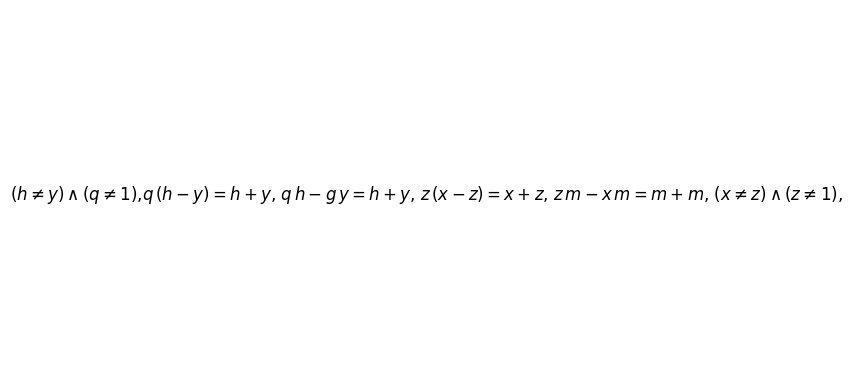

In [55]:
import matplotlib.pyplot as plt

# Example LaTeX expression
a = 8
latex_code = f"${df.iloc[a,1]}$,${df.iloc[a,2]}$, ${df.iloc[a,3]}$, ${df.iloc[a,4]}$, ${df.iloc[a,5]}$, ${df.iloc[a,6]}$,"

# Create a plot to render the LaTeX
plt.text(0.5, 0.5, latex_code, fontsize=12, ha='center', va='center')
plt.axis('off')
plt.show()

In [7]:
import re

def map_variables(expression):
    # Find unique single-letter variables in the order they appear
    variables = []
    for match in re.findall(r'\b[a-zA-Z]\b', expression):
        if match not in variables:
            variables.append(match)

    # Define the target mappings for lowercase and uppercase letters
    targets = "xyz"
    index = 0
    
    # Initialize mappings
    mapping = {}
    
    # Create mappings based on the order of appearance and case
    while index < len(targets) and variables:
        var = variables.pop(0)
        
        # Map the lowercase variable to the lowercase target
        if var.islower():
            mapping[var] = targets[index]
            # Check if the uppercase version also exists and map it to uppercase target
            if var.upper() in variables:
                mapping[var.upper()] = targets[index].upper()
                variables.remove(var.upper())
        
        # Map the uppercase variable to the uppercase target
        elif var.isupper():
            mapping[var] = targets[index].upper()
            # Check if the lowercase version also exists and map it to lowercase target
            if var.lower() in variables:
                mapping[var.lower()] = targets[index]
                variables.remove(var.lower())
        
        index += 1

    # Map the variables in the expression
    mapped_expression = ''.join(mapping.get(char, char) for char in expression)

    return mapped_expression


In [8]:
# Read CSV file into a DataFrame
df = data1

# Assuming the CSV has two columns: 'expr1' and 'expr2'
# You might need to adjust the column names based on your CSV file
for index, row in df.iterrows():
    assumption = row['assumptions']
    expr1 = row['t0']
    expr2 = row['t1']
    
    # Apply variable mapping
    processed_assumption = map_variables(assumption)
    processed_expr1 = map_variables(expr1)
    processed_expr2 = map_variables(expr2)
    


# Optionally save the processed expressions to a new CSV
df['processed_assumption'] = df['assumptions'].apply(map_variables)
df['processed_t0'] = df['t0'].apply(map_variables)
df['processed_t1'] = df['t1'].apply(map_variables)
df.to_csv('processed_expressions.csv', index=False)

In [9]:
import pandas as pd
#from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

# Load a pre-trained embedding model
#model = SentenceTransformer('all-MiniLM-L6-v2')
model = SentenceTransformer('all-MiniLM-L6-v2')

def embed_latex(expressions):
    """
    Generate embeddings for a list of LaTeX expressions.
    
    Args:
    expressions (list): List of LaTeX expression strings.
    
    Returns:
    numpy.ndarray: Array of embeddings for each expression.
    """
    return model.encode(expressions)

# Comparison functions
def compare_clusters(labels1, labels2):
    ari = adjusted_rand_score(labels1, labels2)
    nmi = normalized_mutual_info_score(labels1, labels2)
    fmi = fowlkes_mallows_score(labels1, labels2)
    return ari, nmi, fmi


def cluster_expressions_from_csv(file_path, eps=0.5, min_samples=2):
    """
    Cluster pairs of (Original, Transformation) LaTeX expressions from a CSV file.
    
    Args:
    file_path (str): Path to the CSV file containing the expressions.
    eps (float): DBSCAN epsilon parameter for cluster reach.
    min_samples (int): Minimum number of samples in a neighborhood to form a cluster.
    
    Returns:
    DataFrame: Original CSV with an additional 'Cluster' column indicating cluster label.
    """
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Check that the required columns exist
    if 'processed_t0' not in data.columns or 'processed_t1' not in data.columns:
        raise ValueError("CSV file must contain 'Original' and 'Transformation' columns.")
    
    # Create pairs of "Original: <expression> Transformation: <expression>"
    pairs = [f"Original: {orig} Transformation: {trans}" for orig, trans in zip(data['processed_t0'], data['processed_t1'])]
    
    # Generate embeddings for each expression pair
    embeddings = embed_latex(pairs)
    
    # Perform DBSCAN clustering on embeddings
    clustering_model = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
    # Apply clustering algorithms
    kmeans = KMeans(n_clusters=8, random_state=0).fit(embeddings)
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(embeddings)
    agglo = AgglomerativeClustering(n_clusters=8).fit(embeddings)
    #cluster_labels = clustering_model.fit_predict(embeddings)
    # Get cluster labels from each method
    labels_kmeans = kmeans.labels_
    labels_dbscan = dbscan.labels_
    labels_agglo = agglo.labels_
    
    # Add cluster labels to the original data
    data['labels_dbscan'] = labels_dbscan
    data['labels_kmeans'] = labels_kmeans
    data['labels_agglo'] = labels_agglo

    # Compare clusters from KMeans vs. DBSCAN
    ari_km_db, nmi_km_db, fmi_km_db = compare_clusters(labels_kmeans, labels_dbscan)
    print("KMeans vs DBSCAN")
    print(f"Adjusted Rand Index: {ari_km_db:.3f}")
    print(f"Normalized Mutual Information: {nmi_km_db:.3f}")
    print(f"Fowlkes-Mallows Index: {fmi_km_db:.3f}\n")

    # Compare clusters from KMeans vs. Agglomerative Clustering
    ari_km_ag, nmi_km_ag, fmi_km_ag = compare_clusters(labels_kmeans, labels_agglo)
    print("KMeans vs Agglomerative Clustering")
    print(f"Adjusted Rand Index: {ari_km_ag:.3f}")
    print(f"Normalized Mutual Information: {nmi_km_ag:.3f}")
    print(f"Fowlkes-Mallows Index: {fmi_km_ag:.3f}\n")

    # Compare clusters from DBSCAN vs. Agglomerative Clustering
    ari_db_ag, nmi_db_ag, fmi_db_ag = compare_clusters(labels_dbscan, labels_agglo)
    print("DBSCAN vs Agglomerative Clustering")
    print(f"Adjusted Rand Index: {ari_db_ag:.3f}")
    print(f"Normalized Mutual Information: {nmi_db_ag:.3f}")
    print(f"Fowlkes-Mallows Index: {fmi_db_ag:.3f}\n")
    
    return data

# Example usage
file_path = 'processed_expressions.csv'  # Path to your CSV file
clustered_data = cluster_expressions_from_csv(file_path)

# Display the clustered data


c:\Users\imran.chamieh\Desktop\MethError\MLenv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\imran.chamieh\Desktop\MethError\MLenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\imran.chamieh\Desktop\MethError\MLenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\imran.chamieh\AppData\Local\Programs\Python\Python311\

KMeans vs DBSCAN
Adjusted Rand Index: 0.201
Normalized Mutual Information: 0.406
Fowlkes-Mallows Index: 0.359

KMeans vs Agglomerative Clustering
Adjusted Rand Index: 0.451
Normalized Mutual Information: 0.576
Fowlkes-Mallows Index: 0.531

DBSCAN vs Agglomerative Clustering
Adjusted Rand Index: 0.164
Normalized Mutual Information: 0.394
Fowlkes-Mallows Index: 0.336



In [15]:
embed_latex("MAx muster").shape

(384,)

In [ ]:
clustered_data['labels_dbscan']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2436   -1
2437    3
2438    3
2439   -1
2440    3
Name: labels_dbscan, Length: 2441, dtype: int64

: 

In [23]:
clustered_data = clustered_data[["category","labels_dbscan", "labels_kmeans", "labels_agglo", "processed_t0", "processed_t1", "t0", "t1", "assumptions" ]]

In [ ]:
clustered_data.to_csv("clustred.csv")


: 

In [2]:
pip install --upgrade torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 6.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━

In [ ]:
l1= ["0 = r - 8*s + 2 " ,"r - 8.0*s = -2.0 " ,"r - 8.0*s + 2.0 = 0 " ,"-r = -4*s - 4*s + 2 " ,"0 = -r + 4*s + 4*s - 2 " ,"-2 = r - 8*s " ,"4*s + 4*s - 2 = r " ,"2 = -r + 8*s " ,"-r - 2 = -4*s - 4*s " ,"-4*s - 4*s + 2 = -r " ,"-8*s = -r - 2 " ,"r = 8*s - 2 " ,"0 = -r + 8.0*s - 2.0 " ,"s = r/8 + 1/4 " ,"2.0 = -r + 8.0*s " ,"2 = -r + 4*s + 4*s " ,"-r + 4*s + 4*s - 2 = 0 " ,"r - 8*s + 2 = 0 " ,"r - 4*s - 4*s = -2 " ,"0 = -r + 4*s + 4*s - 2 " ,"-r + 8.0*s - 2.0 = 0 " ,"r + 2 = 8*s " ,"-r = 2.0 - 8.0*s " ,"0.13*r + 0.25 = s " ,"8.0*s = r + 2.0 " ,"-r + 8*s - 2 = 0 " ,"8*s - 2 = r " ,"-r + 8.0*s = 2.0 " ,"0 = -r + 8*s - 2 " ,"-r + 4*s + 4*s = 2 " ,"-2 = r - 4*s - 4*s " ,"r - 4*s - 4*s + 2 = 0 " ,"0 = r - 4*s - 4*s + 2 " ,"r/8 + 1/4 = s " ,"r = 4*s + 4*s - 2 " ,"-8.0*s = -r - 2.0 " ,"r = 8.0*s - 2.0 " ,"r - 8*s = -2 " ,"-r - 2.0 = -8.0*s " ,"4*s + 4*s - 2 = r " ,"-r + 8*s = 2 " ,"-2 = r - 4*s - 4*s " ,"r + 2 = 4*s + 4*s " ,"2 - 8*s = -r " ,"0 = r - 8.0*s + 2.0 " ,"2.0 - 8.0*s = -r " ,"r = 4*s + 4*s - 2 " ,"-4*s - 4*s + 2 = -r " ,"8.0*s - 2.0 = r " ,"-4*s - 4*s = -r - 2 " ,"2 = -r + 4*s + 4*s " ,"s = 0.13*r + 0.25 " ,"r - 4*s - 4*s + 2 = 0 " ,"-r + 4*s + 4*s - 2 = 0 " ,"r + 2.0 = 8.0*s " ,"4*s + 4*s = r + 2 " ,"8*s = r + 2 " ,"0 = r - 4*s - 4*s + 2 " ,"r - 4*s - 4*s = -2 " ,"-2.0 = r - 8.0*s " ,"-r = 2 - 8*s " ,"-r = -4*s - 4*s + 2 " ,"-r - 2 = -8*s " ,"-r + 4*s + 4*s = 2"]


l2 = [
    "0 = r - 8.0*s + 2.0" ,"r - 8.0*s = -2.0 " ,"r - 8.0*s + 2.0 = 0 " ,"s = 0.13*r + 0.25 " ,"r - 4*s - 4*s + 2 = 0 " ,"r - 8*s + 2 = 0 " ,"-r + 8.0*s - 2.0 = 0 " ,"0 = r - 4*s - 4*s + 2 " ,"-r = -4*s - 4*s + 2 " ,"r + 2 = 8*s " ,"-r = 2 - 8*s " ,"0 = r - 8*s + 2 " ,"s = r/8 + 1/4 " ,"-r = 2.0 - 8.0*s " ,"-r - 2 = -8*s " ,"r - 8*s = -2 " ,"-4*s - 4*s + 2 = -r " ,"r - 4*s - 4*s = -2 " ,"-4*s - 4*s + 2 = -r " ,"0 = r - 4*s - 4*s + 2 " ,"2 = -r + 4*s + 4*s " ,"r + 2.0 = 8.0*s " ,"-r - 2 = -4*s - 4*s " ,"-r + 4*s + 4*s = 2 " ,"0 = -r + 8*s - 2 " ,"8.0*s - 2.0 = r " ,"-8*s = -r - 2 " ,"r = 8.0*s - 2.0 " ,"r - 4*s - 4*s + 2 = 0 " ,"-2.0 = r - 8.0*s " ,"2.0 - 8.0*s = -r " ,"0 = -r + 8.0*s - 2.0 " ,"-r + 4*s + 4*s = 2 " ,"r - 4*s - 4*s = -2 " ,"0 = -r + 4*s + 4*s - 2 " ,"4*s + 4*s - 2 = r " ,"4*s + 4*s = r + 2 " ,"-8.0*s = -r - 2.0 " ,"8.0*s = r + 2.0 " ,"2.0 = -r + 8.0*s " ,"0 = -r + 4*s + 4*s - 2 " ,"r + 2 = 4*s + 4*s " ,"2 - 8*s = -r " ,"2 = -r + 4*s + 4*s " ,"-r + 8.0*s = 2.0 " ,"-2 = r - 4*s - 4*s " ,"-2 = r - 8*s " ,"r = 8*s - 2 " ,"-4*s - 4*s = -r - 2 " ,"-r + 8*s = 2 " ,"8*s - 2 = r " ,"r = 4*s + 4*s - 2 " ,"-r = -4*s - 4*s + 2 " ,"-r + 8*s - 2 = 0 " ,"-2 = r - 4*s - 4*s " ,"4*s + 4*s - 2 = r " ,"r = 4*s + 4*s - 2 " ,"-r + 4*s + 4*s - 2 = 0 " ,"-r + 4*s + 4*s - 2 = 0 " ,"2 = -r + 8*s " ,"-r - 2.0 = -8.0*s " ,"8*s = r + 2"
]

for eq in l1:
    if eq not in l2:
        print(eq)


print("--------")

for eq in l2:
    if eq not in l1:
        print(eq)

0.13*r + 0.25 = s 
r/8 + 1/4 = s 
0 = r - 8.0*s + 2.0 
8*s = r + 2 
-r + 4*s + 4*s = 2
--------
0 = r - 8.0*s + 2.0
8*s = r + 2


: 

In [16]:
import sympy as sp
from difflib import SequenceMatcher
import numpy as np
import logging
from functools import lru_cache
from sympy import Eq, simplify

class SimilarityStrategy:
    """Abstract base class for similarity strategies"""
    def calculate(self, eq1: sp.Eq, eq2: sp.Eq) -> float:
        pass

class StructuralSimilarity(SimilarityStrategy):
    """Structural similarity using sequence matching"""
    @lru_cache(maxsize=1024)
    def _structural_ratio(self, a: str, b: str) -> float:
        return SequenceMatcher(None, a, b).ratio()

    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        try:
            canon1 = simplify(eq1.lhs - eq1.rhs)
            canon2 = simplify(eq2.lhs - eq2.rhs)
            canon3 = simplify(-eq2.lhs + eq2.rhs)
             # Handle cases where simplify() returns True or False
            if isinstance(canon1, bool):
                canon1 = sp.S.Zero
            if isinstance(canon2, bool):
                canon2 = sp.S.Zero
            if isinstance(canon3, bool):
                canon3 = sp.S.Zero

            base_score1 = np.mean([
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])

            base_score11 = np.mean([
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon3))
            ])

            base_score2 = np.mean([
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])

            base_score22 = np.mean([
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon3))
            ])
            
        
            print(eq1, eq2, max(base_score1, base_score2, base_score11, base_score22))
            return max(base_score1, base_score2, base_score11, base_score22)
        except Exception as e:
            logging.error(f"Structural similarity failed: {str(e)}")
            return 0

# Test cases
similarity_checker = StructuralSimilarity()

x, q, m,a , k, r = sp.symbols('x q m a k r')

eq1 = sp.Eq(x, sp.parse_expr("-1*(a-2)",evaluate=False), evaluate=False)
eq2 = sp.Eq(k, sp.parse_expr("r/4 + 1/2", evaluate=False), evaluate=False)
eq3 = sp.Eq(x, sp.parse_expr("-1*(a-2)",evaluate=False), evaluate=False) # 3*(a*x) + x=-2
eq4 = sp.Eq(x,sp.parse_expr("-3/4"))

eqs = {Eq(m, 0.66*q - 1.33), Eq(-3*m - 2*q + 2*q, 4 - 2*q), Eq(2*q - 1*4, 3*m), Eq(-3*m, 4 - 2*q), Eq(q, 3*m/2 + 2), Eq(-3*m - 4, -3*m + 3*m - 2*q), Eq(-3*m + 2*q, 4), Eq(-4, 3*m - 2*q), Eq(-3*m + 0, -3*m + 3*m - 2*q + 4), Eq(m, 2*q/3 - 4/3), Eq(m, 0.67*q - 1.33), Eq(-3*m - 4, -2*q - 4 + 4), Eq(-4 + 0, 3*m - 2*q - 4 + 4), Eq(-3*m - 4, -2*q), Eq(q, (3*m + 4)/2), Eq(-3*m - 4, -2*q), Eq(-3*m - 2*q + 2*q, 4 - 2*q), Eq(-2*q + 2*q - 4, 3*m - 2*q), Eq(2*q - 1*4, 3*m - 1*4 + 4), Eq(-3*m + 0, -3*m + 3*m - 2*q + 4), Eq(-3*m - 1*4, -2*q), Eq(2*q, 3*m + 4), Eq(-3*m + 2*q, -3*m + 3*m + 4), Eq(-1*4 + 0, 3*m - 2*q), Eq(-3*m, 4 - 2*q), Eq(-1*4 + 0, 3*m - 2*q - 1*4 + 4), Eq(0, 3*m - 2*q + 4), Eq(-4, 3*m - 2*q), Eq(2*q - 4, 3*m), Eq(-2*q + 2*q - 1*4, 3*m - 2*q), Eq(-2*q + 2*q, 3*m - 2*q + 4), Eq(-3*m + 2*q, -3*m + 3*m + 4), Eq(m, (4 - 2*q)/(-3)), Eq(q, 3*m/2 + 2), Eq(-3*m - 1*4, -2*q - 1*4 + 4), Eq(-3*m + 0, 4 - 2*q), Eq(-3*m - 4, -3*m + 3*m - 2*q), Eq(-3*m + 2*q, 4), Eq(0, 3*m - 2*q + 4), Eq(2*q, 3*m + 4), Eq(2*q - 4, 3*m - 4 + 4), Eq(m, (2*q)/3 - 4/3), Eq(-2*q + 2*q, 3*m - 2*q + 4)}
eqs2 = (Eq(r, 4*k - 2), Eq(-4*k - (-1)*2, -r), Eq(0, -(-1)*4*k - r - 2), Eq(-4*k - (-1)*4*k - (-1)*2, -(-1)*4*k - r - 1*2 - (-1)*2), Eq(-4*k - (-1)*4*k, -(-1)*4*k - r - 1*2), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 4*k), Eq(-r - 2, -4*k), Eq(r + 2, 4*k), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 4*k), Eq(-2, -4*k + r), Eq(-4*k - (-1)*4*k - (-2), -(-1)*4*k - r - 2 - (-2)), Eq(0 + 1*2, 4*k - r - 2 + 2), Eq(k, (-r - 2)/(-4)), Eq(2, 4*k - r - 2 + 2), Eq(0, -4*k + r + 2), Eq(-4*k - (-1)*4*k - (-1)*r, -(-1)*4*k - r - (-1)*r - 2), Eq(-2, -4*k + r), Eq(-4*k, -r - 2), Eq(-4*k - (-1)*r, -r - (-1)*r - 2), Eq(2, 4*k - r - 1*1*2 + 2), Eq(0, -(-1)*4*k - r - 1*2), Eq(r, (2 - 4*k)/(-1)), Eq(4*k - r - 2, 0), Eq(-4*k + r, -2), Eq(-4*k + r + 2, -2 + 2), Eq(4*k, r + 2), Eq(4*k - 2, r), Eq(-4*k - (-1)*2, -r - 2 - (-1)*2), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 4*k), Eq(-r - 2, -4*k), Eq(-4*k + r + 1*2, -2 + 2), Eq(-4*k - (-1)*4*k - (-1)*r, 4*k - 2), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 1*4*k - r - (-1)*r - 2 - (-1)*2), Eq(0, -4*k + r + 2), Eq(-4*k - (-1)*4*k - 1*(-2), 1*4*k - r - 2 - 1*(-2)), Eq(-4*k, -r - 2), Eq(-4*k - (-1)*r, -r - (-1)*r - 1*2), Eq(r, -(-1)*4*k - r - (-1)*r - 2), Eq(-4*k + 1*2, -r - 1*2 + 2), Eq(-4*k + 4*k + r, 4*k - r + r - 2), Eq(k, (-r - 1*2)/(-4)), Eq(4*k - r - 2, 0), Eq(-4*k + r, -2), Eq(0, 4*k - r - 2), Eq(2 - 4*k, -r), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 1*4*k - r - (-1)*r - 2 - (-1)*2), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 4*k), Eq(0, -4*k + r + 2), Eq(-4*k - (-1)*4*k - (-1)*r, 1*4*k - r - (-1)*r - 1*2), Eq(-4*k - (-1)*4*k - (-1)*r, -(-1)*4*k - r - (-1)*r - 1*2), Eq(r, 4*k - 1*1*2), Eq(0, 4*k - r - 1*2), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 1*4*k - r - (-1)*r - 1*2 - 1*(-2)), Eq(0, 4*k - r - 2), Eq(-4*k + 4*k + r + 2, 4*k - r + r - 2 + 2), Eq(4*k - r, 2), Eq(-4*k + r + 2, 0), Eq(-4*k + 4*k, 4*k - r - 2), Eq(k, (r + 2)/4), Eq(-r, 2 - 4*k), Eq(-4*k - (-1)*4*k - (-1)*r - (-2), 1*4*k - r - (-1)*r - 1*2 - (-2)), Eq(r, -(-1)*4*k - r - (-1)*r - 1*2), Eq(2, 4*k - r - 2 + 2), Eq(2, 4*k - r), Eq(-4*k - (-1)*4*k - 1*(-2), 4*k - r), Eq(4*k - 1*1*2, r), Eq(-4*k + r + 2, 0), Eq(-4*k - (-1)*r, -2), Eq(-4*k + r + 1*2, 0), Eq(-4*k + 4*k + 2, 4*k - r - 2 + 2), Eq(-4*k + 4*k + r + 2, 4*k - r + r - 2 + 2), Eq(r + 2, 4*k), Eq(-4*k + r + 2, 0), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 1*4*k - r - (-1)*r - 1*2 - 1*(-2)), Eq(2, -(-1)*4*k - r - 1*2 - (-1)*2), Eq(r/4 + 1/2, k), Eq(-4*k - (-1)*4*k - (-1)*r - (-2), 4*k), Eq(2, -(-1)*4*k - r - 2 - (-2)), Eq(k, r/4 + 1/2), Eq(r, 4*k - 2), Eq(-4*k - 1*(-2), -r - 1*2 - 1*(-2)), Eq(-4*k + 4*k + r, 4*k - r + r - 2), Eq(-4*k - 1*(-2), -r), Eq(4*k - r, 2), Eq(-r, 2 - 4*k), Eq(2 - 4*k, -r - 2 + 2), Eq(0, 4*k - r - 2), Eq(2 - 4*k, -r - 2 + 2), Eq(4*k - 2, r), Eq(-4*k, -r - 1*2), Eq(2, 4*k - r), Eq(-4*k + r, -r + r - 2), Eq(r + 0, 4*k - 1*2), Eq(-4*k + 4*k + 2, 4*k - r - 2 + 2), Eq(r + 0, 4*k - 2), Eq(0, 4*k - r - 2), Eq(-4*k - (-1)*4*k, -(-1)*4*k - r - 2), Eq(2 - 4*k, -r), Eq(4*k - r - 2, 0), Eq(4*k, r + 2), Eq(k, r/4 + 1/2))
eqs4 = [Eq(8*x, -7 + 1), Eq(8*x - 1*7 + 7, 1 - 1*7), Eq(8*x - 1*7 - 1 + 7, -1*7 - 1 + 1), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7 - 1 + 1), Eq(8*x + 7, 1), Eq(7, 1 - 8*x), Eq(8*x, 1 - 1*7), Eq(x, -3/4), Eq(-8*x + 8*x + 7, 1 - 8*x), Eq(x, -6/8), Eq(-8*x + 8*x - 7 + 7, -8*x - 6), Eq(8*x + 7, 1), Eq(8*x/8, (1 - 7)/8), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 7), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 1*7 - 1*1 + 1), Eq(-8*x + 8*x + 7, 1 - 8*x), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7 - 1 + 1), Eq(x, -7/8 + 1/8), Eq(-8*x + 8*x - 1 + 7, -8*x - 1 + 1), Eq(-1, -8*x - 1*7 - 1*1 + 1), Eq(6, -8*x - 1 + 1), Eq(8*x + 6, 0), Eq(-8*x + 8*x + 7, 1 - 8*x), Eq(-8*x + 8*x - 1 + 7, -8*x - 1 + 1), Eq(-8*x + 8*x - 7 + 7, -8*x - 6), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 1*7 - 1*1 + 1), Eq(-1, -8*x - 1*7 - 1*1 + 1), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 7 - 1*1 + 1), Eq(-1, -8*x - 1*7 - 1*1 + 1), Eq(8*x - 1 + 7, -1 + 1), Eq(8*x/8, -3/4), Eq(0, -8*x - 6), Eq(8*x + 6, -1 + 1), Eq(6, -8*x - 1 + 1), Eq(8*x/8, -6/8), Eq(8*x - 1, -1*7 - 1 + 1), Eq(7, 1 - 8*x), Eq(-8*x + 8*x - 7 + 7, -8*x - 7 + 1), Eq(x, -0.76), Eq(x, -0.75), Eq(8*x - 1*7 - 1 + 7, -7), Eq(8*x - 7 + 7, -6), Eq(8*x - 7 - 1 + 7, -7 - 1 + 1), Eq(8*x - 1*7 + 7, -6), Eq(8*x - 1*1 + 7, 1 - 1*1), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 7), Eq(-1, -8*x - 7 - 1*1 + 1), Eq(-8*x + 8*x - 7 + 7, -8*x - 7 + 1), Eq(8*x, -6), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 7), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7), Eq(-1, -8*x - 7), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 1*7 - 1*1 + 1), Eq(0, -8*x - 7 + 1), Eq(8*x - 1, -7 - 1 + 1), Eq(-1, -8*x - 7 - 1 + 1), Eq(0, -8*x - 1*7 + 1), Eq(-8*x + 8*x - 1 + 7, -8*x), Eq(8*x - 7 - 1 + 7, -7), Eq(-8*x + 8*x - 1*7 + 7, -8*x - 6), Eq(-8*x + 8*x - 1 + 7, -8*x), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7), Eq(8*x/8, -7/8 + 1/8), Eq(x, (1 - 7)/8), Eq(6, -8*x), Eq(-1, -8*x - 7 - 1 + 1), Eq(8*x + 6, 1 - 1*1), Eq(-8*x + 8*x - 1*7 + 7, -8*x - 1*7 + 1), Eq(0, -8*x - 7 + 1), Eq(8*x - 7 + 7, -7 + 1), Eq(8*x - 1, -7), Eq(-8*x + 8*x - 7 + 7, -8*x - 7 + 1), Eq(0, -8*x - 7 + 1), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 7), Eq(-1, -8*x - 7 - 1 + 1), Eq(-8*x + 8*x - 7 + 7, -8*x - 6), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7), Eq(8*x - 1 + 7, 0), Eq(8*x - 1*1 + 7, 0), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7 - 1 + 1)]
#score1 = similarity_checker.calculate(eq1, eq2)
#score2 = similarity_checker.calculate(eq1, eq3)
i = 1
max_score = 0
best_match = eq4
for eq in eqs4:
    score = similarity_checker.calculate(eq, eq4)
    if score > max_score:
        max_score = score
        best_match = eq

    #print(f"{i} Similarity between '{eq}' and '{eq4}': {score:.4f}")
    i += 1

print(f"Best match for '{eq4}': {best_match} with score: {max_score:.4f}")
#print(eqs2)

score1 = similarity_checker.calculate(eq4, Eq(x, -6/8))
score2 = similarity_checker.calculate(eq4, Eq(x, -3/2))
print(f"score1: {score1:.4f}")
print(f"score2: {score2:.4f}")
#print(f"Similarity between '{eq1}' and '{eq2}': {score1:.4f}")
#print(f"Similarity between '{eq1}' and '{eq3}': {score2:.4f}")


Eq(8*x, -6) Eq(x, -3/4) 0.5475427350427351
Eq(8*x, -6) Eq(x, -3/4) 0.5475427350427351
Eq(8*x - 1, -7) Eq(x, -3/4) 0.4881635177687809
Eq(-1, -8*x - 7) Eq(x, -3/4) 0.46427045177045184
Eq(8*x + 7, 1) Eq(x, -3/4) 0.46789682539682537
Eq(7, 1 - 8*x) Eq(x, -3/4) 0.44322463768115944
Eq(8*x, -6) Eq(x, -3/4) 0.5475427350427351
Eq(x, -0.75) Eq(x, -3/4) 0.6583106815664955
Eq(7, 1 - 8*x) Eq(x, -3/4) 0.44322463768115944
Eq(x, -0.75) Eq(x, -3/4) 0.6583106815664955
Eq(0, -8*x - 6) Eq(x, -3/4) 0.44170634920634927
Eq(8*x + 7, 1) Eq(x, -3/4) 0.46789682539682537
Eq(x, -0.75) Eq(x, -3/4) 0.6583106815664955
Eq(-1, -8*x - 7) Eq(x, -3/4) 0.46427045177045184
Eq(-1, -8*x - 7) Eq(x, -3/4) 0.46427045177045184
Eq(7, 1 - 8*x) Eq(x, -3/4) 0.44322463768115944
Eq(-1, -8*x - 7) Eq(x, -3/4) 0.46427045177045184
Eq(x, -0.75) Eq(x, -3/4) 0.6583106815664955
Eq(6, -8*x) Eq(x, -3/4) 0.4779700854700855
Eq(-1, -8*x - 7) Eq(x, -3/4) 0.46427045177045184
Eq(6, -8*x) Eq(x, -3/4) 0.4779700854700855
Eq(8*x + 6, 0) Eq(x, -3/4) 0.46789

In [ ]:
{Eq(-10*a - 1*(-4), -4 - 1*(-4)), Eq(-10*a - (-1)*10*a + 4, -(-1)*10*a + 0), Eq(4 - 10*a, -4 + 4), Eq(-10*a, -4), Eq(4 - 10*a, 0), Eq(-10*a - 1*(-4), 0), Eq(4, 10*a), Eq(a, 2/5), Eq(-10*a - (-1)*10*a, -(-1)*10*a - 4), Eq(a, -4/(-10)), Eq(0, -(-1)*10*a - 4), Eq(-10*a + 10*a + 4, 10*a + 0), Eq(-10*a + 10*a, 10*a - 4), Eq(4, -(-1)*10*a + 0), Eq(0 - 1*(-4), 10*a), Eq(a, 0.4), Eq(0, 10*a - 4), Eq(0 + 4, 10*a - 4 + 4), Eq(0 - 1*(-4), 10*a - 1*4 - 1*(-4))}

In [ ]:
{Eq(0 - 1*(-1), x - 1), Eq(1 - 2*x, -2*x + x - 1*1), Eq(0, x - 2), Eq(x, 2), Eq(1 - 1*1, x - 1*1 - 1*1), Eq(-x + x + 1, -x + 2*x - 1*1), Eq(-2*x - 1*1 + 1, -x - 1*1 - 1*1), Eq(x + 1, 2*x - 1), Eq(-x + x + 1, -x + 2*x - 1), Eq(1 - 2*x, -2*x + x - 1), Eq(0 - 1*(-1), x - 1*2 - 1*(-1)), Eq(-1 + 1, x - 1 - 1), Eq(-2*x - 1*(-1), -x - 1*2 - 1*(-1)), Eq(-2*x - 1*(-1), -x - 1), Eq(2 - 1*1, x - 1*1), Eq(-2*x + x + 1, -2*x + 2*x - 1), Eq(2 - 1*1, x - 1), Eq(-x + x + 1, -x + 2*x - 1), Eq(-2*x, -x - 2), Eq(x, (-x - 1*2)/(-2)), Eq(x, 2*x - 2), Eq(1 - 2*x, -x - 1), Eq(0, x - 1*1 - 1*1), Eq(1 - 2*x, -x - 1), Eq(x + 1 - 1*(-1), 2*x - 1*1 - 1*(-1)), Eq(x + 1 + 1, 2*x - 1 + 1), Eq(0, -x + 2*x - 1*2), Eq(x, -2/(-1)), Eq(-x - x, -x - 2), Eq(1, x - 1), Eq(x - 1*1 + 2, 2*x - 1*1), Eq(0 + 1, x - 2 + 1), Eq(x - 1 + 1, 2*x - 1 - 1), Eq(-2*x, -x - 1*1 - 1*1), Eq(x + 1 - 1*(-1), 2*x), Eq(-x + x + 2, -x + 2*x), Eq(-2*x + x + 1, -2*x + 2*x - 1), Eq(x, 2*x - 1*1 - 1*1), Eq(-2*x - 1 + 1, -x - 1 - 1), Eq(-2*x + 0, -2*x + x - 1*2), Eq(1 - x, -1), Eq(-x, -2), Eq(x, 2*x - 1 - 1*1), Eq(-x, -1 - 1*1), Eq(2, -x + 2*x), Eq(2, x), Eq(x + 2, 2*x), Eq(-2*x + x + 1, -2*x + 2*x - 1*1), Eq(x + 1, 2*x - 1*1), Eq(x, (-x - 1 - 1)/(-2)), Eq(1, -x + 2*x - 1*1), Eq(x, x/2 + 1), Eq(1 - 2*x, -x - 2 + 1), Eq(-2*x + 0, -2*x + x - 2), Eq(x - 1*1 + 2, 2*x - 1), Eq(-x + x, -x + 2*x - 1*2), Eq(x, (-1 - 1)/(-1)), Eq(-x - 1 + 1, -1 - 1), Eq(x - 1*1 + 1, 2*x - 1*1 - 1*1), Eq(-2*x - (-1), -x - 1*2 - (-1)), Eq(1, -x + 2*x - 1), Eq(-1 + 2, x - 1), Eq(x + 1 - (-1), 2*x - 1 - (-1)), Eq(x - 1*1 + 1, 2*x - 1 - 1*1), Eq(-2*x + x + 1, -1), Eq(-2*x - (-1), -x - 1), Eq(-x - 1*1 + 1, -1 - 1*1), Eq(-x + x, -x + 2*x - 2), Eq(x, x/2 + 1/2 + 1/2), Eq(x, 1 + 1), Eq(x + 1 - (-1), 2*x), Eq(-x - x + 1, -x - 1), Eq(-2*x + 0, -x - 2), Eq(x - 1 + 2, 2*x - 1)}

In [7]:
from sympy import symbols, Eq, simplify
import sympy 

x = symbols('x')
equation = Eq(x, sympy.parse_expr("6*x/8-4/6", evaluate=False))

# Simplify the right-hand side
simplified_equation = Eq(equation.lhs, simplify(equation.rhs))

print(equation)  # Output: Eq(x, -2/3)
print(simplified_equation)  # Output: x = -2/3


Eq(x, 6*x/8 - 4/6)
Eq(x, 3*x/4 - 2/3)


In [8]:
from sympy import symbols, Eq, simplify, factor_terms, parse_expr

x = symbols('x')
equation = Eq(x, parse_expr("6*x/8-4/6", evaluate=False))

# Simplify and factor numerical coefficients
rhs_simplified = factor_terms(simplify(equation.rhs))

simplified_equation = Eq(equation.lhs, rhs_simplified)

print(equation)   
print(simplified_equation)


Eq(x, 6*x/8 - 4/6)
Eq(x, (9*x - 8)/12)


In [3]:
from sympy import symbols, Eq, simplify, factor_terms, parse_expr, Add

x = symbols('x')
equation = Eq(x, parse_expr("6*x/8 + 4/-6", evaluate=False))

# Separate terms and apply factor_terms to each term individually
rhs_terms = [factor_terms(term) for term in Add.make_args(simplify(equation.rhs))]

# Reconstruct the right-hand side with properly formatted terms
rhs_simplified = Add(*rhs_terms, evaluate=False)

simplified_equation = Eq(simplify(equation.lhs), simplify(equation.rhs))

print(equation)   
print(simplified_equation)


Eq(x, 6*x/8 + 4/(-6))
Eq(x, 3*x/4 - 2/3)


In [4]:
import sympy as sp

expr = sp.parse_expr("6/8*x - 4/6+ 1/3", evaluate=False)
print(expr)  # Output: (9*x - 8)/12
expr = sp.parse_expr("6/8*x - 4/6", evaluate=False)
simplified_expr = sp.simplify(expr)
print(simplified_expr)  # Output: 3*x/4 - 2/3



6*x/8 - 4/6 + 1/3
3*x/4 - 2/3


In [14]:
test_set = {"1", "2", "1"}
print(test_set)

{'2', '1'}


In [6]:
def is_linear( expr: sp.Expr) -> bool:
        """Check if an expression is linear while also ensuring no fractions or square roots"""
        try:
            poly = expr.as_poly()
            if poly is None or poly.degree() != 1:
                return False
            
            # Check for fractions
            if any(term.is_Pow and term.exp.is_Number and term.exp < 0 for term in expr.atoms(sp.Pow)):
                return False
            
            # check if the equation contrin "sqrt" function
            #if any(term.has(sp.sqrt) for term in expr.atoms(sp.Function)):
             #   return False

            # Check for square roots
            if any(term.is_Pow and term.exp == sp.Rational(1, 2) for term in expr.atoms(sp.Pow)):
                return False

            return True
        except Exception as e:
            return False
        
from sympy import symbols, Eq, simplify, factor_terms, parse_expr, Add

x = symbols('x')
equation = Eq(x, parse_expr("sqrt(25) + 4/-6", evaluate=False))

print(is_linear(equation.rhs))  # Output: False
print(is_linear(equation.lhs))  # Output: True


False
True


In [23]:
import sympy as sp
from difflib import SequenceMatcher
import numpy as np
import logging
from functools import lru_cache
from sympy import Eq, simplify

class SimilarityStrategy:
    """Abstract base class for similarity strategies"""
    def calculate(self, eq1: sp.Eq, eq2: sp.Eq) -> float:
        pass

class StructuralSimilarity(SimilarityStrategy):
    """Structural similarity using sequence matching"""
    @lru_cache(maxsize=1024)
    def _structural_ratio(self, a: str, b: str) -> float:
        return SequenceMatcher(None, a, b).ratio()

    def calculate(self, eq1: Eq, eq2: Eq) -> float:
        try:
            canon1 = simplify(eq1.lhs - eq1.rhs)
            canon2 = simplify(eq2.lhs - eq2.rhs)
            canon3 = simplify(-eq2.lhs + eq2.rhs)
             # Handle cases where simplify() returns True or False
            if isinstance(canon1, bool):
                canon1 = sp.S.Zero
            if isinstance(canon2, bool):
                canon2 = sp.S.Zero
            if isinstance(canon3, bool):
                canon3 = sp.S.Zero

            base_score1 = np.mean([
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])

            base_score11 = np.mean([
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon3))
            ])

            base_score2 = np.mean([
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon2))
            ])

            base_score22 = np.mean([
                self._structural_ratio(sp.srepr(eq1.rhs), sp.srepr(eq2.lhs)),
                self._structural_ratio(sp.srepr(eq1.lhs), sp.srepr(eq2.rhs)),
                self._structural_ratio(sp.srepr(canon1), sp.srepr(canon3))
            ])
            
        
            #print(eq1, eq2, max(base_score1, base_score2, base_score11, base_score22))
            return max(base_score1, base_score2, base_score11, base_score22)
        except Exception as e:
            logging.error(f"Structural similarity failed: {str(e)}")
            return 0

# Test cases
similarity_checker = StructuralSimilarity()

x, q, m,a , k, r = sp.symbols('x q m a k r')

eq1 = sp.Eq(x, sp.parse_expr("-1*(a-2)",evaluate=False), evaluate=False)
eq2 = sp.Eq(k, sp.parse_expr("r/4 + 1/2", evaluate=False), evaluate=False)
eq3 = sp.Eq(x, sp.parse_expr("-1*(a-2)",evaluate=False), evaluate=False) # 3*(a*x) + x=-2
eq4 = sp.Eq(x,sp.parse_expr("-3/4"))

eqs = {Eq(m, 0.66*q - 1.33), Eq(-3*m - 2*q + 2*q, 4 - 2*q), Eq(2*q - 1*4, 3*m), Eq(-3*m, 4 - 2*q), Eq(q, 3*m/2 + 2), Eq(-3*m - 4, -3*m + 3*m - 2*q), Eq(-3*m + 2*q, 4), Eq(-4, 3*m - 2*q), Eq(-3*m + 0, -3*m + 3*m - 2*q + 4), Eq(m, 2*q/3 - 4/3), Eq(m, 0.67*q - 1.33), Eq(-3*m - 4, -2*q - 4 + 4), Eq(-4 + 0, 3*m - 2*q - 4 + 4), Eq(-3*m - 4, -2*q), Eq(q, (3*m + 4)/2), Eq(-3*m - 4, -2*q), Eq(-3*m - 2*q + 2*q, 4 - 2*q), Eq(-2*q + 2*q - 4, 3*m - 2*q), Eq(2*q - 1*4, 3*m - 1*4 + 4), Eq(-3*m + 0, -3*m + 3*m - 2*q + 4), Eq(-3*m - 1*4, -2*q), Eq(2*q, 3*m + 4), Eq(-3*m + 2*q, -3*m + 3*m + 4), Eq(-1*4 + 0, 3*m - 2*q), Eq(-3*m, 4 - 2*q), Eq(-1*4 + 0, 3*m - 2*q - 1*4 + 4), Eq(0, 3*m - 2*q + 4), Eq(-4, 3*m - 2*q), Eq(2*q - 4, 3*m), Eq(-2*q + 2*q - 1*4, 3*m - 2*q), Eq(-2*q + 2*q, 3*m - 2*q + 4), Eq(-3*m + 2*q, -3*m + 3*m + 4), Eq(m, (4 - 2*q)/(-3)), Eq(q, 3*m/2 + 2), Eq(-3*m - 1*4, -2*q - 1*4 + 4), Eq(-3*m + 0, 4 - 2*q), Eq(-3*m - 4, -3*m + 3*m - 2*q), Eq(-3*m + 2*q, 4), Eq(0, 3*m - 2*q + 4), Eq(2*q, 3*m + 4), Eq(2*q - 4, 3*m - 4 + 4), Eq(m, (2*q)/3 - 4/3), Eq(-2*q + 2*q, 3*m - 2*q + 4)}
eqs2 = (Eq(r, 4*k - 2), Eq(-4*k - (-1)*2, -r), Eq(0, -(-1)*4*k - r - 2), Eq(-4*k - (-1)*4*k - (-1)*2, -(-1)*4*k - r - 1*2 - (-1)*2), Eq(-4*k - (-1)*4*k, -(-1)*4*k - r - 1*2), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 4*k), Eq(-r - 2, -4*k), Eq(r + 2, 4*k), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 4*k), Eq(-2, -4*k + r), Eq(-4*k - (-1)*4*k - (-2), -(-1)*4*k - r - 2 - (-2)), Eq(0 + 1*2, 4*k - r - 2 + 2), Eq(k, (-r - 2)/(-4)), Eq(2, 4*k - r - 2 + 2), Eq(0, -4*k + r + 2), Eq(-4*k - (-1)*4*k - (-1)*r, -(-1)*4*k - r - (-1)*r - 2), Eq(-2, -4*k + r), Eq(-4*k, -r - 2), Eq(-4*k - (-1)*r, -r - (-1)*r - 2), Eq(2, 4*k - r - 1*1*2 + 2), Eq(0, -(-1)*4*k - r - 1*2), Eq(r, (2 - 4*k)/(-1)), Eq(4*k - r - 2, 0), Eq(-4*k + r, -2), Eq(-4*k + r + 2, -2 + 2), Eq(4*k, r + 2), Eq(4*k - 2, r), Eq(-4*k - (-1)*2, -r - 2 - (-1)*2), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 4*k), Eq(-r - 2, -4*k), Eq(-4*k + r + 1*2, -2 + 2), Eq(-4*k - (-1)*4*k - (-1)*r, 4*k - 2), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 1*4*k - r - (-1)*r - 2 - (-1)*2), Eq(0, -4*k + r + 2), Eq(-4*k - (-1)*4*k - 1*(-2), 1*4*k - r - 2 - 1*(-2)), Eq(-4*k, -r - 2), Eq(-4*k - (-1)*r, -r - (-1)*r - 1*2), Eq(r, -(-1)*4*k - r - (-1)*r - 2), Eq(-4*k + 1*2, -r - 1*2 + 2), Eq(-4*k + 4*k + r, 4*k - r + r - 2), Eq(k, (-r - 1*2)/(-4)), Eq(4*k - r - 2, 0), Eq(-4*k + r, -2), Eq(0, 4*k - r - 2), Eq(2 - 4*k, -r), Eq(-4*k - (-1)*4*k - (-1)*r - (-1)*2, 1*4*k - r - (-1)*r - 2 - (-1)*2), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 4*k), Eq(0, -4*k + r + 2), Eq(-4*k - (-1)*4*k - (-1)*r, 1*4*k - r - (-1)*r - 1*2), Eq(-4*k - (-1)*4*k - (-1)*r, -(-1)*4*k - r - (-1)*r - 1*2), Eq(r, 4*k - 1*1*2), Eq(0, 4*k - r - 1*2), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 1*4*k - r - (-1)*r - 1*2 - 1*(-2)), Eq(0, 4*k - r - 2), Eq(-4*k + 4*k + r + 2, 4*k - r + r - 2 + 2), Eq(4*k - r, 2), Eq(-4*k + r + 2, 0), Eq(-4*k + 4*k, 4*k - r - 2), Eq(k, (r + 2)/4), Eq(-r, 2 - 4*k), Eq(-4*k - (-1)*4*k - (-1)*r - (-2), 1*4*k - r - (-1)*r - 1*2 - (-2)), Eq(r, -(-1)*4*k - r - (-1)*r - 1*2), Eq(2, 4*k - r - 2 + 2), Eq(2, 4*k - r), Eq(-4*k - (-1)*4*k - 1*(-2), 4*k - r), Eq(4*k - 1*1*2, r), Eq(-4*k + r + 2, 0), Eq(-4*k - (-1)*r, -2), Eq(-4*k + r + 1*2, 0), Eq(-4*k + 4*k + 2, 4*k - r - 2 + 2), Eq(-4*k + 4*k + r + 2, 4*k - r + r - 2 + 2), Eq(r + 2, 4*k), Eq(-4*k + r + 2, 0), Eq(-4*k - (-1)*4*k - (-1)*r - 1*(-2), 1*4*k - r - (-1)*r - 1*2 - 1*(-2)), Eq(2, -(-1)*4*k - r - 1*2 - (-1)*2), Eq(r/4 + 1/2, k), Eq(-4*k - (-1)*4*k - (-1)*r - (-2), 4*k), Eq(2, -(-1)*4*k - r - 2 - (-2)), Eq(k, r/4 + 1/2), Eq(r, 4*k - 2), Eq(-4*k - 1*(-2), -r - 1*2 - 1*(-2)), Eq(-4*k + 4*k + r, 4*k - r + r - 2), Eq(-4*k - 1*(-2), -r), Eq(4*k - r, 2), Eq(-r, 2 - 4*k), Eq(2 - 4*k, -r - 2 + 2), Eq(0, 4*k - r - 2), Eq(2 - 4*k, -r - 2 + 2), Eq(4*k - 2, r), Eq(-4*k, -r - 1*2), Eq(2, 4*k - r), Eq(-4*k + r, -r + r - 2), Eq(r + 0, 4*k - 1*2), Eq(-4*k + 4*k + 2, 4*k - r - 2 + 2), Eq(r + 0, 4*k - 2), Eq(0, 4*k - r - 2), Eq(-4*k - (-1)*4*k, -(-1)*4*k - r - 2), Eq(2 - 4*k, -r), Eq(4*k - r - 2, 0), Eq(4*k, r + 2), Eq(k, r/4 + 1/2))
eqs4 = [Eq(8*x, -7 + 1), Eq(8*x - 1*7 + 7, 1 - 1*7), Eq(8*x - 1*7 - 1 + 7, -1*7 - 1 + 1), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7 - 1 + 1), Eq(8*x + 7, 1), Eq(7, 1 - 8*x), Eq(8*x, 1 - 1*7), Eq(x, -3/4), Eq(-8*x + 8*x + 7, 1 - 8*x), Eq(x, -6/8), Eq(-8*x + 8*x - 7 + 7, -8*x - 6), Eq(8*x + 7, 1), Eq(8*x/8, (1 - 7)/8), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 7), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 1*7 - 1*1 + 1), Eq(-8*x + 8*x + 7, 1 - 8*x), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7 - 1 + 1), Eq(x, -7/8 + 1/8), Eq(-8*x + 8*x - 1 + 7, -8*x - 1 + 1), Eq(-1, -8*x - 1*7 - 1*1 + 1), Eq(6, -8*x - 1 + 1), Eq(8*x + 6, 0), Eq(-8*x + 8*x + 7, 1 - 8*x), Eq(-8*x + 8*x - 1 + 7, -8*x - 1 + 1), Eq(-8*x + 8*x - 7 + 7, -8*x - 6), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 1*7 - 1*1 + 1), Eq(-1, -8*x - 1*7 - 1*1 + 1), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 7 - 1*1 + 1), Eq(-1, -8*x - 1*7 - 1*1 + 1), Eq(8*x - 1 + 7, -1 + 1), Eq(8*x/8, -3/4), Eq(0, -8*x - 6), Eq(8*x + 6, -1 + 1), Eq(6, -8*x - 1 + 1), Eq(8*x/8, -6/8), Eq(8*x - 1, -1*7 - 1 + 1), Eq(7, 1 - 8*x), Eq(-8*x + 8*x - 7 + 7, -8*x - 7 + 1), Eq(x, -0.76), Eq(x, -0.75), Eq(8*x - 1*7 - 1 + 7, -7), Eq(8*x - 7 + 7, -6), Eq(8*x - 7 - 1 + 7, -7 - 1 + 1), Eq(8*x - 1*7 + 7, -6), Eq(8*x - 1*1 + 7, 1 - 1*1), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 7), Eq(-1, -8*x - 7 - 1*1 + 1), Eq(-8*x + 8*x - 7 + 7, -8*x - 7 + 1), Eq(8*x, -6), Eq(-8*x + 8*x - 7 - 1*1 + 7, -8*x - 7), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7), Eq(-1, -8*x - 7), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 1*7 - 1*1 + 1), Eq(0, -8*x - 7 + 1), Eq(8*x - 1, -7 - 1 + 1), Eq(-1, -8*x - 7 - 1 + 1), Eq(0, -8*x - 1*7 + 1), Eq(-8*x + 8*x - 1 + 7, -8*x), Eq(8*x - 7 - 1 + 7, -7), Eq(-8*x + 8*x - 1*7 + 7, -8*x - 6), Eq(-8*x + 8*x - 1 + 7, -8*x), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7), Eq(8*x/8, -7/8 + 1/8), Eq(x, (1 - 7)/8), Eq(6, -8*x), Eq(-1, -8*x - 7 - 1 + 1), Eq(8*x + 6, 1 - 1*1), Eq(-8*x + 8*x - 1*7 + 7, -8*x - 1*7 + 1), Eq(0, -8*x - 7 + 1), Eq(8*x - 7 + 7, -7 + 1), Eq(8*x - 1, -7), Eq(-8*x + 8*x - 7 + 7, -8*x - 7 + 1), Eq(0, -8*x - 7 + 1), Eq(-8*x + 8*x - 1*7 - 1*1 + 7, -8*x - 7), Eq(-1, -8*x - 7 - 1 + 1), Eq(-8*x + 8*x - 7 + 7, -8*x - 6), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7), Eq(8*x - 1 + 7, 0), Eq(8*x - 1*1 + 7, 0), Eq(-8*x + 8*x - 7 - 1 + 7, -8*x - 7 - 1 + 1)]
#score1 = similarity_checker.calculate(eq1, eq2)
#score2 = similarity_checker.calculate(eq1, eq3)
i = 1
max_score = 0
best_match = eq4
for eq in eqs4:
    score = similarity_checker.calculate(eq, eq4)
    if score > max_score:
        max_score = score
        best_match = eq

    #print(f"{i} Similarity between '{eq}' and '{eq4}': {score:.4f}")
    i += 1

print(f"Best match for '{eq4}': {best_match} with score: {max_score:.4f}")
#print(eqs2)

score1 = similarity_checker.calculate(eq4, Eq(sp.parse_expr("x"), sp.parse_expr("-6/8", evaluate=False)))
score2 = similarity_checker.calculate(eq4, Eq(sp.parse_expr("x"),sp.parse_expr("-3/4", evaluate=False)))
print(f"score1: {score1:.4f}")
print(f"score2: {score2:.4f}")
#print(f"Similarity between '{eq1}' and '{eq2}': {score1:.4f}")
#print(f"Similarity between '{eq1}' and '{eq3}': {score2:.4f}")


Best match for 'Eq(x, -3/4)': Eq(x, -0.75) with score: 0.6583
score1: 0.7215
score2: 0.7306


In [ ]:
{Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5 + 6, 1 - 7*x), Eq(0, -7*x + 0 - 1*(-1)), Eq(-7*x + 7*x - 1 + 0 + 1, 1 - 7*x), Eq(-7*x + 7*x - 1 + 0 + 1, -7*x + 0 + 0 + 1), Eq(7*x - 1, 0 - 1*0), Eq(7*x - 1 + 0, 0 + 0), Eq(7*x - 1*1 - 1*0, 0), Eq(2*x + 5*x - 6 + 0 + 5, 0), Eq(2*x + 5*x - 6 - 1*5 + 5, -1*5 + 0), Eq(5*x + 5, -2*x + 0 - (-1)*6), Eq(x, (0 - (-1))/7), Eq(-7*x + 7*x - 1*1, -7*x + 0), Eq(-7*x + 7*x - 1 + 0 + 1, 1 - 7*x), Eq(-6, -5*x - 2*x - 1*5 + 0 - 0), Eq(7*x, 0 + 1), Eq(0, -5*x - 2*x - 5 + 0 - (-1)*6), Eq(0, 1 - 7*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 - 1*0 + 5 - (-1)*6, 1 - 7*x), Eq(0, -7*x + 0 + 0 + 1), Eq(7*x, 0 - 0 - 1*(-1)), Eq(5*x - 1, -2*x + 0 + 0), Eq(x, 0.14), Eq(-2*x + 2*x + 5*x - 6 - 5 + 5, -2*x - 5), Eq(-2*x + 2*x + 5*x - 6 + 5, -2*x + 0), Eq(5*x - 6, -2*x - 1*5 + 0), Eq(0, -7*x + 0 + 1), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5 - (-1)*6, 6 - 7*x), Eq(7*x/7, 0 + 1/7), Eq(0, -5*x - 2*x - 1*5 + 0 - (-1)*6), Eq(0, -5*x - 2*x - 5 + 0 - 1*0 - (-1)*6), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 - 1*0 + 5 - (-1)*6, -5*x - 2*x - 5 + 0 - 1*0 - (-1)*6), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 0 + 5, -5*x - 2*x + 0 + 0), Eq(-7*x + 7*x - 1, -7*x), Eq(-1, -5*x - 2*x + 0 + 0), Eq(-5*x + 2*x + 5*x - 6 + 5, -5*x + 0), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 + 5, -5*x - 2*x + 0), Eq(0, -5*x - 2*x - 5 + 0 + 6), Eq(7*x/7, 1/7), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*5 - 1*0 + 5 - (-1)*6, -5*x - 2*x - 5 + 0 - 1*0 - (-1)*6), Eq(-1, -5*x - 2*x + 0), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 - 1*5 - 0 + 5, -5*x - 2*x - 1*5 + 0 - 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*5 + 5, -7*x - 5), Eq(-2*x + 2*x + 5*x - 6 + 5, -2*x), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 + 5, -7*x), Eq(7*x - 1 + 1, 1), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 0 + 5, -7*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 0 + 5 + 6, -5*x - 2*x - 5 + 0 + 0 + 6), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 0 + 5, -7*x - 5), Eq(-1, -7*x), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 + 5, -7*x), Eq(7*x - 1*1 - 1*(-1), 1), Eq(0, -5*x - 2*x - 1*5 + 0 - (-1)*6), Eq(-1, -5*x - 2*x + 0), Eq(-5*x + 2*x + 5*x - 6 + 5, -5*x), Eq(5*x - 1, -2*x + 0), Eq(2*x - 1, -5*x + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5 + 6, -5*x - 2*x - 5 + 0 + 6), Eq(-2*x + 2*x + 5*x - 6 + 5, -2*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 - 1*0 + 5 - (-1)*6, -5*x - 2*x - 5 + 0 - 1*0 - (-1)*6), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*5 + 5, -5*x - 2*x - 1*5 + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5, -5*x - 2*x - 5 + 0), Eq(-6, -7*x - 5), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5, -7*x - 5), Eq(-2*x + 2*x + 5*x - 1*6 - 5 + 5, -2*x - 1*5 + 0), Eq(7*x - 1, 0), Eq(-7*x + 7*x - 1*1 - 1*0 - 1*(-1), -7*x + 0 - 1*0 - 1*(-1)), Eq(-2*x + 2*x + 5*x - 1*6 + 5 - (-1)*6, 6 - 2*x), Eq(-1, -5*x - 2*x + 0 - 1*0), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5, -7*x), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 - 1*5 + 5 - (-1)*6, 1 - 7*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 0 + 5 + 6, 1 - 7*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5, -5*x - 2*x + 0), Eq(0, -5*x - 2*x - 5 + 0 + 6), Eq(-2*x + 2*x + 5*x - 6 + 0 + 5, -2*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*5 - 1*0 + 5 - (-1)*6, 1 - 7*x), Eq(-1, -5*x - 2*x + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5 + 6, -5*x - 2*x - 5 + 0 + 6), Eq(2*x + 5*x - 6 + 5 - (-1)*6, 6), Eq(2*x + 5*x - 6 - 5 + 5, -5 + 0), Eq(0, -7*x + 0 - 1*0 - (-1)), Eq(-5*x + 2*x + 5*x - 6 + 5, -5*x + 0), Eq(7*x - 1 + 0 + 1, 0 + 0 + 1), Eq(-2*x + 2*x + 5*x - 1*6 - 5 + 5, -2*x - 5), Eq(7*x/7, 1/7), Eq(7*x - 6, -5), Eq(2*x + 5*x - 6 + 5 - (-1)*6, 0 - (-1)*6), Eq(-1, -7*x + 0), Eq(x, 0 + 1/7), Eq(-7*x + 7*x - 1 + 0 + 1, -7*x + 0 + 0 + 1), Eq(-2*x + 2*x + 5*x - 6 + 5 + 6, -2*x + 0 + 6), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 - 1*0 + 5 - (-1)*6, 1 - 7*x), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 - 1*5 - 0 + 5, -7*x - 5), Eq(0, -5*x - 2*x - 1*5 + 0 - 1*0 - (-1)*6), Eq(5*x - 1, -2*x), Eq(0, -7*x + 0 - 1*0 - 1*(-1)), Eq(0, -7*x + 0 + 0 + 1), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 0 + 5 + 6, -5*x - 2*x - 5 + 0 + 0 + 6), Eq(5*x - 1, -2*x + 0 - 0), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 - 1*5 + 5 - (-1)*6, -5*x - 2*x - 1*5 + 0 - (-1)*6), Eq(x, 1/7), Eq(-7*x + 7*x - 1*1 - 1*0 - (-1), 1 - 7*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*5 + 5, -5*x - 2*x - 5 + 0), Eq(7*x - 1 + 1, 0 + 1), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5 + 6, 1 - 7*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5, -7*x), Eq(7*x, 0 + 0 + 1), Eq(-7*x + 7*x - 1 - (-1), 1 - 7*x), Eq(2*x + 5*x - 6 - 1*5 + 5, -5), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 0 + 5, -5*x - 2*x - 5 + 0 + 0), Eq(2*x + 5*x - 6 + 5 + 6, 0 + 6), Eq(5*x + 5, -2*x + 0 + 6), Eq(-1, -5*x - 2*x + 0), Eq(7*x/7, 0 + 0 + 1/7), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 + 5, -5*x - 2*x + 0), Eq(5*x + 5, 6 - 2*x), Eq(-7*x + 7*x - 1, -7*x + 0), Eq(2*x + 5*x - 1*6 + 5, 0), Eq(2*x + 5*x - 6 - 1*0 + 5, 0 - 1*0), Eq(-6, -5*x - 2*x - 5 + 0), Eq(-6, -5*x - 2*x - 5 + 0), Eq(7*x, 0 - 1*(-1)), Eq(-1, -7*x + 0), Eq(7*x + 5, 0 + 6), Eq(2*x + 5*x - 6 + 0 + 5, 0 + 0), Eq(7*x - 1 + 0 + 1, 1), Eq(7*x - 6, -1*5 + 0), Eq(-6, -5*x - 2*x - 5 + 0 + 0), Eq(-2*x + 2*x + 5*x - 6 + 5, -2*x + 0), Eq(2*x + 5*x - 6 - 5 + 5, -5), Eq(7*x - 1, 0 + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5, -5*x - 2*x + 0), Eq(-7*x + 7*x - 1*1, -7*x), Eq(7*x - 1 + 0, 0), Eq(2*x - 1, -5*x), Eq(7*x/7, (0 - 1*0 - (-1))/7), Eq(0, -5*x - 2*x - 5 + 0 + 0 + 6), Eq(x, 1/7), Eq(-7*x + 7*x - 1*1 - 1*0 - (-1), -7*x + 0 - 1*0 - (-1)), Eq(5, -5*x - 2*x + 0 - (-1)*6), Eq(-7*x + 7*x - 1 + 1, -7*x + 0 + 1), Eq(-7*x + 7*x - 1 - (-1), -7*x + 0 - (-1)), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*5 - 1*0 + 5 - (-1)*6, -5*x - 2*x - 1*5 + 0 - 1*0 - (-1)*6), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*5 + 5, -7*x - 5), Eq(x, (0 - 1*0 - (-1))/7), Eq(5, -5*x - 2*x + 0 + 6), Eq(-2*x + 2*x + 5*x - 6 + 5 + 6, 6 - 2*x), Eq(7*x/7, (0 - (-1))/7), Eq(7*x - 1*1 - 1*0, 0 - 1*0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*0 + 5, -7*x), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5 + 6, -5*x - 2*x + 0 + 6), Eq(-2*x + 2*x + 5*x - 1*6 + 5 - (-1)*6, -2*x + 0 - (-1)*6), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 - 5 + 5 - (-1)*6, -5*x - 2*x - 5 + 0 - (-1)*6), Eq(7*x, 1), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 - 5 + 5 - (-1)*6, 1 - 7*x), Eq(-2*x + 2*x + 5*x - 6 - 5 + 5, -2*x - 5 + 0), Eq(-7*x + 7*x - 1*1 - 1*0 - (-1), -7*x + 0 - 1*0 - (-1)), Eq(-2*x + 2*x + 5*x - 1*6 - 0 + 5, -2*x), Eq(2*x - 1, -5*x + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 1*0 + 5, -5*x - 2*x + 0 - 1*0), Eq(-5*x - 2*x + 2*x + 5*x - 1*6 - 5 + 5 - (-1)*6, -5*x - 2*x - 1*5 + 0 - (-1)*6), Eq(-2*x + 2*x + 5*x - 1*6 - 0 + 5, -2*x + 0 - 0), Eq(7*x - 1*1 - 1*(-1), 0 - 1*(-1)), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 0 + 5 + 6, 1 - 7*x), Eq(-5*x + 2*x + 5*x - 6 + 5, -5*x), Eq(2*x + 5*x - 6 + 5 + 6, 6), Eq(-6, -5*x - 2*x - 1*5 + 0), Eq(7*x - 6, -5 + 0), Eq(5, 6 - 7*x), Eq(-7*x + 7*x - 1 + 1, 1 - 7*x), Eq(x, 0 + 0 + 1/7), Eq(0, -7*x + 0 + 1), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5 + 6, 6 - 7*x), Eq(-7*x + 7*x - 1*1 - 1*0 - (-1), 1 - 7*x), Eq(2*x + 5*x - 6 - 1*0 + 5, 0), Eq(5*x - 1, -2*x + 0), Eq(5*x - 6, -2*x - 5 + 0), Eq(0, -7*x + 0 - 1*0 - (-1)), Eq(-7*x + 7*x - 1 + 1, -7*x + 0 + 1), Eq(7*x - 1 - 0 - 1*(-1), 1), Eq(-7*x + 7*x - 1 + 1, 1 - 7*x), Eq(0, -5*x - 2*x - 5 + 0 - 1*0 - (-1)*6), Eq(7*x + 5, 6), Eq(5*x - 6, -2*x - 5), Eq(-7*x + 7*x - 1*1 - 1*0 - 1*(-1), 1 - 7*x), Eq(-7*x + 7*x - 1 - 1*(-1), -7*x + 0 - 1*(-1)), Eq(-6, -5*x - 2*x - 5 + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5, -5*x - 2*x - 5 + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 + 5 - (-1)*6, -5*x - 2*x + 0 - (-1)*6), Eq(0, -5*x - 2*x - 5 + 0 + 0 + 6), Eq(7*x + 5, 0 - (-1)*6), Eq(7*x - 1 - 0 - 1*(-1), 0 - 0 - 1*(-1)), Eq(-2*x + 2*x + 5*x - 6 + 0 + 5, -2*x + 0 + 0), Eq(-5*x - 2*x + 2*x + 5*x - 6 - 5 + 5, -7*x - 5), Eq(-7*x + 7*x - 1 - 1*(-1), 1 - 7*x), Eq(0, -7*x + 0 - (-1))}

In [6]:
from typing import List, Tuple
from sympy.core.expr import Expr
from sympy import Eq, symbols, simplify, parse_expr

def parse_equation(eq_str: str) -> Eq:
    lhs, rhs = map(str.strip, eq_str.split('='))
    return Eq(parse_expr(lhs, evaluate=False), parse_expr(rhs, evaluate=False), evaluate=False)

def is_sign_error(eq_ref: Eq, eq_cmp: Eq) -> Tuple[bool, str]:
    """
    Check if eq_cmp differs from eq_ref only by a sign error.
    Returns a tuple (True/False, 'variable'/'value'/'both'/None)
    """
    def get_var_side(eq: Eq) -> Tuple[Expr, Expr]:
        # Return (var_expr, value_expr) such that var_expr contains the symbol
        if eq.lhs.has('x'):
            return eq.lhs, eq.rhs
        return eq.rhs, eq.lhs

    ref_var, ref_val = get_var_side(eq_ref)
    cmp_var, cmp_val = get_var_side(eq_cmp)

    # Determine which component has the sign error
    var_diff = simplify(ref_var - cmp_var)
    var_sign_flip = simplify(ref_var + cmp_var)

    val_diff = simplify(ref_val - cmp_val)
    val_sign_flip = simplify(ref_val + cmp_val)

    if var_diff == 0 and val_sign_flip == 0:
        return True, 'variable'
    elif val_diff == 0 and var_sign_flip == 0:
        return True, 'value'

    else:
        return False, None


In [1]:
939-702

237

In [9]:
x = symbols('x')
eq1 = parse_equation("5*x  = 3")
eq2 = parse_equation("5*x = -3")
eq3 = parse_equation("-x = 2+2")
eq4 = parse_equation("-x = -1/3")

print(is_sign_error(eq1, eq2))  # (True, 'value')
print(is_sign_error(eq1, eq3))  # (True, 'variable')
print(is_sign_error(eq1, eq4))  # (True, 'both')
print(is_sign_error(eq1, eq1))  # (False, None)


(True, 'value')
(False, None)
(False, None)
(False, None)


In [2]:
import json

# Load JSON data from files
with open('0_9999_v7.json', 'r', encoding='utf-8') as file:
    f1_data = json.load(file)

with open('nonlinear_equations.json', 'r', encoding='utf-8') as file:
    f2_data = json.load(file)

with open('not_accepted_equations.json', 'r', encoding='utf-8') as file:
    f3_data = json.load(file)

# Collect all IDs from f2 and f3
exclude_ids = {entry['id'] for entry in f2_data}.union(
              {entry['id'] for entry in f3_data})

# Filter out entries from f1 that have an ID in f2 or f3
filtered_f1 = [entry for entry in f1_data if entry['id'] not in exclude_ids]

# Save the filtered data back to a new file
with open('0_9999_filtered.json', 'w', encoding='utf-8') as file:
    json.dump(filtered_f1, file, indent=2, ensure_ascii=False)

print(f"Filtered f1: {len(filtered_f1)} entries saved to 'f1_filtered.json'")

FileNotFoundError: [Errno 2] No such file or directory: 'nonlinear_equations.json'

In [10]:
import pandas as pd

# Load both CSVs
df1 = pd.read_csv("similarity.csv")  # main file
df2 = pd.read_csv("similarity_results_full_Set_23_04.csv")  # secondary file

# Find rows in df2 with ids not in df1
new_rows = df2[~df2['id'].isin(df1['id'])]
print(len(new_rows))
print(len(df2))
print(len(df1))
# Concatenate df1 with new rows from df2
merged_df = pd.concat([df1, new_rows], ignore_index=True)
print(len(merged_df))

# Save the merged DataFrame
merged_df.to_csv("merged_result2.csv", index=False)


184
1046
863
1047


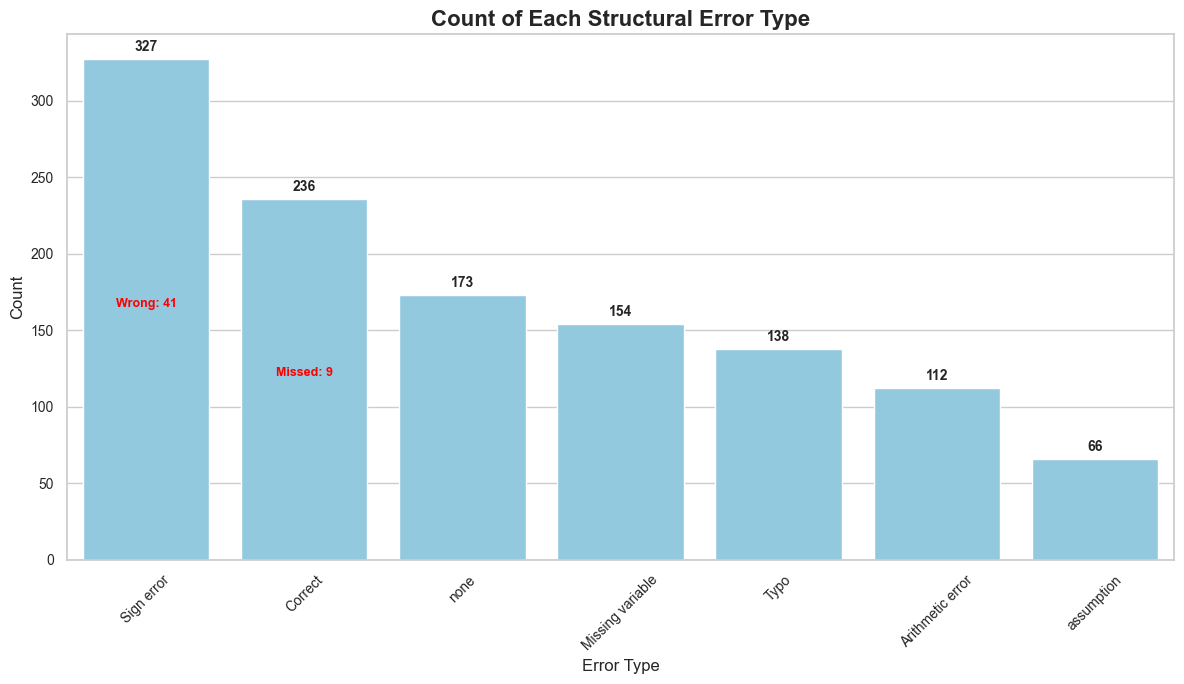

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import ast

# Load CSV
df = pd.read_csv("FullDataSet.csv")  # Replace with your actual file

# Error type categories
error_types = [
    "Correct",
    "Arithmetic error",
    "Sign error",
    "Typo",
    "Missing variable",
    "assumption",
    "none"
]

# Initialize counts
error_count = defaultdict(int)

# Initialize one-hot encoded columns
df[error_types] = 0

for idx, val in df['structural_suggested_errors'].items():
    try:
        errors = ast.literal_eval(val) if isinstance(val, str) else []
    except:
        errors = []

    if not errors:
        df.at[idx, 'none'] = 1
        error_count['none'] += 1
        continue

    matched = set()
    for err in errors:
        e = err.lower()
        if "correct" in e:
            matched.add("Correct")
        elif "arithmetic" in e:
            matched.add("Arithmetic error")
        elif "typo" in e:
            matched.add("Typo")
        elif "sign error" in e:
            matched.add("Sign error")
        elif "assumption" in e:
            matched.add("assumption")
        elif "missing variable" in e:
            matched.add("Missing variable")

    if matched:
        for m in matched:
            df.at[idx, m] = 1
            error_count[m] += 1
    else:
        df.at[idx, 'none'] = 1
        error_count['none'] += 1

# Sort error types by count descending
sorted_errors = sorted(error_count.items(), key=lambda x: x[1], reverse=True)
types = [t[0] for t in sorted_errors]
counts = [t[1] for t in sorted_errors]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.barplot(x=types, y=counts, color="skyblue")  # Brighter blue tone

plt.xlabel("Error Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Each Structural Error Type", fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with count labels
for i, count in enumerate(counts):
    plt.text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')


# Get the manual check numbers for "Sign error"
wrongly_classified = (df['Manula sing error check'] == 1).sum()
#missed_classified = (df['Manula sing error check'] == -1).sum()

missed_correct = (df['My notes'] == 'Correct').sum()



# Find index of "Sign error" bar
sign_error_idx = types.index("Sign error")

# Find index of "Correct" bar
correct_idx = types.index("Correct")

# position above the "Correct" bar
correct_height = counts[correct_idx]

# Position above the "Sign error" bar
sign_error_height = counts[sign_error_idx]

# Plot the wrongly classified (in red) and missed (in green) texts
plt.text(sign_error_idx, sign_error_height * 0.5, f"Wrong: {wrongly_classified}", 
         ha='center', va='bottom', color='red', fontsize=9, fontweight='bold')
plt.text(correct_idx, correct_height * 0.5, f"Missed: {missed_correct}", 
         ha='center', va='bottom', color='red', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Optional: Save updated DataFrame
df.to_csv("annotated_errors.csv", index=False)


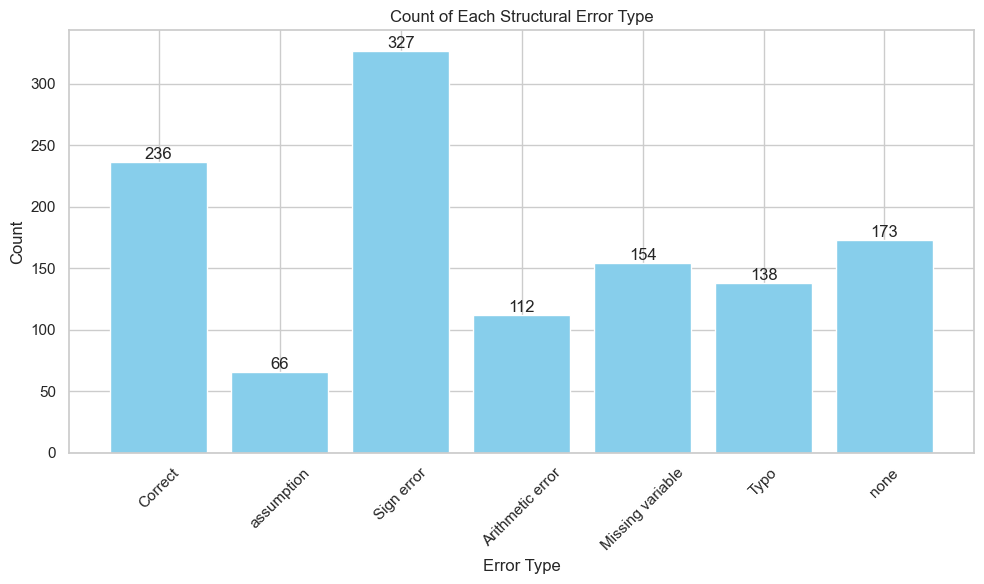

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import ast

# Load CSV
df = pd.read_csv("xxxx.csv")  # Replace with your actual file

# Error type categories
error_types = [
    "Correct",
    "Arithmetic error",
    "Typo",
    "Sign error",
    "assumption",
    "Missing variable"
]

# Initialize counts
error_count = defaultdict(int)

# Initialize one-hot encoded columns
df[error_types + ['none']] = 0

for idx, val in df['structural_suggested_errors'].items():
    try:
        errors = ast.literal_eval(val) if isinstance(val, str) else []
    except:
        errors = []

    if not errors:
        df.at[idx, 'none'] = 1
        error_count['none'] += 1
        continue

    matched = set()
    for err in errors:
        e = err.lower()
        if "correct" in e:
            matched.add("Correct")
        elif "arithmetic" in e:
            matched.add("Arithmetic error")
        elif "typo" in e:
            matched.add("Typo")
        elif "sign error" in e:
            matched.add("Sign error")
        elif "assumption" in e:
            matched.add("assumption")
        elif "missing variable" in e:
            matched.add("Missing variable")

    if matched:
        for m in matched:
            df.at[idx, m] = 1
            error_count[m] += 1
    else:
        df.at[idx, 'none'] = 1
        error_count['none'] += 1

# Prepare bar plot
types = list(error_count.keys())
counts = [error_count[t] for t in types]

plt.figure(figsize=(10, 6))
bars = plt.bar(types, counts, color='skyblue')
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.title("Count of Each Error Type")
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with count labels
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, str(count), ha='center', va='bottom')

plt.show()

# Optional: Save updated DataFrame
df.to_csv("annotated_errors.csv", index=False)


In [10]:
pip install graphviz


                                              0.0/47.1 kB ? eta -:--:--
     ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from collections import deque
from sympy import Symbol, symbols, Eq, Add, Mul, simplify
import sympy as sp
import logging
from typing import List, Tuple, Set
import json
class TransformNode:
    def __init__(self, equation, actions, terms, parent=None):
        self.equation = equation
        self.actions = actions
        self.terms = terms
        self.parent = parent
        self.children = []

    def __repr__(self):
        return f"{self.equation} | Actions: {self.actions}"

class TransformationsGenerator:
    """Generates equation transformations with transformation tracking"""
    
    def __init__(self):
        self.logger = logging.getLogger(__name__)
    
    def generate(self, equation: Eq) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Generate all possible equation transformations with transformation tracking"""
        transformations = set()
        try:


            transformations.add((equation, ("Original",), tuple()))

            terms = self._get_terms(equation)
            
            # Generate moves for each term
            for term in terms:
                moved_equations = self._move_term(equation, term, terms)
                for eq, actions, _terms in moved_equations:
                    transformations.add((eq, actions, _terms))
                #    equation = eq  #
            
            # Generate divisions for each variable
            variables = equation.free_symbols
            new_set = set()
            for eq, actions, terms in transformations:
                if len(Add.make_args(eq.lhs)) ==1:
                    for var in variables:
                        if eq.lhs.has(var):
                            coeff = eq.lhs.as_coefficients_dict().get(var, None)
                            if coeff and coeff != 1:
                                new_set.update(self._divide_factor(eq, var, actions, terms))
            
            transformations.update(new_set)



            for var in variables:
            #    transformations.update(self._divide_factor(equation, var))
                transformations.update(self._solve_for_variable(equation, var))

            # Convert to decimal representations
            new_set_decimal = set()
            for eq, actions, terms in transformations:
                new_set_decimal.update(self._convert_to_decimals(eq, actions, terms))
            for eq , actions, terms in new_set_decimal:
                # check in eq in eqsuations of the transformations tuble

                if any(eq == t[0] for t in transformations):
                    continue
            
                transformations.add((eq, actions, terms))
            
            return transformations
            
        except Exception as e:
            self.logger.error(f"Generation failed: {str(e)}")
            return set()
    
    def _get_terms(self, equation: Eq) -> List[sp.Expr]:
        """Extract terms from both sides with proper sign handling"""
        try:
            lhs_terms = Add.make_args(equation.lhs)
            rhs_terms =  Add.make_args(equation.rhs)
            return list(lhs_terms) + list(rhs_terms)
        except Exception as e:
            self.logger.error(f"Term extraction failed: {str(e)}")
            return []
    
    def _move_term(self, equation: Eq, expr: sp.Expr, terms: List[sp.Expr], 
               actions: List[str] = None, moved_terms: List[sp.Expr] = None) -> Set[Tuple[Eq, Tuple[str, ...], Tuple[sp.Expr, ...]]]:  
        """Move a term between sides with transformation tracking"""
        results = set()

        # Initialize mutable arguments if None
        actions = actions or []
        moved_terms = moved_terms or []

        # Create a new term list without 'expr'
        new_terms = [t for t in terms if t != expr]

        try:
            # Create both simplified and unsimplified forms
            str_lhs = str(equation.lhs)
            str_rhs = str(equation.rhs)
            str_expr = str(expr)

            # Append action and moved term
            new_actions = actions + [f"move term '{expr}'"]
            new_moved_terms = moved_terms + [expr]

            # Convert to tuples for hashing
            new_actions_tuple = tuple(new_actions)
            new_moved_terms_tuple = tuple(new_moved_terms)

            new_lhs = sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=False)
            new_rhs = sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=False)
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)  # Unsimplified form

            lhs_simplified = Eq(simplify(new_lhs), new_rhs)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs))

             

            simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))  # Simplified form
            sem_simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), new_rhs) if expr in Add.make_args(equation.lhs) else Eq(new_lhs, sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))
            
            lhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_lhs)] 
            rhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_rhs)]
            seme_simpl_lhs = sp.Add(*lhs_list, evaluate=False)
            seme_simpl_rhs = sp.Add(*rhs_list, evaluate=False)
            sem_simplified_2 = Eq(seme_simpl_lhs, seme_simpl_rhs, evaluate=False)
            
            
            # **Check if equation already exists in results before adding**
            equations = {unsimplified, simplified, sem_simplified, sem_simplified_2, lhs_simplified, rhs_simplified}
            results.update((eq, new_actions_tuple, new_moved_terms_tuple) for eq in equations if eq not in {r[0] for r in results})

            # Recursively call _move_term for remaining terms
            if new_terms:
                new_expr = new_terms[0]  # First term in new_terms
                results.update(self._move_term(
                    unsimplified, new_expr, new_terms, new_actions, new_moved_terms
                ))

        except Exception as e:
            self.logger.error(f"Term move failed: {str(e)}")

        return results

    def _divide_factor(self, equation: Eq, variable: Symbol, actions: List[str] = None,  moved_terms: List[sp.Expr] = None) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Divide equation by variable's coefficient with tracking"""
        results = set()
        try:
            coeff = equation.lhs.coeff(variable)
            # Ensure actions and moved_terms are initialized
            actions = actions or ()
            moved_terms = moved_terms or ()

            # Append action and moved term
            new_actions_tuple = actions + (f"divide_factor '{equation.lhs}'",)
            new_moved_terms_tuple = moved_terms + (coeff,)
                
            if coeff == 0:
                return results
                
            # Create divided forms
            new_lhs = sp.parse_expr(f"({equation.lhs}) / ({coeff})", evaluate=False)
            new_rhs = sp.parse_expr(f"({equation.rhs}) / ({coeff})", evaluate=False)
            # Unsimpified form
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)

            lhs_simplified = Eq(simplify(new_lhs), new_rhs, evaluate=False)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs), evaluate=False)

            rhs_list = [(xpr/coeff).expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(equation.rhs)] 
            seme_simpl_lhs = sp.Add(*rhs_list, evaluate=False)
            seme_simplified = Eq(new_lhs, seme_simpl_lhs)
            seme_simplified2 = Eq(simplify(new_lhs), seme_simpl_lhs)


            rhs_simplified2 = Eq(new_lhs, simplify(new_rhs), evaluate=True) 
            simplified = Eq(simplify(new_lhs), simplify(new_rhs), evaluate=True) 
            equations = {unsimplified, simplified, lhs_simplified, rhs_simplified, seme_simplified, rhs_simplified2, seme_simplified2}
            for eq in equations:
                results.add((eq, new_actions_tuple, new_moved_terms_tuple ))
            
            
        except Exception as e:
            self.logger.error(f"Division failed: {str(e)}")
        return results    
    
    def _solve_for_variable(self, equation: Eq, variable: Symbol) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Solve equation for variable with transformation tracking"""
        results = set()
        try:
            
            for sol in sp.solve(equation, variable):
                results.add((Eq(variable, sol), (f"solve for variable: {variable}",), (variable,)))
                
        except Exception as e:
            self.logger.error(f"Solving failed: {str(e)}")
        return results
    
    def _is_valid_equation(self, equation: Eq, transformed:Eq) -> bool:
        """Validate transformed equation"""
        try:
            # check if the transformed equation is  equivilant to the original equation
            if transformed.lhs == transformed.rhs:
                return False
            # check if the transformed equation is equivalent to the original equation

            # ??????

            return not equation.is_Identity and \
                   equation.lhs != equation.rhs and \
                   not any(arg.is_Boolean for arg in equation.args)
        except Exception:
            return False

    def _convert_to_decimals(self, equation: Eq, actions: List[str] = None,  terms: List[sp.Expr] = None) -> Tuple[Eq, List[str], List[sp.Expr]]:
        """Create decimal representations of equations with exactly two decimals."""
        decimal_equations = set()
        try:
                def format_term(term):
                    """Format numbers in the term but keep symbols unchanged."""
                    if term.is_Number:
                        return int(term) if term == int(term) else round(term, 2)
                    return term  # Keep symbols unchanged
                
                lhs_rounded = sp.simplify(equation.lhs.replace(lambda expr: expr.is_Number, format_term))
                rhs_rounded = sp.simplify(equation.rhs.replace(lambda expr: expr.is_Number, format_term))
                new_eq = Eq(sp.sympify(lhs_rounded), sp.sympify(rhs_rounded))

                # Append action and moved term
                new_actions = actions + (f"convert_to_decimals ",)

                # Convert to tuples for hashing
                new_actions_tuple = tuple(new_actions)
                lhs_simplified = Eq(sp.simplify(equation.lhs), equation.rhs)
                rhs_simplified = Eq(equation.lhs, sp.simplify(equation.rhs))    
                simplified = Eq(sp.simplify(lhs_rounded), sp.simplify(rhs_rounded))
                eqs = {lhs_simplified, rhs_simplified, simplified,new_eq }
                for eq in eqs:
                
                    decimal_equations.add((eq, new_actions_tuple ,terms))
                return decimal_equations
        except Exception as e:
                # If conversion fails, simply skip this equation.
                self.logger.error(f"Converting to decimal: {str(e)}")
        return  decimal_equations



def build_transformation_tree(generator, start_eq):
    root = TransformNode(start_eq, ("Original",), tuple())
    seen = set()
    seen.add(str(start_eq))

    queue = deque([root])

    while queue:
        node = queue.popleft()
        transformations = generator.generate(node.equation)

        for eq, actions, terms in transformations:
            if str(eq) not in seen:
                seen.add(str(eq))
                child = TransformNode(eq, actions, terms, parent=node)
                node.children.append(child)
                queue.append(child)

    return root

def print_tree(node, depth=0):
    print("  " * depth + f"{node.equation}  <- {node.actions[-1]}")
    for child in node.children:
        print_tree(child, depth + 1)


In [ ]:
from graphviz import Digraph
def visualize_tree(root_node, filename="transformation_tree"):
    dot = Digraph(comment="Equation Transformation Tree")
    dot.attr(rankdir='TB', size='10')
    dot.attr('node', shape='box', style='filled', fillcolor='lightblue', fontsize='10')

    def add_node(dot, node, parent_id=None, counter=[0]):
        node_id = f"node{counter[0]}"
        label = f"{str(node.equation)}\n{node.actions[-1]}"
        dot.node(node_id, label=label)
        current_id = node_id
        counter[0] += 1

        if parent_id:
            dot.edge(parent_id, current_id)

        for child in node.children:
            add_node(dot, child, current_id, counter)

    add_node(dot, root_node)
    dot.render(filename, format='png', cleanup=True)
    print(f"Graph rendered to {filename}.png")


# Usage example:
# from your_generator_module import TransformationsGenerator
# from sympy import Eq, symbols
x = symbols('x')
eq = Eq(2*x + 4, 0)
#gen = TransformationsGenerator()
#root = build_transformation_tree(gen, eq)
visualize_tree(tree_root, "my_tree")


In [ ]:
from collections import deque
from sympy import Symbol, symbols, Eq, Add, Mul, simplify
from typing import Dict, Optional
import sympy as sp
import logging
from typing import List, Tuple, Set
import json
class TransformNode:
    def __init__(self,node_id, equation, actions, terms, parent_id=None):
        self.node_id = node_id
        self.equation = equation
        self.actions = actions
        self.terms = terms
        self.parent_id = parent_id
        self.children = []

    def __repr__(self):
        return f"{self.equation} | Actions: {self.actions}"

class TransformationsGenerator:
    """Generates equation transformations with transformation tracking"""
    
    def __init__(self):
        self.logger = logging.getLogger(__name__)
    
    def generate(self, equation: Eq) -> Dict[str, Tuple[Eq, Optional[str], Tuple[str, ...], Tuple[sp.Expr, ...]]]:
        """Generate all possible equation transformations with parent ID tracking"""
        transformations = {}
        counter = 0

        def get_new_id():
            nonlocal counter
            counter += 1
            return f"T{counter}"
        
        try:
            root_id = get_new_id()
            transformations[root_id] = (equation, None, ("Original",), tuple())

            terms = self._get_terms(equation)
            
            # Generate moves for each term from the original equation
            for term in terms:
                moved_equations = self._move_term(equation, term, terms)
                for eq, actions, _terms in moved_equations:
                    new_id = get_new_id()
                    transformations[new_id] = (eq, root_id, actions, _terms)
            
            # Generate divisions for each applicable equation
            variables = equation.free_symbols
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                if len(Add.make_args(eq.lhs)) == 1:
                    for var in variables:
                        if eq.lhs.has(var):
                            coeff = eq.lhs.as_coefficients_dict().get(var, 0)
                            if coeff != 0 and coeff != 1:
                                divided_eqs = self._divide_factor(eq, var, actions, terms)
                                for divided_eq, div_actions, div_terms in divided_eqs:
                                    new_id = get_new_id()
                                    new_entries[new_id] = (divided_eq, parent_id, div_actions, div_terms)
            transformations.update(new_entries)
            
            # Generate solutions for each variable in each equation
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                variables_in_eq = eq.free_symbols
                for var in variables_in_eq:
                    solved_eqs = self._solve_for_variable(eq, var)
                    for solved_eq, solve_actions, solve_terms in solved_eqs:
                        new_id = get_new_id()
                        combined_actions = actions + solve_actions
                        new_entries[new_id] = (solved_eq, parent_id, combined_actions, solve_terms)
            transformations.update(new_entries)
            
            # Convert to decimal representations
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                decimal_eqs = self._convert_to_decimals(eq, actions, terms)
                for dec_eq, dec_actions, dec_terms in decimal_eqs:
                    # Check if the decimal equation is already present with the same parent and actions
                    if not any(existing_eq == dec_eq and ex_parent == eq_id and ex_actions == dec_actions 
                               for ex_id, (existing_eq, ex_parent, ex_actions, ex_terms) in transformations.items()):
                        new_id = get_new_id()
                        new_entries[new_id] = (dec_eq, parent_id, dec_actions, dec_terms)
            transformations.update(new_entries)
            
            return transformations
            
        except Exception as e:
            self.logger.error(f"Generation failed: {str(e)}")
            return {}
    
    def _get_terms(self, equation: Eq) -> List[sp.Expr]:
        """Extract terms from both sides with proper sign handling"""
        try:
            lhs_terms = Add.make_args(equation.lhs)
            rhs_terms =  Add.make_args(equation.rhs)
            return list(lhs_terms) + list(rhs_terms)
        except Exception as e:
            self.logger.error(f"Term extraction failed: {str(e)}")
            return []
    def _move_term(self, equation: Eq, expr: sp.Expr, terms: List[sp.Expr], 
               actions: List[str] = None, moved_terms: List[sp.Expr] = None) -> Set[Tuple[Eq, Tuple[str, ...], Tuple[sp.Expr, ...]]]:  
        """Move a term between sides with transformation tracking"""
        results = set()

        # Initialize mutable arguments if None
        actions = actions or []
        moved_terms = moved_terms or []

        # Create a new term list without 'expr'
        new_terms = [t for t in terms if t != expr]

        try:
            # Create both simplified and unsimplified forms
            str_lhs = str(equation.lhs)
            str_rhs = str(equation.rhs)
            str_expr = str(expr)

            # Append action and moved term
            new_actions = actions + [f"move term '{expr}'"]
            new_moved_terms = moved_terms + [expr]

            # Convert to tuples for hashing
            new_actions_tuple = tuple(new_actions)
            new_moved_terms_tuple = tuple(new_moved_terms)

            new_lhs = sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=False)
            new_rhs = sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=False)
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)  # Unsimplified form

            lhs_simplified = Eq(simplify(new_lhs), new_rhs)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs))

             

            simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))  # Simplified form
            sem_simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), new_rhs) if expr in Add.make_args(equation.lhs) else Eq(new_lhs, sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))
            
            lhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_lhs)] 
            rhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_rhs)]
            seme_simpl_lhs = sp.Add(*lhs_list, evaluate=False)
            seme_simpl_rhs = sp.Add(*rhs_list, evaluate=False)
            sem_simplified_2 = Eq(seme_simpl_lhs, seme_simpl_rhs, evaluate=False)
            
            
            # **Check if equation already exists in results before adding**
            equations = {unsimplified, simplified, sem_simplified, sem_simplified_2, lhs_simplified, rhs_simplified}
            results.update((eq, new_actions_tuple, new_moved_terms_tuple) for eq in equations if eq not in {r[0] for r in results})

            # Recursively call _move_term for remaining terms
            if new_terms:
                new_expr = new_terms[0]  # First term in new_terms
                results.update(self._move_term(
                    unsimplified, new_expr, new_terms, new_actions, new_moved_terms
                ))

        except Exception as e:
            self.logger.error(f"Term move failed: {str(e)}")

        return results

    def _divide_factor(self, equation: Eq, variable: Symbol, actions: List[str] = None,  moved_terms: List[sp.Expr] = None) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Divide equation by variable's coefficient with tracking"""
        results = set()
        try:
            coeff = equation.lhs.coeff(variable)
            # Ensure actions and moved_terms are initialized
            actions = actions or ()
            moved_terms = moved_terms or ()

            # Append action and moved term
            new_actions_tuple = actions + (f"divide_factor '{equation.lhs}'",)
            new_moved_terms_tuple = moved_terms + (coeff,)
                
            if coeff == 0:
                return results
                
            # Create divided forms
            new_lhs = sp.parse_expr(f"({equation.lhs}) / ({coeff})", evaluate=False)
            new_rhs = sp.parse_expr(f"({equation.rhs}) / ({coeff})", evaluate=False)
            # Unsimpified form
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)

            lhs_simplified = Eq(simplify(new_lhs), new_rhs, evaluate=False)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs), evaluate=False)

            rhs_list = [(xpr/coeff).expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(equation.rhs)] 
            seme_simpl_lhs = sp.Add(*rhs_list, evaluate=False)
            seme_simplified = Eq(new_lhs, seme_simpl_lhs)
            seme_simplified2 = Eq(simplify(new_lhs), seme_simpl_lhs)


            rhs_simplified2 = Eq(new_lhs, simplify(new_rhs), evaluate=True) 
            simplified = Eq(simplify(new_lhs), simplify(new_rhs), evaluate=True) 
            equations = {unsimplified, simplified, lhs_simplified, rhs_simplified, seme_simplified, rhs_simplified2, seme_simplified2}
            for eq in equations:
                results.add((eq, new_actions_tuple, new_moved_terms_tuple ))
            
            
        except Exception as e:
            self.logger.error(f"Division failed: {str(e)}")
        return results    
    
    def _solve_for_variable(self, equation: Eq, variable: Symbol) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Solve equation for variable with transformation tracking"""
        results = set()
        try:
            
            for sol in sp.solve(equation, variable):
                results.add((Eq(variable, sol), (f"solve for variable: {variable}",), (variable,)))
                
        except Exception as e:
            self.logger.error(f"Solving failed: {str(e)}")
        return results
    

    def _convert_to_decimals(self, equation: Eq, actions: List[str] = None,  terms: List[sp.Expr] = None) -> Tuple[Eq, List[str], List[sp.Expr]]:
        """Create decimal representations of equations with exactly two decimals."""
        decimal_equations = set()
        try:
                def format_term(term):
                    """Format numbers in the term but keep symbols unchanged."""
                    if term.is_Number:
                        return int(term) if term == int(term) else round(term, 2)
                    return term  # Keep symbols unchanged
                
                lhs_rounded = sp.simplify(equation.lhs.replace(lambda expr: expr.is_Number, format_term))
                rhs_rounded = sp.simplify(equation.rhs.replace(lambda expr: expr.is_Number, format_term))
                new_eq = Eq(sp.sympify(lhs_rounded), sp.sympify(rhs_rounded))

                # Append action and moved term
                new_actions = actions + (f"convert_to_decimals ",)

                # Convert to tuples for hashing
                new_actions_tuple = tuple(new_actions)
                lhs_simplified = Eq(sp.simplify(equation.lhs), equation.rhs)
                rhs_simplified = Eq(equation.lhs, sp.simplify(equation.rhs))    
                simplified = Eq(sp.simplify(lhs_rounded), sp.simplify(rhs_rounded))
                eqs = {lhs_simplified, rhs_simplified, simplified,new_eq }
                for eq in eqs:
                
                    decimal_equations.add((eq, new_actions_tuple ,terms))
                return decimal_equations
        except Exception as e:
                # If conversion fails, simply skip this equation.
                self.logger.error(f"Converting to decimal: {str(e)}")
        return  decimal_equations



def build_transformation_tree(generator, start_eq, max_nodes=1000):
    transformation_map = generator.generate(start_eq)
    node_map = {}

    for node_id, (eq, parent_id, actions, terms) in transformation_map.items():
        node = TransformNode(node_id, eq, actions, terms, parent_id)
        node_map[node_id] = node

    for node in node_map.values():
        if node.parent_id in node_map:
            parent_node = node_map[node.parent_id]
            parent_node.children.append(node)

    root_id = next((nid for nid, node in node_map.items() if node.parent_id is None), None)
    return node_map.get(root_id)


def print_tree(node, depth=0):
    print("  " * depth + f"{node.node_id}: {node.equation}  <- {node.actions[-1]}")
    for child in node.children:
        print_tree(child, depth + 1)


def visualize_tree(root_node, filename="transformation_tree"):
    dot = Digraph(comment="Equation Transformation Tree")
    dot.attr(rankdir='TB', size='10')
    dot.attr('node', shape='box', style='filled', fillcolor='lightblue', fontsize='10')

    def add_node(dot, node):
        label = f"{node.node_id}\n{str(node.equation)}\n{node.actions[-1]}"
        dot.node(node.node_id, label=label)

        for child in node.children:
            add_node(dot, child)
            dot.edge(node.node_id, child.node_id)

    add_node(dot, root_node)
    dot.render(filename, format='png', cleanup=True)
    print(f"Graph rendered to {filename}.png")
# Usage example:
# from your_generator_module import TransformationsGenerator



In [25]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Graphviz\bin"  # Adjust if needed

from graphviz import Digraph
import sympy as sp
from sympy import Eq, Symbol, Add, simplify
from typing import Dict, Tuple, Optional, List, Set

class TransformationTreeVisualizer:
    """Visualizes equation transformations as a search tree"""
    
    def __init__(self):
        self.node_counter = 1
        self.unique_equations = set()

    def _equation_to_str(self, equation: Eq) -> str:
        """Convert equation to simplified string representation"""
        return f"{sp.pretty(equation.lhs)} = {sp.pretty(equation.rhs)}"

    def _create_node_label(self, equation: Eq, actions: Tuple[str, ...]) -> str:
        """Create a node label with equation and actions"""
        eq_str = self._equation_to_str(equation)
        action_str = "\n".join(actions)
        return f"{eq_str}\nActions: {action_str}"

    def _add_nodes(self, graph: Digraph, transformations: Dict, parent_id: str, parent_node: str):
        """Recursively add nodes to the graph"""
        for trans_id, (eq, pid, actions, terms) in transformations.items():
            if pid == parent_id:
                eq_hash = hash(eq)
                if eq_hash in self.unique_equations:
                    continue
                self.unique_equations.add(eq_hash)
                
                node_label = self._create_node_label(eq, actions)
                graph.node(str(self.node_counter), node_label)
                current_node = str(self.node_counter)
                self.node_counter += 1
                
                if parent_node:
                    graph.edge(parent_node, current_node)
                
                self._add_nodes(graph, transformations, trans_id, current_node)

    def visualize(self, transformations: Dict, filename: str = "equation_tree"):
        """Generate and render the transformation tree"""
        graph = Digraph(filename=filename,
                      node_attr={'shape': 'box', 'style': 'rounded,filled', 'fillcolor': '#FFFFCC'},
                      graph_attr={'rankdir': 'TB', 'nodesep': '0.5'})
        
        # Add root node
        root_eq = next(v[0] for v in transformations.values() if v[1] is None)
        root_label = self._create_node_label(root_eq, ("Original",))
        graph.node('1', root_label)
        self.node_counter = 2
        self.unique_equations.add(hash(root_eq))
        
        # Add all other nodes recursively
        self._add_nodes(graph, transformations, 'T1', '1')
        
        # Render and display
        graph.render(filename=filename, format='png', cleanup=True, view=True)

# Usage example:
if __name__ == "__main__":
    from sympy.abc import x, y
    
    # Initialize equation and generator
    original_eq = Eq(x + 5, 0)
    generator = TransformationsGenerator()
    
    # Generate transformations
    transformations = generator.generate(original_eq)
    
    # Visualize the transformation tree
    visualizer = TransformationTreeVisualizer()
    visualizer.visualize(transformations, "equation_transformations")

AttributeError: module 'graphviz' has no attribute 'set_executable'

In [ ]:


dot = Digraph()
dot.node("A", "Start")
dot.node("B", "End")
dot.edge("A", "B")
dot.render("test_graph", format="png", view=True)


'test_graph.png'

In [14]:

import os
os.environ["PATH"] += os.pathsep + r"C:\Graphviz\bin"  # Adjust if needed

from graphviz import Digraph
from typing import Dict, List, Optional, Tuple, Set
from sympy import  Eq, Add,  simplify, Symbol
import sympy as sp
import logging

class TransformNode:
    def __init__(self,node_id, equation, actions, terms, parent_id=None):
        self.node_id = node_id
        self.equation = equation
        self.actions = actions
        self.terms = terms
        self.parent_id = parent_id
        self.children = []

    def __repr__(self):
        return f"{self.equation} | Actions: {self.actions}"

class TransformationsGenerator:
    """Generates equation transformations with transformation tracking"""
    
    def __init__(self):
        self.logger = logging.getLogger(__name__)
    
    def generate(self, equation: Eq) -> Dict[str, Tuple[Eq, Optional[str], Tuple[str, ...], Tuple[sp.Expr, ...]]]:
        """Generate all possible equation transformations with parent ID tracking"""
        transformations = {}
        counter = 0

        def get_new_id():
            nonlocal counter
            counter += 1
            return f"T{counter}"
        
        try:
            root_id = get_new_id()
            transformations[root_id] = (equation, None, ("Original",), tuple())

            terms = self._get_terms(equation)
            
            # Generate moves for each term from the original equation
            for term in terms:
                self._move_term(equation, term, terms, parent_id=root_id, get_new_id=get_new_id, transformations=transformations)
                
               
            
            # Generate divisions for each applicable equation
            variables = equation.free_symbols
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                if len(Add.make_args(eq.lhs)) == 1:
                    for var in variables:

                        if eq.lhs.has(var):
                            coeff = eq.lhs.as_coefficients_dict().get(var, 0)
                            if coeff != 0 and coeff != 1:
                                divided_eqs = self._divide_factor(eq, var, actions, terms)
                                for divided_eq, div_actions, div_terms in divided_eqs:
                                    new_id = get_new_id()
                                    new_entries[new_id] = (divided_eq, eq_id, div_actions, div_terms)
            transformations.update(new_entries)
            
            # Generate solutions for each variable in each equation
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                variables_in_eq = eq.free_symbols
                for var in variables_in_eq:
                    solved_eqs = self._solve_for_variable(eq, var)
                    for solved_eq, solve_actions, solve_terms in solved_eqs:
                        new_id = get_new_id()
                        combined_actions = actions + solve_actions
                        new_entries[new_id] = (solved_eq, eq_id, combined_actions, solve_terms)
            transformations.update(new_entries)
            
            # Convert to decimal representations
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                decimal_eqs = self._convert_to_decimals(eq, actions, terms)
                for dec_eq, dec_actions, dec_terms in decimal_eqs:
                    # Check if the decimal equation is already present with the same parent and actions
                    if not any(existing_eq == dec_eq and ex_parent == eq_id and ex_actions == dec_actions 
                               for ex_id, (existing_eq, ex_parent, ex_actions, ex_terms) in transformations.items()):
                        new_id = get_new_id()
                        new_entries[new_id] = (dec_eq, eq_id, dec_actions, dec_terms)
            transformations.update(new_entries)
            
            return transformations
            
        except Exception as e:
            self.logger.error(f"Generation failed: {str(e)}")
            return {}
    
    def _get_terms(self, equation: Eq) -> List[sp.Expr]:
        """Extract terms from both sides with proper sign handling"""
        try:
            lhs_terms = [term for term in sp.Add.make_args(equation.lhs) if not term.equals(0)]
            rhs_terms =  [term for term in sp.Add.make_args(equation.rhs) if not term.equals(0)]
            return list(lhs_terms) + list(rhs_terms)
        except Exception as e:
            self.logger.error(f"Term extraction failed: {str(e)}")
            return []
    def _move_term(self, equation: Eq, expr: sp.Expr, terms: List[sp.Expr], 
               actions: List[str] = None, moved_terms: List[sp.Expr] = None, 
               parent_id: Optional[str] = None,
               get_new_id=None,
               transformations=None
               ) -> Set[Tuple[Eq, Tuple[str, ...], Tuple[sp.Expr, ...]]]:  
        """Move a term between sides with transformation tracking"""

        # Initialize mutable arguments if None
        actions = actions or []
        moved_terms = moved_terms or []

        get_new_id = get_new_id or (lambda: "_UNKNOWN_ID")
        transformations = transformations or {}

        # Create a new term list without 'expr'
        new_terms = [t for t in terms if t != expr]

        try:
            # Create both simplified and unsimplified forms
            str_lhs = str(equation.lhs)
            str_rhs = str(equation.rhs)
            str_expr = str(expr)

            # Append action and moved term
            new_actions = actions + [f"move term '{expr}'"]
            new_moved_terms = moved_terms + [expr]

            # Convert to tuples for hashing
            new_actions_tuple = tuple(new_actions)
            new_moved_terms_tuple = tuple(new_moved_terms)

            new_lhs = sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=False)
            new_rhs = sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=False)
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)  # Unsimplified form

            lhs_simplified = Eq(simplify(new_lhs), new_rhs)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs))

             

            simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))  # Simplified form
            sem_simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), new_rhs) if expr in Add.make_args(equation.lhs) else Eq(new_lhs, sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))
            
            lhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_lhs)] 
            rhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_rhs)]
            seme_simpl_lhs = sp.Add(*lhs_list, evaluate=False)
            seme_simpl_rhs = sp.Add(*rhs_list, evaluate=False)
            sem_simplified_2 = Eq(seme_simpl_lhs, seme_simpl_rhs, evaluate=False)
            
            
            # **Check if equation already exists in results before adding**
            equations = {unsimplified, simplified, sem_simplified, sem_simplified_2, lhs_simplified, rhs_simplified}
           #results.update((eq, new_actions_tuple, new_moved_terms_tuple) for eq in equations if eq not in {r[0] for r in results})
            for eq in equations:
                new_id = get_new_id()
                transformations[new_id] = (eq, parent_id, new_actions_tuple, new_moved_terms_tuple)
            # Recursively call _move_term for remaining terms
            if new_terms:
                new_expr = new_terms[0]  # First term in new_terms
                self._move_term(
                    unsimplified, new_expr, new_terms, new_actions, new_moved_terms,
                    parent_id=new_id,
                    get_new_id=get_new_id,
                    transformations=transformations
                )

        except Exception as e:
            self.logger.error(f"Term move failed: {str(e)}")

        return transformations

    def _divide_factor(self, equation: Eq, variable: Symbol, actions: List[str] = None,  moved_terms: List[sp.Expr] = None) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Divide equation by variable's coefficient with tracking"""
        results = set()
        try:
            coeff = equation.lhs.coeff(variable)
            # Ensure actions and moved_terms are initialized
            actions = actions or ()
            moved_terms = moved_terms or ()

            # Append action and moved term
            new_actions_tuple = actions + (f"divide_factor '{equation.lhs}'",)
            new_moved_terms_tuple = moved_terms + (coeff,)
                
            if coeff == 0:
                return results
                
            # Create divided forms
            new_lhs = sp.parse_expr(f"({equation.lhs}) / ({coeff})", evaluate=False)
            new_rhs = sp.parse_expr(f"({equation.rhs}) / ({coeff})", evaluate=False)
            # Unsimpified form
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)

            lhs_simplified = Eq(simplify(new_lhs), new_rhs, evaluate=False)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs), evaluate=False)

            rhs_list = [(xpr/coeff).expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(equation.rhs)] 
            seme_simpl_lhs = sp.Add(*rhs_list, evaluate=False)
            seme_simplified = Eq(new_lhs, seme_simpl_lhs)
            seme_simplified2 = Eq(simplify(new_lhs), seme_simpl_lhs)


            rhs_simplified2 = Eq(new_lhs, simplify(new_rhs), evaluate=True) 
            simplified = Eq(simplify(new_lhs), simplify(new_rhs), evaluate=True) 
            equations = {unsimplified, simplified, lhs_simplified, rhs_simplified, seme_simplified, rhs_simplified2, seme_simplified2}
            for eq in equations:
                results.add((eq, new_actions_tuple, new_moved_terms_tuple ))
            
            
        except Exception as e:
            self.logger.error(f"Division failed: {str(e)}")
        return results    
    
    def _solve_for_variable(self, equation: Eq, variable: Symbol) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Solve equation for variable with transformation tracking"""
        results = set()
        try:
            
            for sol in sp.solve(equation, variable):
                results.add((Eq(variable, sol), (f"solve for variable: {variable}",), (variable,)))
                
        except Exception as e:
            self.logger.error(f"Solving failed: {str(e)}")
        return results
    

    def _convert_to_decimals(self, equation: Eq, actions: List[str] = None,  terms: List[sp.Expr] = None) -> Tuple[Eq, List[str], List[sp.Expr]]:
        """Create decimal representations of equations with exactly two decimals."""
        decimal_equations = set()
        try:
                def format_term(term):
                    """Format numbers in the term but keep symbols unchanged."""
                    if term.is_Number:
                        return int(term) if term == int(term) else round(term, 2)
                    return term  # Keep symbols unchanged
                
                lhs_rounded = sp.simplify(equation.lhs.replace(lambda expr: expr.is_Number, format_term))
                rhs_rounded = sp.simplify(equation.rhs.replace(lambda expr: expr.is_Number, format_term))
                new_eq = Eq(sp.sympify(lhs_rounded), sp.sympify(rhs_rounded))

                
                lhs_simplified = Eq(sp.simplify(equation.lhs), equation.rhs)
                rhs_simplified = Eq(equation.lhs, sp.simplify(equation.rhs))    
                simplified = Eq(sp.simplify(lhs_rounded), sp.simplify(rhs_rounded))
                eqs = [lhs_simplified, rhs_simplified, simplified,new_eq ]
                _actions =[ "Left simplified", "Right simplified", "Simplified", "Simplified"]
                # loop through the equatoins and _Actions and add them to the decimal_equations set
                for eq, action in zip(eqs, _actions):
                    # Append action and moved term
                    new_actions = actions + (f"{action}",)

                    # Convert to tuples for hashing
                    new_actions_tuple = tuple(new_actions)
                
                    decimal_equations.add((eq, new_actions_tuple ,terms))
                return decimal_equations
        except Exception as e:
                # If conversion fails, simply skip this equation.
                self.logger.error(f"Converting to decimal: {str(e)}")
        return  decimal_equations




class TransformationTreeVisualizer:
    """Visualizes equation transformations as a search tree"""
    
    def __init__(self):
        self.node_counter = 1
        self.unique_equations = set()

    def _equation_to_str(self, equation: Eq) -> str:
        """Convert equation to simplified string representation"""
        return f"{equation.lhs} = {equation.rhs}"


    def _create_node_label(self, equation: Eq, actions: Tuple[str, ...]) -> str:
        eq_str = self._equation_to_str(equation)
        action_str = "\n".join(textwrap.wrap(" / ".join(actions), width=30))  # Wrap action text
        return f"{eq_str}\nActions:\n{action_str}"


    def _add_nodes(self, graph: Digraph, transformations: Dict, parent_id: str, parent_node: str):
        """Recursively add nodes to the graph"""
        for trans_id, (eq, pid, actions, terms) in transformations.items():
            if pid == parent_id:
                eq_hash = hash(eq)
                if eq_hash in self.unique_equations:
                    continue
                self.unique_equations.add(eq_hash)
                
                node_label = self._create_node_label(eq, actions)
                graph.node(str(self.node_counter), node_label)
                current_node = str(self.node_counter)
                self.node_counter += 1
                
                if parent_node:
                    graph.edge(parent_node, current_node)
                
                self._add_nodes(graph, transformations, trans_id, current_node)

    def visualize(self, transformations: Dict, filename: str = "equation_tree"):
        """Generate and render the transformation tree"""
        graph = Digraph(filename=filename,
                      node_attr={'shape': 'box', 'style': 'rounded,filled', 'fillcolor': '#FFFFCC'},
                      graph_attr={'rankdir': 'TB', 'nodesep': '0.5'})
        
        # Add root node
        root_eq = next(v[0] for v in transformations.values() if v[1] is None)
        root_label = self._create_node_label(root_eq, ("Original",))
        graph.node('1', root_label)
        self.node_counter = 2
        self.unique_equations.add(hash(root_eq))
        
        # Add all other nodes recursively
        self._add_nodes(graph, transformations, 'T1', '1')
        
        # Render and display
        graph.render(filename=filename, format='png', cleanup=True, view=True)

# Usage example:
if __name__ == "__main__":
    from sympy.abc import x, y, a, p
    
    # Initialize equation and generator
    original_eq = Eq(2*x ,4  )
    generator = TransformationsGenerator()
    
    # Generate transformations
    transformations = generator.generate(original_eq)
    
    # Visualize the transformation tree
    visualizer = TransformationTreeVisualizer()
    visualizer.visualize(transformations, "equation_transformations")
   # visualize_tree(transformations, "transformation_tree")

In [ ]:

import os
os.environ["PATH"] += os.pathsep + r"C:\Graphviz\bin"  # Adjust if needed

from graphviz import Digraph
from typing import Dict, List, Optional, Tuple, Set
from sympy import  Eq, Add,  simplify, Symbol
import sympy as sp
import logging

class TransformNode:
    def __init__(self,node_id, equation, actions, terms, parent_id=None):
        self.node_id = node_id
        self.equation = equation
        self.actions = actions
        self.terms = terms
        self.parent_id = parent_id
        self.children = []

    def __repr__(self):
        return f"{self.equation} | Actions: {self.actions}"

class TransformationsGenerator:
    """Generates equation transformations with transformation tracking"""
    
    def __init__(self):
        self.logger = logging.getLogger(__name__)
    
    def generate(self, equation: Eq) -> Dict[str, Tuple[Eq, Optional[str], Tuple[str, ...], Tuple[sp.Expr, ...]]]:
        """Generate all possible equation transformations with parent ID tracking"""
        transformations = {}
        counter = 0

        def get_new_id():
            nonlocal counter
            counter += 1
            return f"T{counter}"
        
        try:
            root_id = get_new_id()
            transformations[root_id] = (equation, None, ("Original",), tuple())

            terms = self._get_terms(equation)
            
            # Generate moves for each term from the original equation
            for term in terms:
                self._move_term(equation, term, terms, parent_id=root_id, get_new_id=get_new_id, transformations=transformations)
                
               
            
            # Generate divisions for each applicable equation
            variables = equation.free_symbols
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                if len(Add.make_args(eq.lhs)) == 1:
                    for var in variables:

                        if eq.lhs.has(var):
                            coeff = eq.lhs.as_coefficients_dict().get(var, 0)
                            if coeff != 0 and coeff != 1:
                                divided_eqs = self._divide_factor(eq, var, actions, terms)
                                for divided_eq, div_actions, div_terms in divided_eqs:
                                    new_id = get_new_id()
                                    new_entries[new_id] = (divided_eq, eq_id, div_actions, div_terms)
            transformations.update(new_entries)
            
            # Generate solutions for each variable in each equation
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                variables_in_eq = eq.free_symbols
                for var in variables_in_eq:
                    solved_eqs = self._solve_for_variable(eq, var)
                    for solved_eq, solve_actions, solve_terms in solved_eqs:
                        new_id = get_new_id()
                        combined_actions = actions + solve_actions
                        new_entries[new_id] = (solved_eq, eq_id, combined_actions, solve_terms)
            transformations.update(new_entries)
            
            # Convert to decimal representations
            new_entries = {}
            for eq_id, (eq, parent_id, actions, terms) in list(transformations.items()):
                decimal_eqs = self._convert_to_decimals(eq, actions, terms)
                for dec_eq, dec_actions, dec_terms in decimal_eqs:
                    # Check if the decimal equation is already present with the same parent and actions
                    if not any(existing_eq == dec_eq and ex_parent == eq_id and ex_actions == dec_actions 
                               for ex_id, (existing_eq, ex_parent, ex_actions, ex_terms) in transformations.items()):
                        new_id = get_new_id()
                        new_entries[new_id] = (dec_eq, eq_id, dec_actions, dec_terms)
            transformations.update(new_entries)
            
            return transformations
            
        except Exception as e:
            self.logger.error(f"Generation failed: {str(e)}")
            return {}
    
    def _get_terms(self, equation: Eq) -> List[sp.Expr]:
        """Extract terms from both sides with proper sign handling"""
        try:
            lhs_terms = [term for term in sp.Add.make_args(equation.lhs) if not term.equals(0)]
            rhs_terms =  [term for term in sp.Add.make_args(equation.rhs) if not term.equals(0)]
            return list(lhs_terms) + list(rhs_terms)
        except Exception as e:
            self.logger.error(f"Term extraction failed: {str(e)}")
            return []
    def _move_term(self, equation: Eq, expr: sp.Expr, terms: List[sp.Expr], 
               actions: List[str] = None, moved_terms: List[sp.Expr] = None, 
               parent_id: Optional[str] = None,
               get_new_id=None,
               transformations=None
               ) -> Set[Tuple[Eq, Tuple[str, ...], Tuple[sp.Expr, ...]]]:  
        """Move a term between sides with transformation tracking"""

        # Initialize mutable arguments if None
        actions = actions or []
        moved_terms = moved_terms or []

        get_new_id = get_new_id or (lambda: "_UNKNOWN_ID")
        transformations = transformations or {}

        # Create a new term list without 'expr'
        new_terms = [t for t in terms if t != expr]

        try:
            # Create both simplified and unsimplified forms
            str_lhs = str(equation.lhs)
            str_rhs = str(equation.rhs)
            str_expr = str(expr)

            # Append action and moved term
            new_actions = actions + [f"move term '{expr}'"]
            new_moved_terms = moved_terms + [expr]

            # Convert to tuples for hashing
            new_actions_tuple = tuple(new_actions)
            new_moved_terms_tuple = tuple(new_moved_terms)

            new_lhs = sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=False)
            new_rhs = sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=False)
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)  # Unsimplified form

            lhs_simplified = Eq(simplify(new_lhs), new_rhs)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs))

             

            simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))  # Simplified form
            sem_simplified = Eq(sp.parse_expr(f"{str_lhs} - {str_expr}", evaluate=True), new_rhs) if expr in Add.make_args(equation.lhs) else Eq(new_lhs, sp.parse_expr(f"{str_rhs} - {str_expr}", evaluate=True))
            
            lhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_lhs)] 
            rhs_list = [xpr.expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(new_rhs)]
            seme_simpl_lhs = sp.Add(*lhs_list, evaluate=False)
            seme_simpl_rhs = sp.Add(*rhs_list, evaluate=False)
            sem_simplified_2 = Eq(seme_simpl_lhs, seme_simpl_rhs, evaluate=False)
            
            
            # **Check if equation already exists in results before adding**
            equations = {unsimplified, simplified, sem_simplified, sem_simplified_2, lhs_simplified, rhs_simplified}
           #results.update((eq, new_actions_tuple, new_moved_terms_tuple) for eq in equations if eq not in {r[0] for r in results})
            for eq in equations:
                new_id = get_new_id()
                transformations[new_id] = (eq, parent_id, new_actions_tuple, new_moved_terms_tuple)
            # Recursively call _move_term for remaining terms
            if new_terms:
                new_expr = new_terms[0]  # First term in new_terms
                self._move_term(
                    unsimplified, new_expr, new_terms, new_actions, new_moved_terms,
                    parent_id=new_id,
                    get_new_id=get_new_id,
                    transformations=transformations
                )

        except Exception as e:
            self.logger.error(f"Term move failed: {str(e)}")

        return transformations

    def _divide_factor(self, equation: Eq, variable: Symbol, actions: List[str] = None,  moved_terms: List[sp.Expr] = None) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Divide equation by variable's coefficient with tracking"""
        results = set()
        try:
            coeff = equation.lhs.coeff(variable)
            # Ensure actions and moved_terms are initialized
            actions = actions or ()
            moved_terms = moved_terms or ()

            # Append action and moved term
            new_actions_tuple = actions + (f"divide_factor '{equation.lhs}'",)
            new_moved_terms_tuple = moved_terms + (coeff,)
                
            if coeff == 0:
                return results
                
            # Create divided forms
            new_lhs = sp.parse_expr(f"({equation.lhs}) / ({coeff})", evaluate=False)
            new_rhs = sp.parse_expr(f"({equation.rhs}) / ({coeff})", evaluate=False)
            # Unsimpified form
            unsimplified = Eq(new_lhs, new_rhs, evaluate=False)

            lhs_simplified = Eq(simplify(new_lhs), new_rhs, evaluate=False)
            rhs_simplified = Eq(new_lhs, simplify(new_rhs), evaluate=False)

            rhs_list = [(xpr/coeff).expand(mul=True, evaluate=False) for xpr in sp.Add.make_args(equation.rhs)] 
            seme_simpl_lhs = sp.Add(*rhs_list, evaluate=False)
            seme_simplified = Eq(new_lhs, seme_simpl_lhs)
            seme_simplified2 = Eq(simplify(new_lhs), seme_simpl_lhs)


            rhs_simplified2 = Eq(new_lhs, simplify(new_rhs), evaluate=True) 
            simplified = Eq(simplify(new_lhs), simplify(new_rhs), evaluate=True) 
            equations = {unsimplified, simplified, lhs_simplified, rhs_simplified, seme_simplified, rhs_simplified2, seme_simplified2}
            for eq in equations:
                results.add((eq, new_actions_tuple, new_moved_terms_tuple ))
            
            
        except Exception as e:
            self.logger.error(f"Division failed: {str(e)}")
        return results    
    
    def _solve_for_variable(self, equation: Eq, variable: Symbol) -> Set[Tuple[Eq, List[str], List[sp.Expr]]]:
        """Solve equation for variable with transformation tracking"""
        results = set()
        try:
            
            for sol in sp.solve(equation, variable):
                results.add((Eq(variable, sol), (f"solve for variable: {variable}",), (variable,)))
                
        except Exception as e:
            self.logger.error(f"Solving failed: {str(e)}")
        return results
    

    def _convert_to_decimals(self, equation: Eq, actions: List[str] = None,  terms: List[sp.Expr] = None) -> Tuple[Eq, List[str], List[sp.Expr]]:
        """Create decimal representations of equations with exactly two decimals."""
        decimal_equations = set()
        try:
                def format_term(term):
                    """Format numbers in the term but keep symbols unchanged."""
                    if term.is_Number:
                        return int(term) if term == int(term) else round(term, 2)
                    return term  # Keep symbols unchanged
                
                lhs_rounded = sp.simplify(equation.lhs.replace(lambda expr: expr.is_Number, format_term))
                rhs_rounded = sp.simplify(equation.rhs.replace(lambda expr: expr.is_Number, format_term))
                new_eq = Eq(sp.sympify(lhs_rounded), sp.sympify(rhs_rounded))

                
                lhs_simplified = Eq(sp.simplify(equation.lhs), equation.rhs)
                rhs_simplified = Eq(equation.lhs, sp.simplify(equation.rhs))    
                simplified = Eq(sp.simplify(lhs_rounded), sp.simplify(rhs_rounded))
                eqs = [lhs_simplified, rhs_simplified, simplified,new_eq ]
                _actions =[ "Left simplified", "Right simplified", "Simplified", "Simplified"]
                # loop through the equatoins and _Actions and add them to the decimal_equations set
                for eq, action in zip(eqs, _actions):
                    # Append action and moved term
                    new_actions = actions + (f"{action}",)

                    # Convert to tuples for hashing
                    new_actions_tuple = tuple(new_actions)
                
                    decimal_equations.add((eq, new_actions_tuple ,terms))
                return decimal_equations
        except Exception as e:
                # If conversion fails, simply skip this equation.
                self.logger.error(f"Converting to decimal: {str(e)}")
        return  decimal_equations




class TransformationTreeVisualizer:
    """Visualizes equation transformations as a search tree"""
    
    def __init__(self):
        self.node_counter = 1
        self.unique_equations = set()

    def _equation_to_str(self, equation: Eq) -> str:
        """Convert equation to simplified string representation"""
        return f"{equation.lhs} = {equation.rhs}"

    def _create_node_label(self, equation: Eq, actions: Tuple[str, ...]) -> str:
        """Create a node label with equation and actions"""
        eq_str = self._equation_to_str(equation)
        action_str = "\n".join(actions)
        return f"{eq_str}\nActions: {action_str}"

    def _add_nodes(self, graph: Digraph, transformations: Dict, parent_id: str, parent_node: str):
        """Recursively add nodes to the graph"""
        for trans_id, (eq, pid, actions, terms) in transformations.items():
            if pid == parent_id:
                eq_hash = hash(eq)
                if eq_hash in self.unique_equations:
                    continue
                self.unique_equations.add(eq_hash)
                
                node_label = self._create_node_label(eq, actions)
                graph.node(str(self.node_counter), node_label)
                current_node = str(self.node_counter)
                self.node_counter += 1
                
                if parent_node:
                    graph.edge(parent_node, current_node)
                
                self._add_nodes(graph, transformations, trans_id, current_node)

    def visualize(self, transformations: Dict, filename: str = "equation_tree"):
        """Generate and render the transformation tree"""
        graph = Digraph(filename=filename,
                      node_attr={'shape': 'box', 'style': 'rounded,filled', 'fillcolor': '#FFFFCC'},
                      graph_attr={'rankdir': 'TB', 'nodesep': '0.5'})
        
        # Add root node
        root_eq = next(v[0] for v in transformations.values() if v[1] is None)
        root_label = self._create_node_label(root_eq, ("Original",))
        graph.node('1', root_label)
        self.node_counter = 2
        self.unique_equations.add(hash(root_eq))
        
        # Add all other nodes recursively
        self._add_nodes(graph, transformations, 'T1', '1')
        
        # Render and display
        graph.render(filename=filename, format='png', cleanup=True, view=True)

# Usage example:
if __name__ == "__main__":
    from sympy.abc import x, y, a, p
    
    # Initialize equation and generator
    original_eq = Eq(2*x + 2*y ,4  )
    generator = TransformationsGenerator()
    
    # Generate transformations
    transformations = generator.generate(original_eq)
    
    # Visualize the transformation tree
    visualizer = TransformationTreeVisualizer()
    visualizer.visualize(transformations, "equation_transformations")
   # visualize_tree(transformations, "transformation_tree")

: 